2018 Edition

# Challenge: What is the future selling price of a home?

A home is often the largest and most expensive purchase a person makes in his or her lifetime. Ensuring homeowners have a trusted way to monitor this asset is incredibly important.

In this competition, students are required to develop a full-fledged approach to make predictions about the future sale prices of homes. A full-fledged approach constist, at least, in the following steps:

* Descriptive statistics about the data
* Data cleaning and pre-processing
* Defining a modeling approach to the problem
* Build such a statistical model
* Validate the outcome of the model

Now, should you ask a home buyer to describe their dream house, they probably wouldn't begin with describing features such as the height of the basement ceiling or the proximity to a railroad. As you will see, the dataset we use in this competition proves that many more features influence price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in a small city in the US, this competition challenges you to predict the final price of each home.

# The dataset

## File descriptions

* train.csv - the training dataset
* test.csv - the test dataset
* data_description.txt - full description of each column

## Data fields
Here's a brief version of what you'll find in the data description file.

* SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
* MSSubClass: The building class
* MSZoning: The general zoning classification
* LotFrontage: Linear feet of street connected to property
* LotArea: Lot size in square feet
* Street: Type of road access
* Alley: Type of alley access
* LotShape: General shape of property
* LandContour: Flatness of the property
* Utilities: Type of utilities available
* LotConfig: Lot configuration
* LandSlope: Slope of property
* Neighborhood: Physical locations within Ames city limits
* Condition1: Proximity to main road or railroad
* Condition2: Proximity to main road or railroad (if a second is present)
* BldgType: Type of dwelling
* HouseStyle: Style of dwelling
* OverallQual: Overall material and finish quality
* OverallCond: Overall condition rating
* YearBuilt: Original construction date
* YearRemodAdd: Remodel date
* RoofStyle: Type of roof
* RoofMatl: Roof material
* Exterior1st: Exterior covering on house
* Exterior2nd: Exterior covering on house (if more than one material)
* MasVnrType: Masonry veneer type
* MasVnrArea: Masonry veneer area in square feet
* ExterQual: Exterior material quality
* ExterCond: Present condition of the material on the exterior
* Foundation: Type of foundation
* BsmtQual: Height of the basement
* BsmtCond: General condition of the basement
* BsmtExposure: Walkout or garden level basement walls
* BsmtFinType1: Quality of basement finished area
* BsmtFinSF1: Type 1 finished square feet
* BsmtFinType2: Quality of second finished area (if present)
* BsmtFinSF2: Type 2 finished square feet
* BsmtUnfSF: Unfinished square feet of basement area
* TotalBsmtSF: Total square feet of basement area
* Heating: Type of heating
* HeatingQC: Heating quality and condition
* CentralAir: Central air conditioning
* Electrical: Electrical system
* 1stFlrSF: First Floor square feet
* 2ndFlrSF: Second floor square feet
* LowQualFinSF: Low quality finished square feet (all floors)
* GrLivArea: Above grade (ground) living area square feet
* BsmtFullBath: Basement full bathrooms
* BsmtHalfBath: Basement half bathrooms
* FullBath: Full bathrooms above grade
* HalfBath: Half baths above grade
* Bedroom: Number of bedrooms above basement level
* Kitchen: Number of kitchens
* KitchenQual: Kitchen quality
* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
* Functional: Home functionality rating
* Fireplaces: Number of fireplaces
* FireplaceQu: Fireplace quality
* GarageType: Garage location
* GarageYrBlt: Year garage was built
* GarageFinish: Interior finish of the garage
* GarageCars: Size of garage in car capacity
* GarageArea: Size of garage in square feet
* GarageQual: Garage quality
* GarageCond: Garage condition
* PavedDrive: Paved driveway
* WoodDeckSF: Wood deck area in square feet
* OpenPorchSF: Open porch area in square feet
* EnclosedPorch: Enclosed porch area in square feet
* 3SsnPorch: Three season porch area in square feet
* ScreenPorch: Screen porch area in square feet
* PoolArea: Pool area in square feet
* PoolQC: Pool quality
* Fence: Fence quality
* MiscFeature: Miscellaneous feature not covered in other categories
* MiscVal: Value (in dollars) of miscellaneous feature
* MoSold: Month Sold
* YrSold: Year Sold
* SaleType: Type of sale
* SaleCondition: Condition of sale


# Goal of the challenge

It is your job to predict the sales price for each house. For each Id in the test set, you must predict the value of the SalePrice variable.

## Metric
Notebooks are evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)

## Submission File Format
The file should contain a header and have the following format:

```
Id,SalePrice
1461,169000.1
1462,187724.1233
1463,175221
etc.
```

You will find an example submission file within the data directory in the repository.

# Grading the notebook

This challenge is going to be graded as a regular notebook for the AML labs. As a consequence, students should submit:

* the html version of the notebook, using the Data Science Labs submission website, as usual [**Assignement: Challenge Notebook**]
* the submission file (in csv format), that we will use to rank students according to the metric defined above, again through the Data Science Labs submission website [**Assignement: Challenge Predictions**]

In summary, you will have to submit 2 files!

In [130]:
# ! pip install lightgbm

In [131]:
#! pip install xgboost

In [132]:
#! pip install missingno

In [133]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns # Seaborn visualization library
import missingno as msno # Missingno package for visualizing missing data
from IPython.display import display
from time import time
%matplotlib inline
sns.set(style='ticks')

# Statistical packages used for transformations
from scipy.stats import f_oneway, skew
from scipy.special import boxcox1p
from sklearn.decomposition import PCA

# Metrics used for measuring the accuracy and performance of the models
from sklearn.metrics import mean_squared_error, r2_score

# Algorithms used for modeling
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV, Lasso, Ridge, BayesianRidge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
import xgboost as xgb

# Pipeline and scaling preprocessing will be used for models that are sensitive
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler, RobustScaler, PolynomialFeatures
from sklearn.feature_selection import RFE, SelectKBest, f_regression, chi2

# Model selection packages used for sampling dataset and optimising parameters
from sklearn.model_selection import KFold, cross_val_predict, cross_val_score, GridSearchCV

# To ignore warning
import warnings
warnings.filterwarnings("ignore")

# Fix the random seed
RANDOM_STATE = 42
np.random.seed(seed=RANDOM_STATE)

# Define the path of the data
path_data = "challenge_data/"

# Parameters to enable/disable some steps
apply_boxcox = True
apply_featurizing = True
drop_highly_correlated = True

## Content

1. **[Data analysis and cleaning](#Data_analysis_and_cleaning)**
    - 1.1 - [Analysis and visualization of the missing data](#missing_data)
    - 1.2 - [Cleaning of the data](#cleaning_missing)
    - 1.3 - [Analysis and visualization of the data](#analysis_data)
2. **[Data pre-processing](#data_pre-processing)**
    - 2.1 - [Target variable](#target_variable)
    - 2.2 - [Data Type](#data_type)
    - 2.3 - [Feature engineering](#feature_engineering)
    - 2.4 - [Skewed features](#skewed_features)
    - 2.5 - [Correlation](#correlation)
    - 2.6 - [Feature selection](#feature_selection)
        - 2.6.1 - [Univariate feature selection](#univariate_feature_selection)
        - 2.6.2 - [Random Forest feature ranking](#RF_feature_selection)
        - 2.6.3 - [Stability Selection](#stability_feature_selection)
        - 2.6.4 - [Model Feature Ranking](#model_feature_selection)
        - 2.6.5 - [Selection](#selection)
3. **[Linear regression model](#linear_regr_model)**
    - 3.1 - [Linear Regression](#linear_regression)
    - 3.2 - [Ridge Regularization](#ridge_regularization)   
    - 3.3 - [Lasso Regularization](#lasso_regularization)   
    - 3.4 - [Elastic Net](#elastic_net)   
4. **[Kernel Ridge regression](#kernel_ridge)**
5. **[Bayesian Ridge regression](#bayesian_ridge)**
6. **[Gradient Boosting Regression](#gradient_boosting_regr)**
    - 6.1 - [Gradient Boosting Regressor](#gradient_boosting_regressor)
    - 6.2 - [XGBoost](#XGBoost)
    - 6.3 - [Light Gradient Boosting Machine (LightGBM)](#LightGBM)
7. **[Stacking models](#stacking)**
8. **[Ensembling](#ensembling)**
9. **[Submitting](#submitting)**
10. **[Conclusion](#conclusion)**   


<div class="alert alert-info" id="Data_analysis_and_cleaning">
<span class="label label-primary" style="font-size:15px;">Part 1: Data analysis and cleaning</span><br><br>

Let's analyse our data, see how they look, see the possible important factors. 
</div>

In [134]:
# Construct a dataframe from the training data csv file
train_data = pd.read_csv(path_data + "train.csv")

# Construct a dataframe from the test data csv file
test_data = pd.read_csv(path_data + "test.csv")

# Concatenate the training and test data into one dataframe. It will be useful when dealing with missing data
data = pd.concat([train_data, test_data])

<div class="alert alert-info">
Let's see how our data look like.
</div>

In [135]:
data.head()

1stFlrSF  2ndFlrSF  3SsnPorch Alley  BedroomAbvGr BldgType BsmtCond  \
0       856       854          0   NaN             3     1Fam       TA   
1      1262         0          0   NaN             3     1Fam       TA   
2       920       866          0   NaN             3     1Fam       TA   
3       961       756          0   NaN             3     1Fam       Gd   
4      1145      1053          0   NaN             4     1Fam       TA   

  BsmtExposure  BsmtFinSF1  BsmtFinSF2  ...   SaleType ScreenPorch  Street  \
0           No         706           0  ...         WD           0    Pave   
1           Gd         978           0  ...         WD           0    Pave   
2           Mn         486           0  ...         WD           0    Pave   
3           No         216           0  ...         WD           0    Pave   
4           Av         655           0  ...         WD           0    Pave   

   TotRmsAbvGrd TotalBsmtSF  Utilities WoodDeckSF YearBuilt YearRemodAdd  \
0             8         856     AllPub          0      2003         2003   
1             6        1262     AllPub        298      1976         1976   
2             6         920     AllPub          0      2001         2002   
3             7         756     AllPub          0      1915         1970   
4             9        1145     AllPub        192      2000         2000   

  YrSold  
0   2008  
1   2007  
2   2008  
3   2006  
4   2008  

[5 rows x 81 columns]

<div class="alert alert-danger">
<span class="label label-danger">COMMENT</span><br><br>
We can see that some data contains <i>NaN</i> values. It will be necessary to clean the data by replacing <i>NaN</i> values by appropriate values. We'll do that just after seeing some statistics about our data in order to have a clear analysis if in any case the features containing missing values will be involved.
</div>

<div class="alert alert-info">
Let's see first some statistics about our data.
</div>

In [136]:
data.describe().T

count           mean           std      min        25%  \
1stFlrSF       1720.0    1166.251744    394.269836    334.0     882.00   
2ndFlrSF       1720.0     348.387209    436.167218      0.0       0.00   
3SsnPorch      1720.0       3.239535     28.836839      0.0       0.00   
BedroomAbvGr   1720.0       2.872674      0.813326      0.0       2.00   
BsmtFinSF1     1720.0     442.769767    467.004101      0.0       0.00   
BsmtFinSF2     1720.0      47.448837    162.958018      0.0       0.00   
BsmtFullBath   1720.0       0.427907      0.517894      0.0       0.00   
BsmtHalfBath   1720.0       0.054651      0.232425      0.0       0.00   
BsmtUnfSF      1720.0     569.115116    442.885713      0.0     221.00   
EnclosedPorch  1720.0      21.797674     60.846442      0.0       0.00   
Fireplaces     1720.0       0.612209      0.646440      0.0       0.00   
FullBath       1720.0       1.568023      0.550023      0.0       1.00   
GarageArea     1720.0     473.242442    214.556189      0.0     334.50   
GarageCars     1720.0       1.769767      0.749957      0.0       1.00   
GarageYrBlt    1625.0    1978.601846     24.603073   1900.0    1962.00   
GrLivArea      1720.0    1519.988953    531.010079    334.0    1131.75   
HalfBath       1720.0       0.383140      0.505071      0.0       0.00   
Id             1720.0     821.197674    444.905460      1.0     430.75   
KitchenAbvGr   1720.0       1.047674      0.221175      0.0       1.00   
LotArea        1720.0   10487.118605   9510.946199   1300.0    7538.75   
LotFrontage    1412.0      70.024079     24.684963     21.0      59.00   
LowQualFinSF   1720.0       5.350000     46.053661      0.0       0.00   
MSSubClass     1720.0      56.773256     42.032022     20.0      20.00   
MasVnrArea     1710.0     103.491813    179.322454      0.0       0.00   
MiscVal        1720.0      45.606977    505.514455      0.0       0.00   
MoSold         1720.0       6.329070      2.724690      1.0       5.00   
OpenPorchSF    1720.0      47.109302     66.652806      0.0       0.00   
OverallCond    1720.0       5.580233      1.107625      1.0       5.00   
OverallQual    1720.0       6.095349      1.382674      1.0       5.00   
PoolArea       1720.0       3.351744     44.416822      0.0       0.00   
SalePrice      1460.0  180921.195890  79442.502883  34900.0  129975.00   
ScreenPorch    1720.0      15.116860     56.437157      0.0       0.00   
TotRmsAbvGrd   1720.0       6.534302      1.632633      2.0       5.00   
TotalBsmtSF    1720.0    1059.333721    451.286130      0.0     794.75   
WoodDeckSF     1720.0      93.622093    126.237079      0.0       0.00   
YearBuilt      1720.0    1971.209884     30.310064   1872.0    1954.00   
YearRemodAdd   1720.0    1984.780814     20.727018   1950.0    1966.00   
YrSold         1720.0    2007.819186      1.334373   2006.0    2007.00   

                    50%        75%       max  
1stFlrSF         1087.0    1392.00    4692.0  
2ndFlrSF            0.0     729.00    2065.0  
3SsnPorch           0.0       0.00     508.0  
BedroomAbvGr        3.0       3.00       8.0  
BsmtFinSF1        379.5     712.25    5644.0  
BsmtFinSF2          0.0       0.00    1474.0  
BsmtFullBath        0.0       1.00       3.0  
BsmtHalfBath        0.0       0.00       2.0  
BsmtUnfSF         482.0     811.00    2336.0  
EnclosedPorch       0.0       0.00     552.0  
Fireplaces          1.0       1.00       3.0  
FullBath            2.0       2.00       3.0  
GarageArea        480.0     576.00    1418.0  
GarageCars          2.0       2.00       4.0  
GarageYrBlt      1980.0    2002.00    2010.0  
GrLivArea        1470.5    1788.50    5642.0  
HalfBath            0.0       1.00       2.0  
Id                860.5    1245.25    1460.0  
KitchenAbvGr        1.0       1.00       3.0  
LotArea          9501.5   11600.00  215245.0  
LotFrontage        69.0      80.00     313.0  
LowQualFinSF        0.0       0.00     572.0  
MSSubClass         50.0      70.00     190.0  
M

<div class="alert alert-success">
<span class="label label-success">COMMENT</span><br><br>

Let's see some facts about our data:

<ul>

<li>The houses were built between $1872$ and $2010$.</li>

<li>Some houses were remodelled between $1950$ and $2010$.</li>

<li>The houses were sold between $2006$ and $2010$.</li>

<li>The rates of the overall material and finish of the house varies between $1$ and $10$ (we know that, but this means that we have houses with a poor overall material quality). The mean is $\simeq 6$ with a standard deviation between $1$ and $2$. Further, More than $25 \%$ of the houses has an overall quality of $5$ which is the average.</li>

<li>The sale price of the houses is between $34900 \ \$ $ and $755000 \ \$ $ with mean of $180921.20 \ \$ $. More than $25 \%$ of the houses has $129900 \ \$ $.</li>

<li>By looking at the <i>KitchenAbvGr</i>, there are houses with no kitchens and the maximum number of kitchens the houses have in our data is $3$.</li>

</ul>

We can say more about our factors. However, visualizing them later will be better. Before visualization, we need a clean data so we won't have a problem with the missing values. We concatenated the training data and the test data to see all our missing data, so we can build a function cleaning data for the both data.
</div>

<div class="alert alert-info">
Let's drop the ID column because it's useless. We're going to drop the sale price but only from <i>data</i> dataframe because it won't be involved when dealing with missing values.
</div>

In [137]:
# Drop the ID column
train_data.drop(['Id'], axis=1, inplace=True)
test_data.drop(['Id'], axis=1, inplace=True)
data.drop(['Id'], axis=1, inplace=True)

# Drop the sale price column
data.drop(['SalePrice'], axis=1, inplace=True)

<div class="alert alert-info" id="missing_data">
<span class="label label-info" style="font-size:12px;">ANALYSIS AND VISUALIZATION OF THE MISSING DATA</span><br><br>

Before cleaning our data, let's see the missing values and their percentage:
</div>

In [138]:
def show_missing(df, n=20):
    total_missing_data = df.isnull().sum().sort_values(ascending=False)
    percentage = total_missing_data * 100 / len(df)
    missing_pd = pd.concat([total_missing_data, percentage], axis = 1, keys = ['Total', 'Percentage'])
    return missing_pd.head(n)

In [139]:
show_missing(data)

Total  Percentage
PoolQC         1710   99.418605
MiscFeature    1659   96.453488
Alley          1613   93.779070
Fence          1385   80.523256
FireplaceQu     816   47.441860
LotFrontage     308   17.906977
GarageFinish     95    5.523256
GarageCond       95    5.523256
GarageQual       95    5.523256
GarageYrBlt      95    5.523256
GarageType       95    5.523256
BsmtExposure     43    2.500000
BsmtFinType2     43    2.500000
BsmtCond         42    2.441860
BsmtFinType1     42    2.441860
BsmtQual         42    2.441860
MasVnrArea       10    0.581395
MasVnrType       10    0.581395
Electrical        2    0.116279
Condition1        0    0.000000

<div class="alert alert-success">

Some features have <i>NaN</i> value on almost all the data (for instance, <i>PoolQC</i> $99.52 \ \%$, <i>MiscFeature</i> $96.30 \ \%$, <i>Alley</i> $93.77 \ \%$...).
</div>

<div class="alert alert-info">

We can have a better visualization of our analysis about the missing data using <i>missingno</i> toolset. Let's see with the <b>nullity matrix</b> that gives a data-dense display that allows a quick visualization of the missing data patterns in the dataset.

</div>

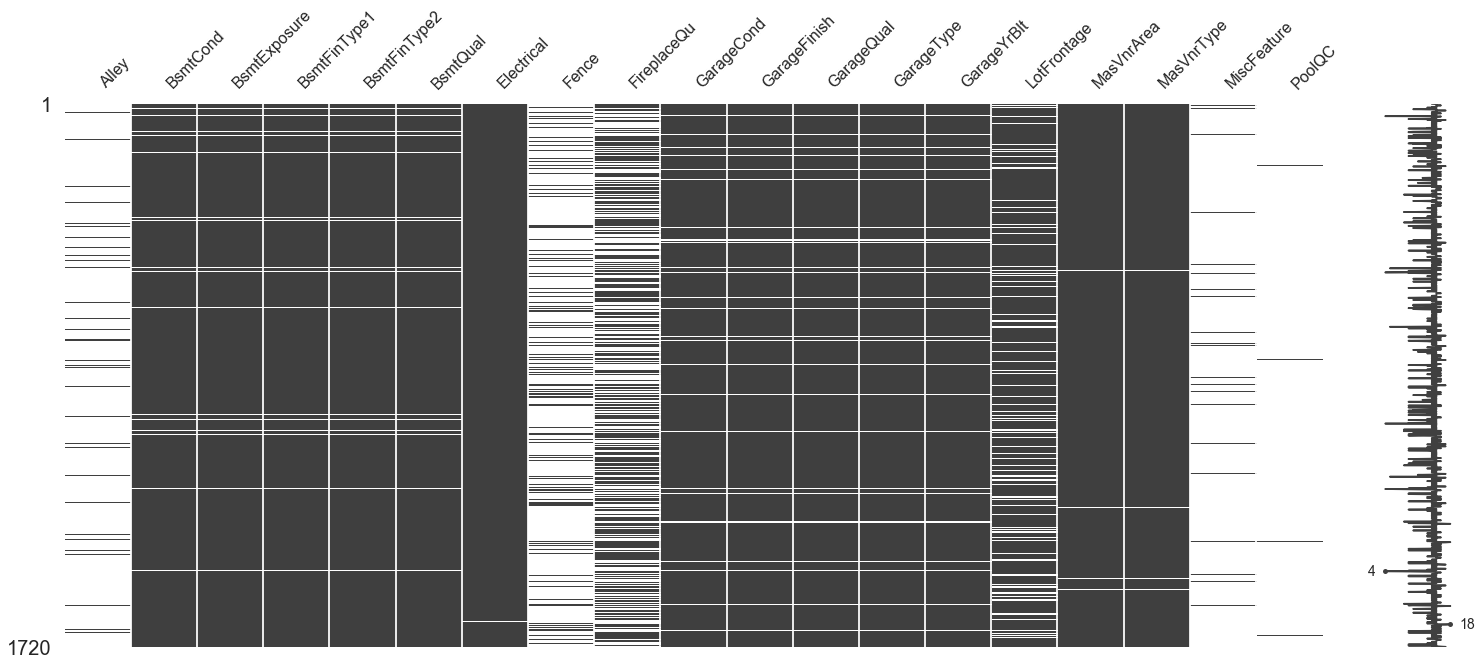

In [140]:
# Get the features having missing values
missingdata = data.columns[data.isnull().any()].tolist()

# Keep the data frame with only those features
only_missing = data[missingdata]

# Plot the nullity matrix
msno.matrix(only_missing);

<div class="alert alert-success">
<span class="label label-success">COMMENT</span><br><br>

The nullity matrix matches our table above indicating the number of missing data per features, we can see that indeed some features have a lot missing data which is represented by the white line in each feature column. The sparkline on the right gives a summary of the general shape of the data completeness and an indicator of the rows with maximum and minimum rows. 
</div>

<div class="alert alert-info">
Let's now visualize the data nullity using a bar chart, <i>missingno</i> toolset gives us a simple visualization of nullity by column. We applied a logarithmic transformation of the data on the y-axis to better visualize features with very large missing values. 
</div>

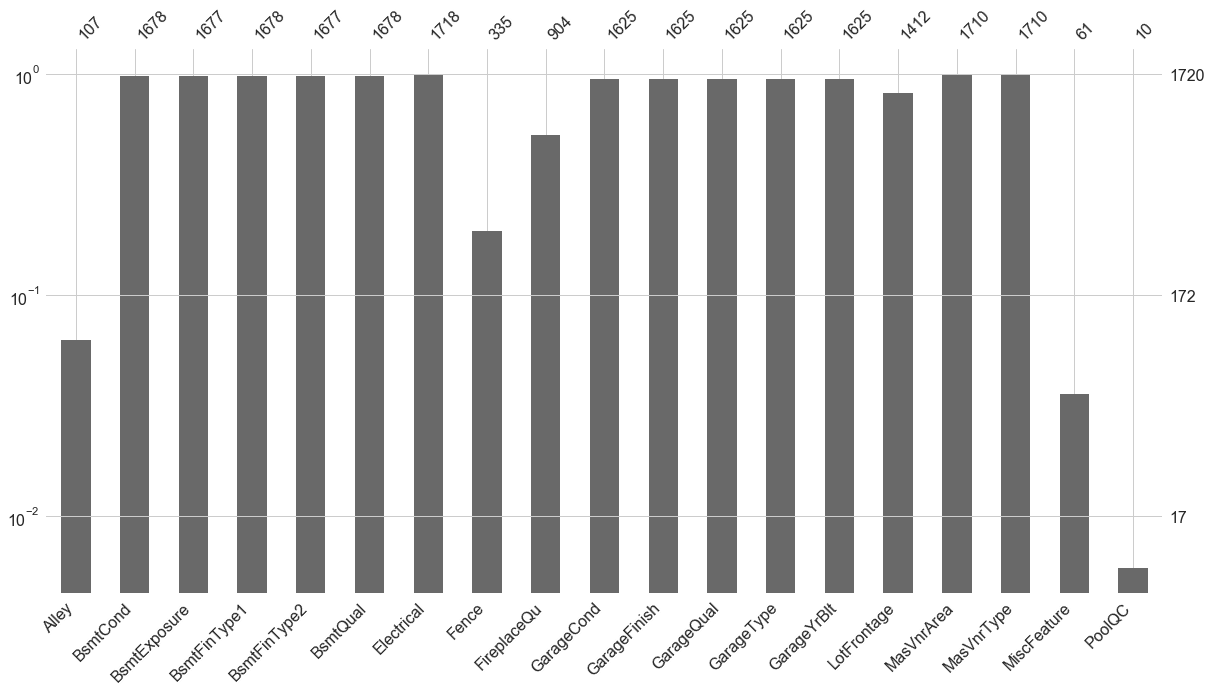

In [141]:
with sns.axes_style("whitegrid"):
    msno.bar(only_missing, log=True, figsize=(20,10));

<div class="alert alert-success">

We can see with this plot the number of non-missing values for each feature. We may think that removing the features that are missing in almost all the data is the best way to deal with them. However, it's not the case with all <i>NaN</i> values. For example, <i>PoolQC</i> having <i>NaN</i> value may simply mean that the house doesn't have a swimming pool.
</div>

<div class="alert alert-info">

Let's check that by looking at the feature <i>PoolArea</i>:
</div>

In [142]:
df = data[['PoolArea']] # Keep only the PoolArea column

print("The number of times where the PoolArea feature is equal to 0:", 
      int(df[df.PoolArea == 0].count()))
print("The number of times where the PoolArea feature is not equal to 0 (houses having a swimming pool):", 
      int(df[df.PoolArea != 0].count()))

# Mark data with NaN values with True and others with False
df_null = data[['PoolQC']].isnull()

# Filter data where the four columns are equal to True and then count them
print("The number of times where the PoolQC feature is missing:", int(df_null[df_null.PoolQC == True].count()))
print("The number of times where the PoolQC feature is indicated:", int(df_null[df_null.PoolQC == False].count()))

The number of times where the PoolArea feature is equal to 0: 1710
The number of times where the PoolArea feature is not equal to 0 (houses having a swimming pool): 10
The number of times where the PoolQC feature is missing: 1710
The number of times where the PoolQC feature is indicated: 10


<div class="alert alert-info">
Let's do the same with <i>MiscFeature</i> and see how many times the <i>MiscVal</i> feature was missing:
</div>

In [143]:
df = data[['MiscVal']] # Keep only the MiscVal column

print("The number of times where the MiscVal feature is equal to 0:", 
      int(df[df.MiscVal == 0].count()))
print("The number of times where the MiscVal feature is not equal to 0 (houses having a miscellaneous feature like gararge, elevator...):", 
      int(df[df.MiscVal != 0].count()))

# Mark data with NaN values with True and others with False
df_null = data[['MiscFeature']].isnull()
# Filter data where the four columns are equal to True and then count them
print("The number of times where the MiscFeature feature is missing:", int(df_null[df_null.MiscFeature == True].count()))
print("The number of times where the MiscFeature feature is indicated:", int(df_null[df_null.MiscFeature != True].count()))

The number of times where the MiscVal feature is equal to 0: 1662
The number of times where the MiscVal feature is not equal to 0 (houses having a miscellaneous feature like gararge, elevator...): 58
The number of times where the MiscFeature feature is missing: 1659
The number of times where the MiscFeature feature is indicated: 61


In [144]:
data[(df.MiscVal == 0) & (df_null.MiscFeature != True)][['MiscVal', 'MiscFeature']]

MiscVal MiscFeature
873         0        Othr
1200        0        Shed
0           0        Shed

<div class="alert alert-success">
<span class="label label-success">COMMENT</span><br><br>

We have the same case of <i>PoolQC</i> even though there are two cases where <i>MiscFeature</i> was indicating a non <i>NaN</i> value but <i>MiscVal</i> (Value of miscellaneous feature) was indicating $0$. However, the latter case is not a problem for us, we focus only on missing data.

</div>

<div class="alert alert-info">
Some features have the same amount of missing data (such as "<i>Garage...</i>" and others.). Let's check if they belong to the same data. To do that, we're going to use the <i>heatmap</i> belonging to our tool in <i>missingno</i> tool.
<br><br>
The heatmap will describe the degree of nullity relationship between the different features (how strongly the presence or absence of one variable affects the presence of another). The range of this nullity correlation is bounded between $-1$ and $1$. A perfect positive nullity correlation ($= 1$) indicates when the first feature and the second feature both have corresponding missing values while a perfect negative nullity correlation ($= -1$) means that one of the features is missing and the second is not missing.
</div>

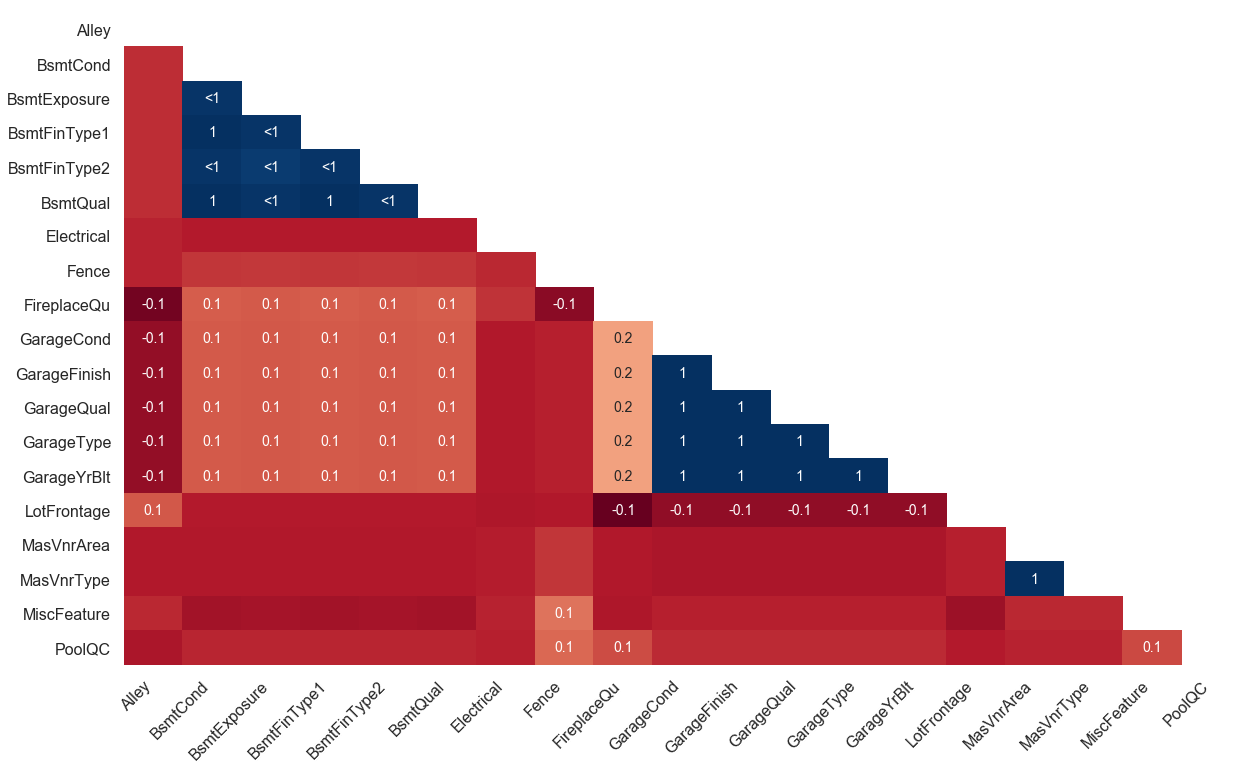

In [145]:
msno.heatmap(only_missing);

<div class="alert alert-success">
<span class="label label-success">COMMENT</span><br><br>

We can see for example that the "Garage..." features have missing data at the same time (which is equivalent to say that the house doesn't have a garage, given the file <i>Data description.rtf</i>), the same with the basement features. Entries marked $< 1$ have a correlation that is close to being exactingly positive, but is still not quite perfect (there are a few records which have one or the other, but not both). So, this points to a small number of records in the dataset which are erroneous (that may depend if the house has multiple types of basement finished area in our case). Entries with degree of nullity equal to $0$ are for features having no effect on each another and are not displayed. Some features have a very small degree of nullity (such as $\pm 0.1$), they have a negligeable effect on each other.

</div>

<div class="alert alert-info">
We can plot a dendrogram to reveal trends deeper than the pairwise ones visible in the correlation heatmap and thus more fully correlate variable completion.
</div>

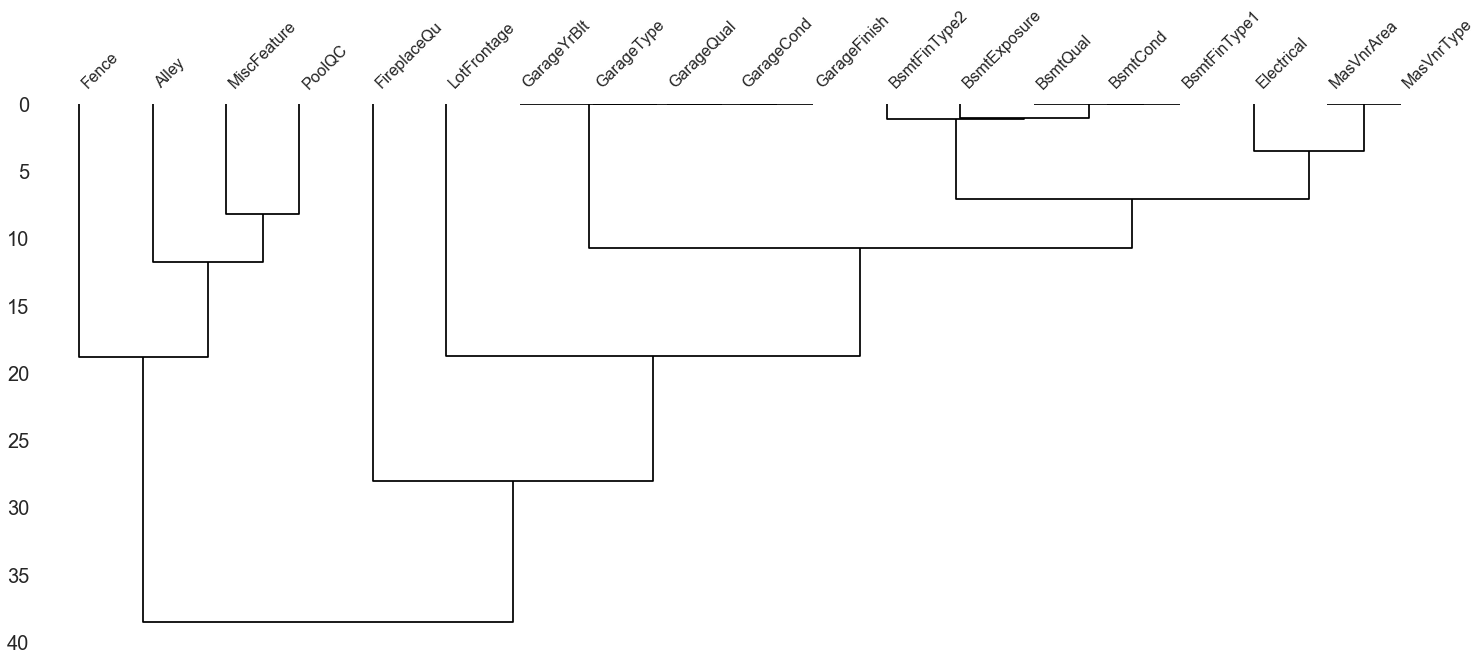

In [146]:
msno.dendrogram(only_missing);

<div class="alert alert-success">
<span class="label label-success">COMMENT</span><br><br>

The dendrogram uses a hierarchical clustering algorithm to bin variables against one another by their nullity correlation (measured in terms of binary distance). If we look at the dendrogram from a top-down perspective, we can see that the cluster leaves that are linked together at a distance of zero fully predict each others presence perfectly. Cluster leaves whose split close to zero, but not at it, predict one another very well, but still imperfectly. The height of the cluster leaf indicates how often the records are "mismatched" or incorrectly filled.
</div>

<div class="alert alert-info" id="cleaning_missing">
<span class="label label-info" style="font-size:12px;">CLEANING OF THE DATA</span><br><br>


Let's clean our data by working on these missing values. Data is important and, as we said before, we can't simply delete rows containing missing values. We need to replace the <i>NaN</i> values with the appropriate ones. Many features with <i>NaN</i> values mean the absence of this feature, <i>PoolQC NaN values</i> means no swimming pool, <i>Bsmt... NaN values</i> means no basement, <i>Garage... NaN values</i> means no garage and so on... Let's replace them with <i>None</i> value.

</div>

<div class="alert alert-danger">

<span class="label label-danger">N.B.</span>  The features we're going to replace with <i>None</i> values are only the features whose <i>NaN/NA</i> values mean their absence in the house as indicated in the file <i>Data description.rtf</i> describing the columns. Missing features such as <i>LotFrontage</i>, <i>GarageYrBlt</i>... are going to be imputed differently. 

</div>

In [147]:
def fillWithNone(df):  
    columns_to_fill = [
        "PoolQC", "MiscFeature", "Alley", "Fence", "FireplaceQu", "GarageType",
        "GarageCond", "GarageFinish", "GarageQual", "BsmtExposure", "BsmtFinType2", 
        "BsmtFinType1", "BsmtCond", "BsmtQual"
    ]
    
    for column in columns_to_fill:
        df[column].fillna("None", inplace=True)

In [148]:
fillWithNone(data)

<div class="alert alert-info">
Let's see how many missing data are left:
</div>

In [149]:
show_missing(data, 10)

Total  Percentage
LotFrontage    308   17.906977
GarageYrBlt     95    5.523256
MasVnrType      10    0.581395
MasVnrArea      10    0.581395
Electrical       2    0.116279
GarageCars       0    0.000000
GarageArea       0    0.000000
Functional       0    0.000000
FullBath         0    0.000000
Foundation       0    0.000000

<div class="alert alert-info">
<ul>

<li>The <i>LotFrontage</i> feature indicates the linear feet of street connected to a property. The <i>Neighborhood</i> feature indicates the physical locations within Ames city limits. We believe that these two features are connected. Therefore, we're going the replace <i>NaN</i> values of <i>LotFrontage</i> of each house with the median value of their neighborhoods.</li>

<li>The <i>GarageYrBlt</i> feature indicates the year garage was built. It's missing if there is no garage as indicated by the other features <i>Garage...</i>. We are going to replace this value with <strong>YrSold</strong> if they're missing.</li>

<li>The <i>MasVnrType</i> indicates the masonry veneer type. We're going to replace the missing value with the string <i>'None'</i> as indicated in this feature desciption (it takes a value among: <i>BrkCmn</i> for Brick Common - <i>BrkFace</i> for Brick Face - <i>CBlock</i> for Cinder Block - <i>Stone</i> for Stone - <i>None</i> for None). The feature <i>MasVnrArea</i> is related to <i>MasVnrType</i>. Therefore, its values are going to be replaced by $0$ if they're missing.</li>

<li>There is only one case where <i>Electrical</i> is missing and this case unfortunately is present in our test data, so we can't just drop it. We don't yet know if this factor is going to be important. However, as we dit with the <i>LotFrontage</i> feature, we're going to replace it by the most frequent electrical system in the neighborhood.</li>

</ul>
</div>

In [150]:
def replaceMissingValues(df):
    df["LotFrontage"] = df.groupby(['Neighborhood'])['LotFrontage'].transform(
        lambda x: x.fillna(x.median())
    ) # Linear feet of street connected to property
    
    # In case of a neighborhood has only LotFrontage NaN values, we use the variable median
    df["LotFrontage"].fillna(df["LotFrontage"].median(), inplace=True)
    
    #df["GarageYrBlt"] = df["GarageYrBlt"].fillna(0) # Year garage was built = 0 (No Garage)
    df["GarageYrBlt"].fillna(df["YrSold"], inplace=True) # Year garage was built = Year Sold (No Garage)
        
    df["GarageArea"] = df["GarageArea"].fillna(0) # Size of garage in square feet = 0 (No Garage)
    df["GarageCars"] = df["GarageCars"].fillna(0) # Size of garage in car capacity = 0 (No Garage)

    df["MasVnrArea"] = df["MasVnrArea"].fillna(0) # Masonry veneer area in square feet = 0 <=> Masonry veneer type = None
    df["MasVnrType"] = df["MasVnrType"].fillna("None") # Masonry veneer type = None
    
    df["SaleType"] = df["SaleType"].fillna("Oth")
    
    
    df["Electrical"] = df.groupby(['Neighborhood'])['Electrical'].transform(
        lambda x: x.fillna(x.value_counts().index[0])
    ) # Electrical system
    
    df["MSZoning"] = df.groupby(['Neighborhood'])['MSZoning'].transform(
        lambda x: x.fillna(x.value_counts().index[0])
    ) # MSZoning is filled by the most common value in the neighborhood
    
    df["Exterior1st"] = df.groupby(['Neighborhood'])['Exterior1st'].transform(
        lambda x: x.fillna(x.value_counts().index[0])
    ) # Exterior1st
    
    df["Exterior2nd"] = df.groupby(['Neighborhood'])['Exterior2nd'].transform(
        lambda x: x.fillna(x.value_counts().index[0])
    ) # Exterior2nd
    
    # If the the kitchen quality is missing
    df["KitchenQual"] = df["KitchenQual"].fillna("None")
    
    # If the values of bath are missing <=> no bath
    df["HalfBath"] = df["HalfBath"].fillna(0)
    df["FullBath"] = df["FullBath"].fillna(0)

    # Missing values are likely zero (and none for categorical features) for having no basement
    df["BsmtFinSF1"] = df["BsmtFinSF1"].fillna(0)
    df["BsmtFinSF2"] = df["BsmtFinSF2"].fillna(0)
    df["BsmtUnfSF"] = df["BsmtUnfSF"].fillna(0)
    df["TotalBsmtSF"] = df["TotalBsmtSF"].fillna(0)
    df["BsmtHalfBath"] = df["BsmtHalfBath"].fillna(0)
    df["BsmtFullBath"] = df["BsmtFullBath"].fillna(0)
    df["BsmtQual"] = df["BsmtQual"].fillna("None")
    df["BsmtCond"] = df["BsmtCond"].fillna("None")
    df["BsmtExposure"] = df["BsmtExposure"].fillna("None")
    df["BsmtFinType1"] = df["BsmtFinType1"].fillna("None")
    df["BsmtFinType2"] = df["BsmtFinType2"].fillna("None")  
    
    df["Functional"] = df["Functional"].fillna("Typ") # Functional missing <=> Typical
    
    # For this categorical feature almost all values are "AllPub", except for one "NoSeWa" and 2 NA .
    # Since the houses with 'NoSewa' are in the training set, this feature won't be helpful. 
    # So, we can safely remove it.
    df.drop(['Utilities'], axis=1, inplace=True)

In [151]:
replaceMissingValues(data)

<div class="alert alert-info">
Let's see if there are some missing values.
</div>

In [152]:
data.isnull().any().any()

False

<div class="alert alert-info">
We're going to work from now on only on the training data. Therefore, let's apply our imputing of the missing value on them.
</div>

In [153]:
def impute_data(df):
    """
    This function impute the missing data by using the function 'fillWithNone' to fill some missing values with 'None'
    and the function 'replaceMissingValues' to replace the remaining missing values with appropriate ones.
    """
    fillWithNone(df)
    replaceMissingValues(df)

In [154]:
impute_data(train_data)

<div class="alert alert-info" id="analysis_data">
<span class="label label-info" style="font-size:12px;">ANALYSIS AND VISUALIZATION OF THE DATA</span><br><br>

Let's see some plots about our data to determine some relationships between our features. We will start with a graph representing the relation between <i>GrLivArea</i> (Above grade (ground) living area square feet) and the sales prices because <i>GrLivArea</i> is very important in determining the house price.
</div>

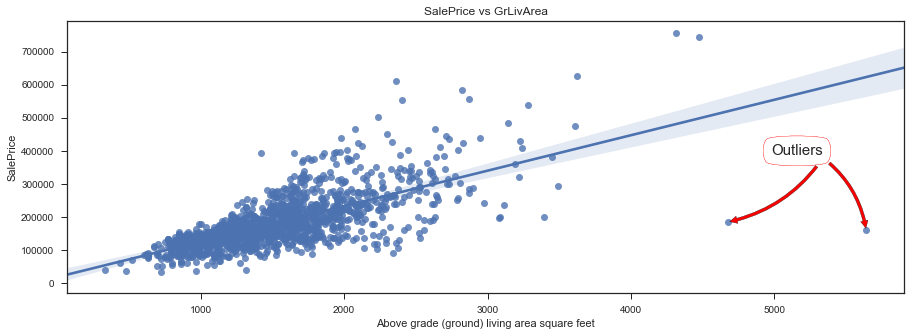

In [155]:
df = train_data[(train_data.GrLivArea > 4000) & (train_data.SalePrice < 4e5)]
grLivArea_outliers = df.GrLivArea.tolist()
salePrice_outliers = df.SalePrice.tolist()

plt.figure(figsize=(15,5))
sns.regplot('GrLivArea','SalePrice', data=train_data)
plt.title('SalePrice vs GrLivArea')
plt.xlabel('Above grade (ground) living area square feet')

# Annotate outliers
x_text = np.mean(grLivArea_outliers)
y_text = 4e5
for x, y in zip(grLivArea_outliers, salePrice_outliers):
    plt.annotate("Outliers",
                 xy=(x, y), xycoords='data',
                 xytext=(x_text, y_text), textcoords='data',
                 size=15, va="center", ha="center",
                 bbox=dict(boxstyle="round4", fc="w", ec="r", pad=0.6),
                 arrowprops=dict(arrowstyle="simple",
                                 connectionstyle="arc3,rad=-0.2",
                                 relpos=(1., 0.),
                                 fc="r")
                )

<div class="alert alert-success">
<span class="label label-success">COMMENT</span><br><br>
As expected, bigger <i>GrLivArea</i> (Above grade (ground) living area square feet) results in higher sale prices. We can see a linear relation between the sales price and the <i>GrLivArea</i>. On the other hand, we can see some <strong>outliers</strong> (observation points that are distant from other observations) in our data representing relatively cheap houses with very large <i>GrLivArea</i> (Partial Sales that likely don't represent actual market values). An outlier can cause serious problems in statistical analyses by <strong>pulling</strong> our estimated regression line further away from the true population regression line. When the outliers are left in the model, the model <strong>overfits</strong> and is sensitive to these points. Therefore, it predicts values much higher than the true future values. However, when outliers are removed, it predicts much <strong>more accurately</strong> with a generalised model that splits the distribution of the data points evenly. In addition, we think that other houses having more than $4000$ square feet are simply unusual sales (very large houses priced relatively appropriately). Therefore, it's better to exclude houses having more than $4000$ square feet.
</div>

In [156]:
train_data.drop(train_data[train_data.GrLivArea > 4000].index, inplace=True)

<div class="alert alert-info">
Let's see the plot now and the regression line:
</div>

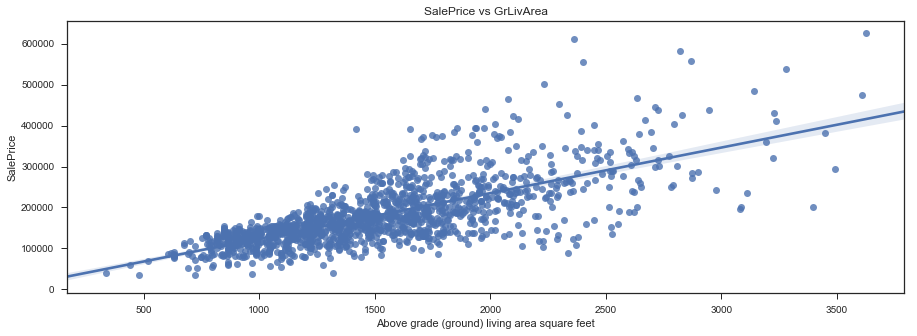

In [157]:
plt.figure(figsize=(15,5))
sns.regplot('GrLivArea','SalePrice', data=train_data)
plt.title('SalePrice vs GrLivArea')
plt.xlabel('Above grade (ground) living area square feet');

<div class="alert alert-info">
Let's see the number of houses in each neighborhood.
</div>

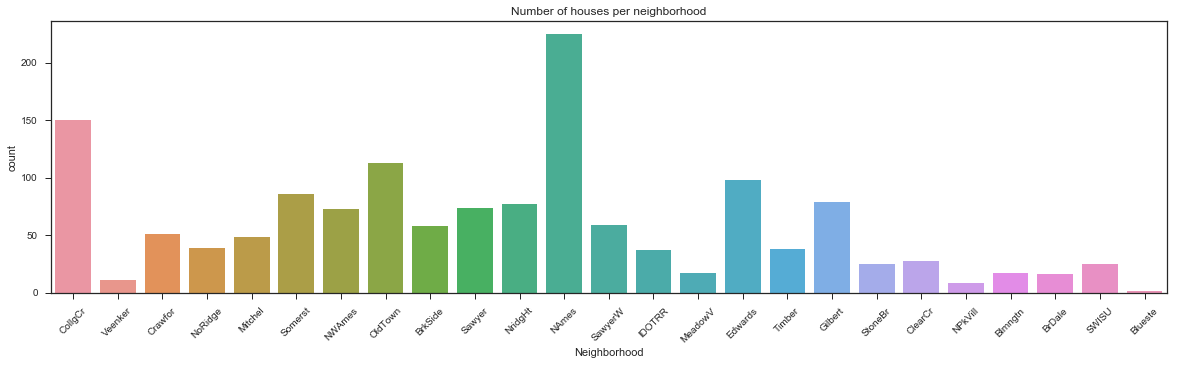

In [158]:
plt.figure(figsize=(20,5)) # The figure size
sns.countplot(x='Neighborhood', data=train_data)
plt.title('Number of houses per neighborhood') # The plot title
plt.xticks(rotation=45); # Rotate the x-ticks with 45 degrees

<div class="alert alert-success">
<span class="label label-success">COMMENT</span><br><br>
Most houses are in North Ames and then College Creek. The Bluestem neighborhood doesn't have many houses.
</div>

<div class="alert alert-info">

Let's see if there is influence of the neighborhood over the sales price.
</div>

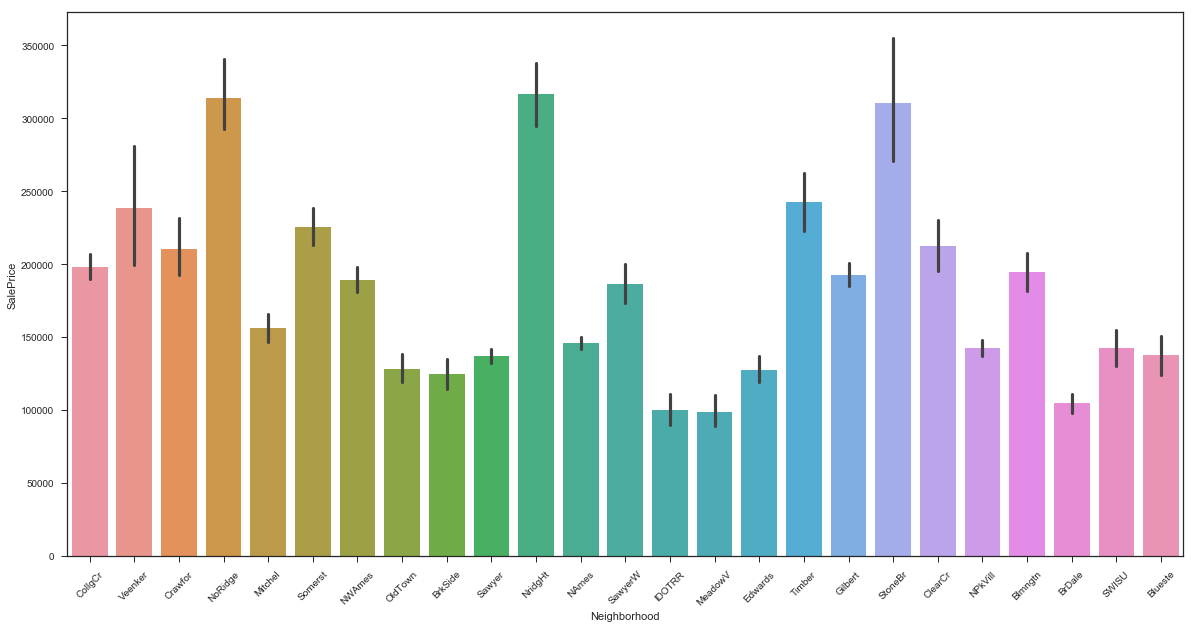

In [159]:
plt.figure(figsize=(20,10)) # The figure size
sns.barplot('Neighborhood', 'SalePrice', data=train_data)
plt.xticks(rotation=45); # Rotate the x-ticks with 45 degrees

<div class="alert alert-success">
<span class="label label-success">COMMENT</span><br><br>
We can see that MeadowV (Meadow Village) has the cheapest houses (less than $100 \ 000 \ \$$), followed by IDOTRR (Iowa DOT and Rail Road) and BrDale (Briardale). On the other hand, NridgHt (Northridge Heights) has the most expensive houses. 
</div>

<div class="alert alert-info">

Let's examine the <i>SalePrice</i> as a function of <i>GrLivArea</i> (Above grade (ground) living area square feet) in each neighborhood.
</div>

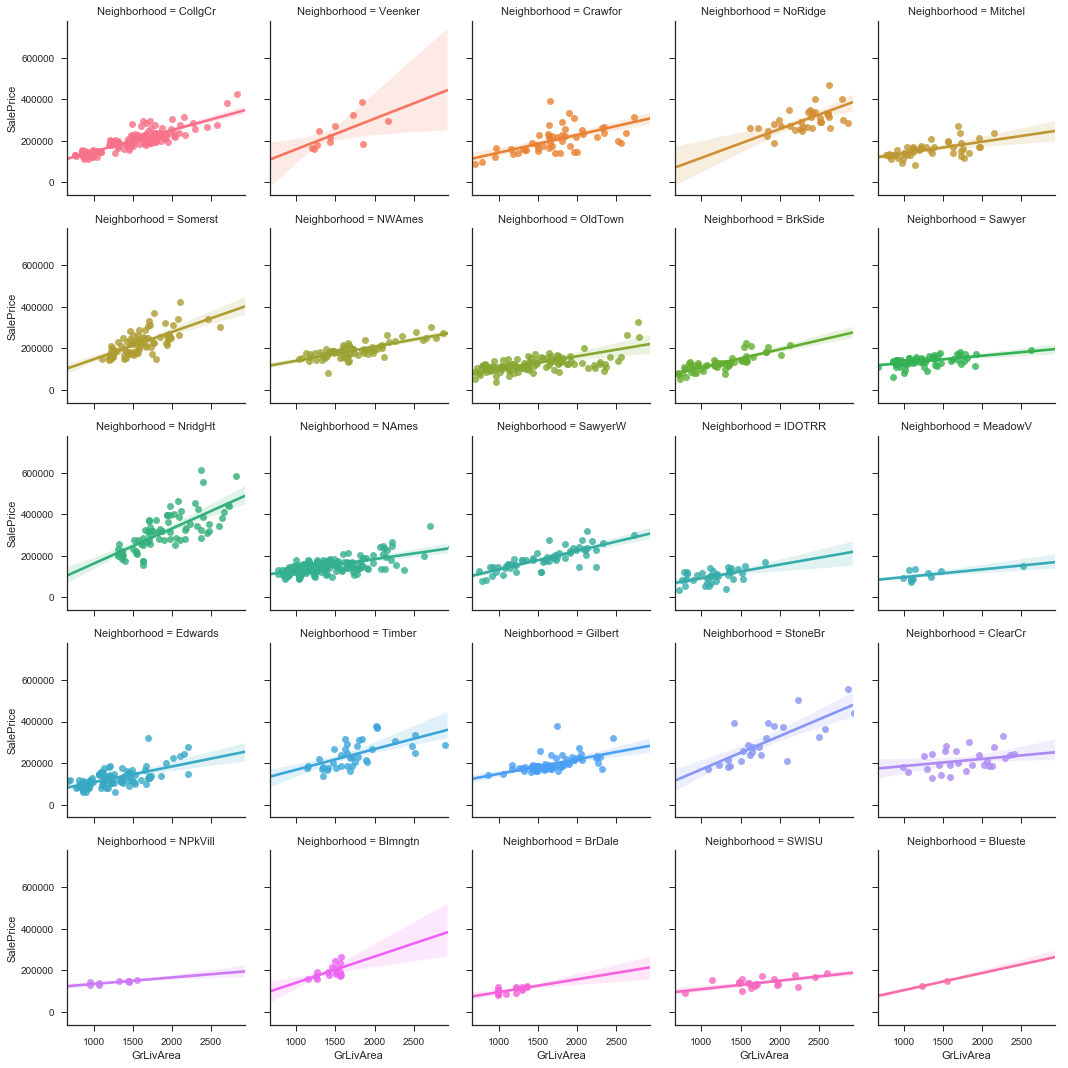

In [160]:
g = sns.FacetGrid(train_data, col="Neighborhood", col_wrap=5, hue="Neighborhood")
g = g.map(sns.regplot, "GrLivArea", "SalePrice")

<div class="alert alert-success">
<span class="label label-success">COMMENT</span><br><br>

As we saw before, bigger <i>GrLivArea</i> results in higher sale prices. However, the slope of the regression line changes from a neighborhood to another, so, the sensitivity of the <i>SalePrice</i> to <i>GrLivArea</i> depends on the neighborhood. For example, the neighborhoods that we saw before and have the chepeast houses have a slight slope of their <i>SalePrice</i> as a function of <i>GrLivArea</i> comparing to the other neighborhoods who have the most expensive houses where the slope is higher.
</div>

<div class="alert alert-info">

Let's see if the relationship between the neighborhood over the sale price per square feet ($= \frac{SalePrice}{GrLivArea}$).
</div>

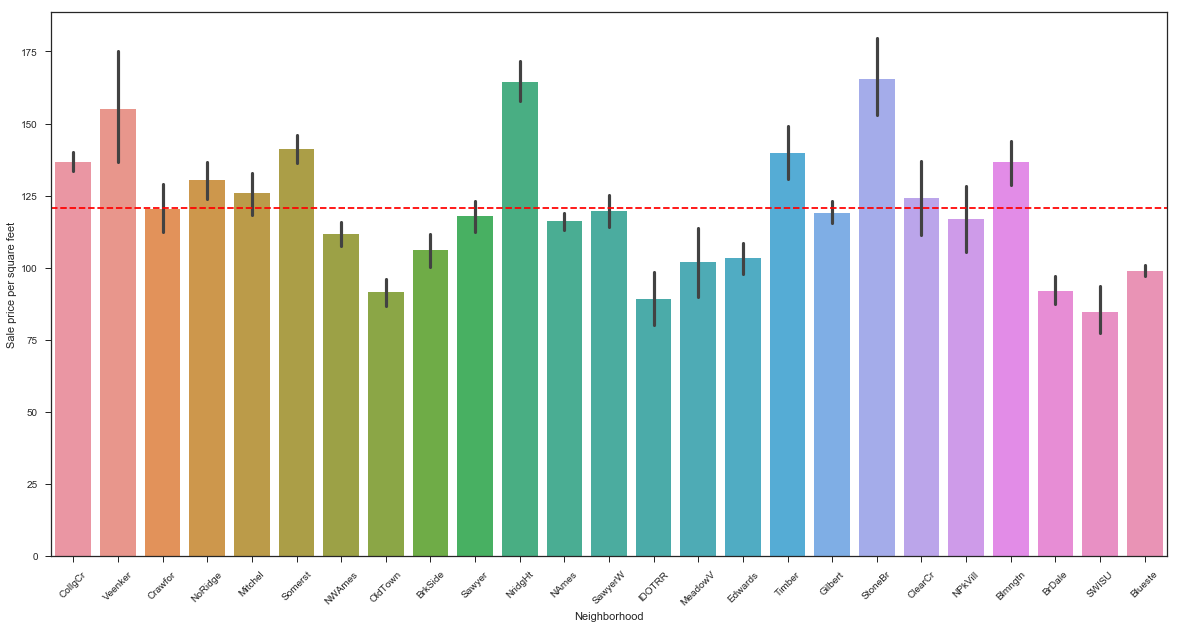

In [161]:
train_data['SalePricePerSquareFeet'] = train_data['SalePrice'] / train_data['GrLivArea']
mean_SalePricePerSquareFeet = np.mean(train_data.SalePricePerSquareFeet.tolist())

plt.figure(figsize=(20,10)) # The figure size
sns.barplot('Neighborhood', 'SalePricePerSquareFeet', data=train_data)
plt.axhline(y=mean_SalePricePerSquareFeet, color='r', linestyle='--') # Plot the mean
plt.xticks(rotation=45); # Rotate the x-ticks with 45 degrees
plt.ylabel("Sale price per square feet");

<div class="alert alert-success">
<span class="label label-success">COMMENT</span><br><br>

We can see that SWISU (South & West of Iowa State University) has the cheapest houses per square feet, followed by IDOTRR (Iowa DOT and Rail Road) and OldTown (Old Town). On the other hand, StoneBr (Stone Brook) has the most expensive houses per square feet. This results are different from the the previous one (neighborhoods with the most expensive or cheapest houses) and more precise. Nowadays, when we hear someone intending to buy a new house or even rent it, we can see that besides the above grade (ground) living area square feet and the quality of the house, the neighborhoods influence the sales price, and that's exactly what we've just found. The reasons why a neighborhoods influence the supply and demand (and thus the sales price) vary (crimes, drugs, infrastructure, quality...).
</div>

<div class="alert alert-info">

Let's see if there are real reasons why some neighborhoods have expensive houses and others cheaper ones. Let's start with the <i>OverallQual</i> (Rates the overall material and finish of the house):
</div>

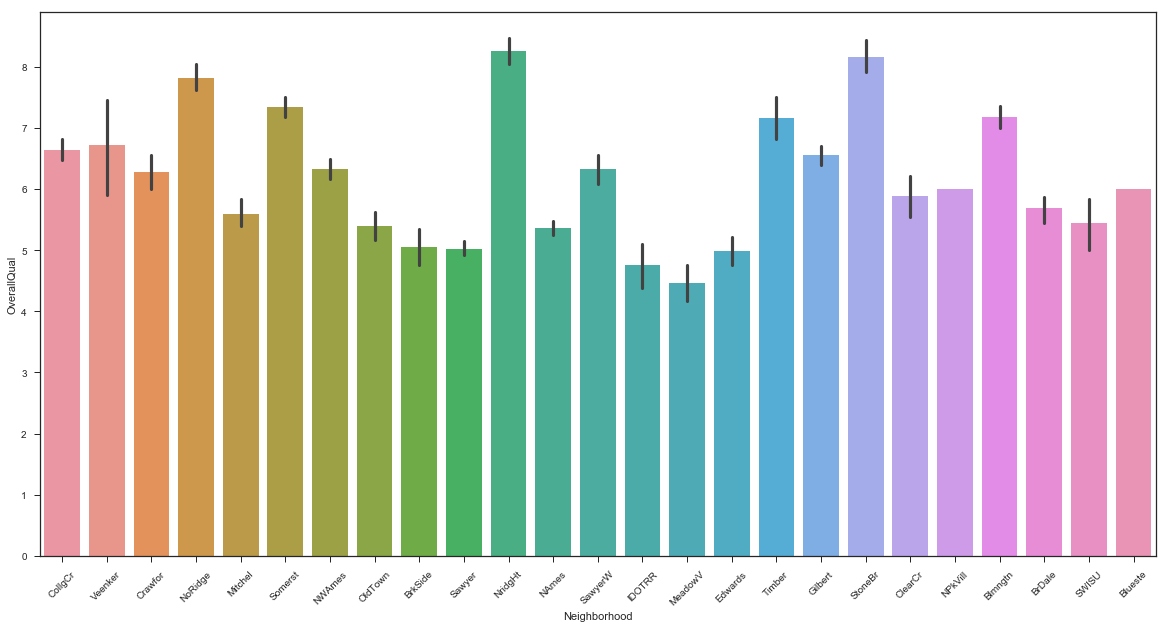

In [162]:
plt.figure(figsize=(20,10)) # The figure size
sns.barplot('Neighborhood', 'OverallQual', data=train_data)
plt.xticks(rotation=45); # Rotate the x-ticks with 45 degrees

<div class="alert alert-success">
<span class="label label-success">COMMENT</span><br><br>
The two most expensive houses per square feet (<i>NridgHt</i> and <i>StoneBr</i>) have on average a very good quality. However, the overall quality is not the only influence of our previous results. The order is different. The 6th cheapest neighborhood per square feet is the one with the lowest quality. Therefore, there are other factors that may explain our previous results (the influence of the neighborhood over the sales price).
</div>

<div class="alert alert-info">

Let's see now the overall condition of the house:
</div>

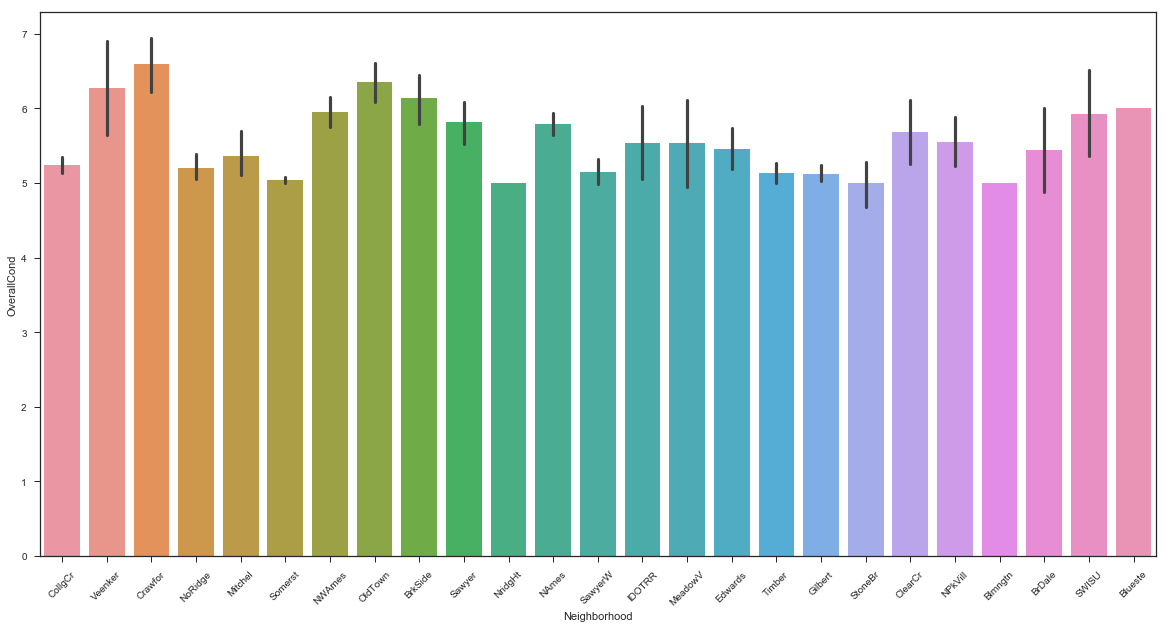

In [163]:
plt.figure(figsize=(20,10)) # The figure size
sns.barplot('Neighborhood', 'OverallCond', data=train_data)
plt.xticks(rotation=45); # Rotate the x-ticks with 45 degrees

<div class="alert alert-success">
<span class="label label-success">COMMENT</span><br><br>
Results here are weird. It seems like that <i>OverallCond</i> is not taken into account or not very important when people buy houses. We can see that the house having the highest overall conditions (<i>Crawfor</i>: Crawford) has a sale price per square feet lower than the average, or even worse, <i>OldTown</i> (Old Town) has the 3rd chepeast house per square feet on average but the second best neighborhood on overall conditions on average. <i>NridgHt</i> and <i>StoneBr</i> are expensive per square feet but have the lowest overall condition.
</div>

<div class="alert alert-info">

Let's see if the age of the house at sell has an influence:
</div>

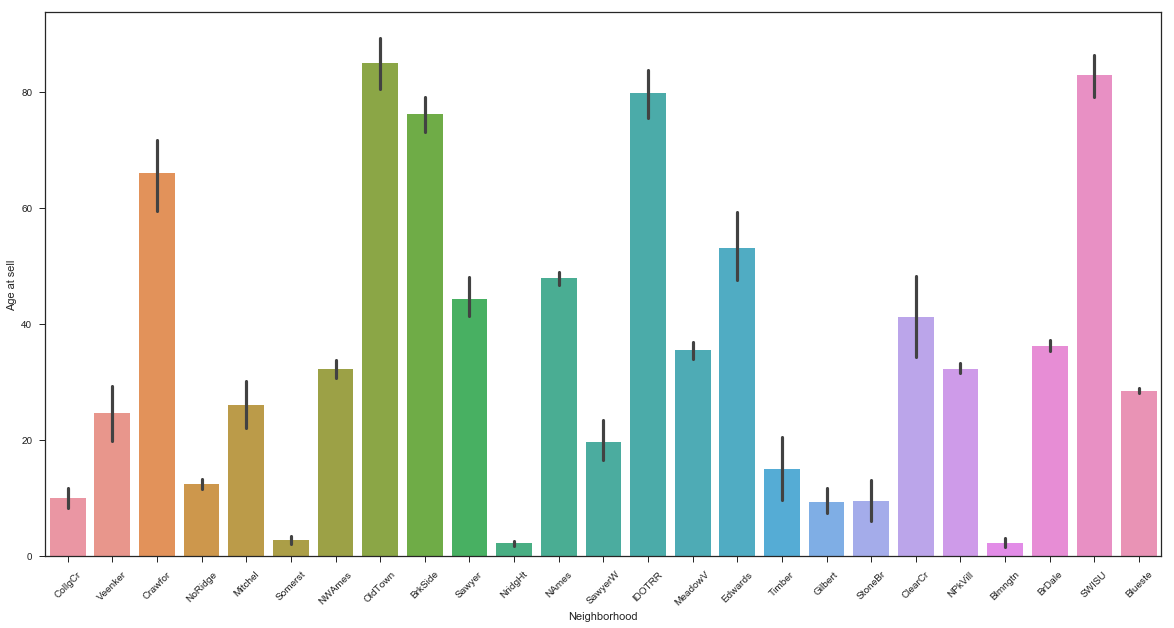

In [164]:
train_data['AgeAtSell'] = train_data['YrSold'] - train_data['YearBuilt']

plt.figure(figsize=(20,10)) # The figure size
sns.barplot('Neighborhood', 'AgeAtSell', data=train_data)
plt.xticks(rotation=45); # Rotate the x-ticks with 45 degrees
plt.ylabel("Age at sell");

<div class="alert alert-success">
<span class="label label-success">COMMENT</span><br><br>
Here we found that the houses in the most expensive neighborhoods are newer than those in the cheapest ones. However, the neighborhood with the oldest age at sell has the second best overall condition but it's one of the cheapest neighborhood per square feet which is a bit surprising. We can say that people care more about the age of the houses more than the overall condition and there is a less care about the new houses comparing to the old ones. 
</div>

<div class="alert alert-info">
Some houses have remodeling or additions, so let's see if the remodeling age has more influence over the fact that neighborhoods affect sales price:
</div>

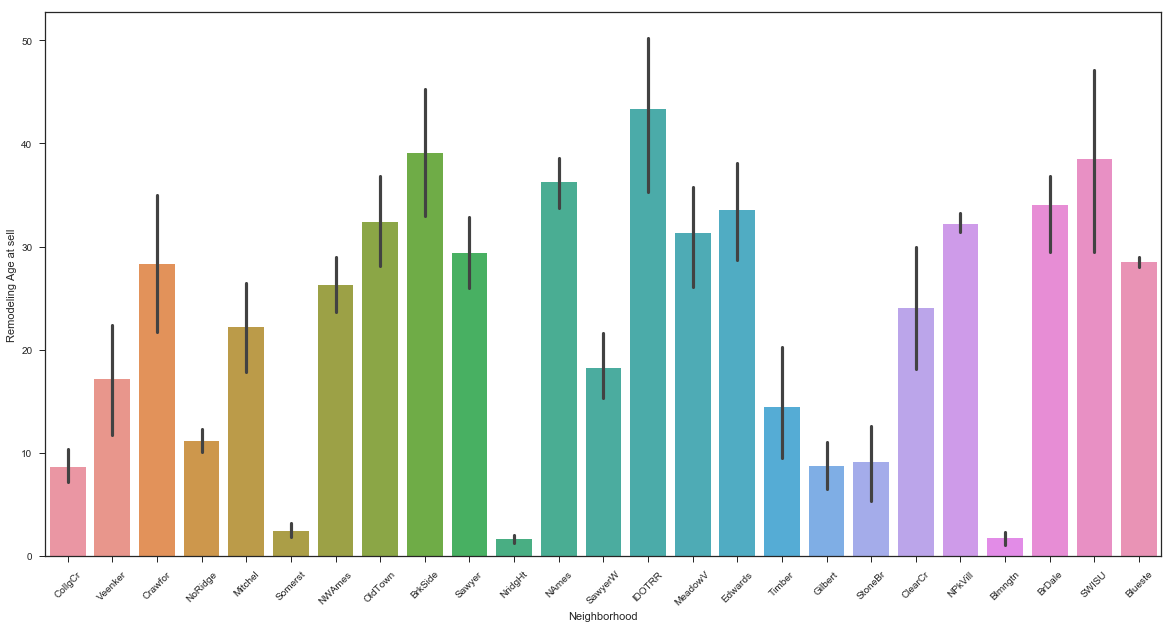

In [165]:
train_data['RemodelingAgeAtSell'] = train_data['YrSold'] - train_data['YearRemodAdd']

plt.figure(figsize=(20,10)) # The figure size
sns.barplot('Neighborhood', 'RemodelingAgeAtSell', data=train_data)
plt.xticks(rotation=45); # Rotate the x-ticks with 45 degrees
plt.ylabel("Remodeling Age at sell");

<div class="alert alert-success">
<span class="label label-success">COMMENT</span><br><br>

Cheapest neighborhoods have a high remodeling age comparing to the most expensive neighborhoods which have either a low age at sell or a low remodeling age at sell. Anyway, through our study on why neighborhoods influence the sales price, it seems that <i>YearBuilt</i> has a big influence on the sale price. From now on, we're going to study directly the influence of our features over the sales price.
</div>

<div class="alert alert-info">

Let's see the relationship between the overall quality and the sale price.
</div>

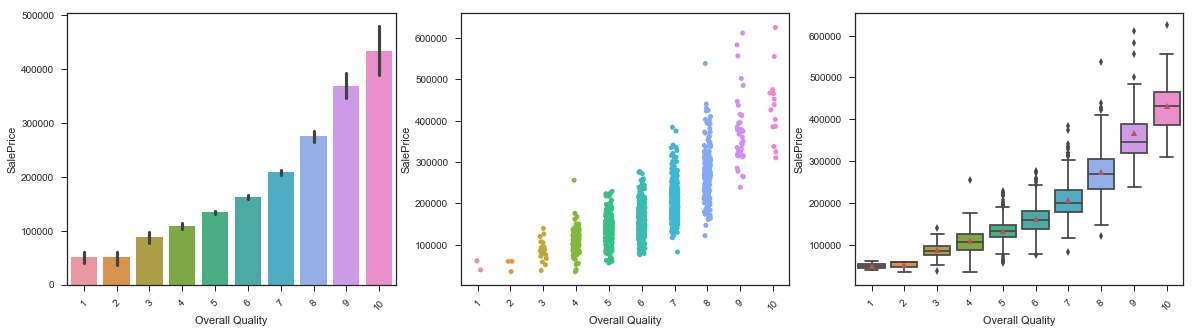

In [166]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.barplot('OverallQual', 'SalePrice', data=train_data)
plt.xticks(rotation=45) # Rotate the x-ticks with 45 degrees
plt.xlabel('Overall Quality')

plt.subplot(1, 3, 2)
sns.stripplot('OverallQual', 'SalePrice', data=train_data, size = 5, jitter = True)
plt.xticks(rotation=45) # Rotate the x-ticks with 45 degrees
plt.xlabel('Overall Quality')


plt.subplot(1, 3, 3)
sns.boxplot('OverallQual', 'SalePrice', data=train_data, showmeans=True)
plt.xticks(rotation=45); # Rotate the x-ticks with 45 degrees
plt.xlabel('Overall Quality');

<div class="alert alert-success">
<span class="label label-success">COMMENT</span><br><br>

As expected, the sales price increases as the overall material quality increases. We see here a high correlation with the increase in overall quality and the sale price.
</div>

<div class="alert alert-info">

Let's see if the original construction date (YearBuilt) has influence over the over material quality. To have a better view, we're going to add a new column grouping each 10 years.
</div>

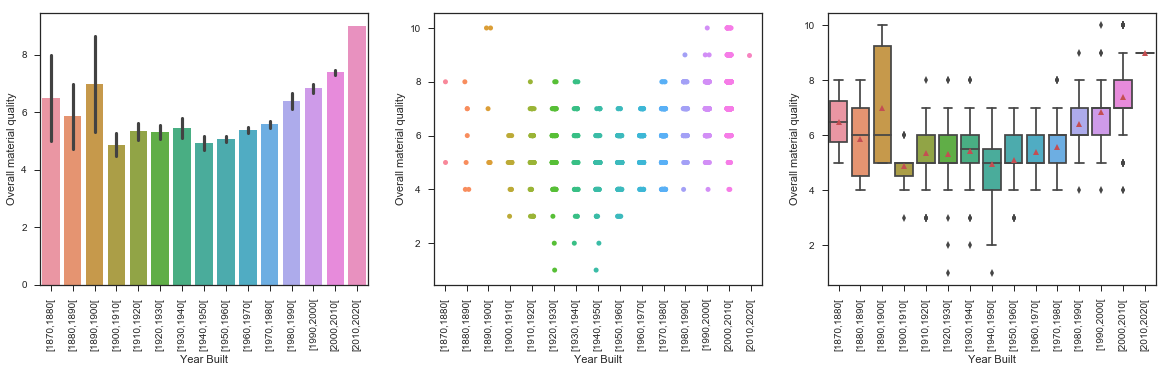

In [167]:
train_data['YearBuilt2'] = train_data['YearBuilt'].apply(lambda x: "[" + str(x - x %10) + "," + str(x - x %10 + 10) + "[")

plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.barplot('YearBuilt2', 'OverallQual', data=train_data, order=sorted(train_data['YearBuilt2'].unique().tolist()))
plt.xticks(rotation=90) # Rotate the x-ticks with 45 degrees
plt.xlabel('Year Built')
plt.ylabel("Overall material quality");

plt.subplot(1, 3, 2)
sns.stripplot('YearBuilt2', 'OverallQual', data=train_data, size = 5, jitter = True, order=sorted(train_data['YearBuilt2'].unique().tolist()))
plt.xticks(rotation=90) # Rotate the x-ticks with 45 degrees
plt.xlabel('Year Built')
plt.ylabel("Overall material quality");


plt.subplot(1, 3, 3)
sns.boxplot('YearBuilt2', 'OverallQual', data=train_data, order=sorted(train_data['YearBuilt2'].unique().tolist()), showmeans=True)
plt.xticks(rotation=90); # Rotate the x-ticks with 45 degrees
plt.xlabel('Year Built')
plt.ylabel("Overall material quality");

<div class="alert alert-success">
<span class="label label-success">COMMENT</span><br><br>

It seems that the overall material quality does not increase over the years. The box plot is proving it. We had some excellent and very excellent house at the end of the $19^{th}$ century. The quality decreased during the $20^{th}$ century, and at the end of it and the beginninng of the  $21^{th}$ century, the quality of houses is in general above average or good with only few outliers having a very good to very excellent quality. It seems that overall material quality is not very important in building houses nowadays and there are more important factors.
</div>

<div class="alert alert-info">

Let's see the relationship between the overall condition of the house and the sale price.
</div>

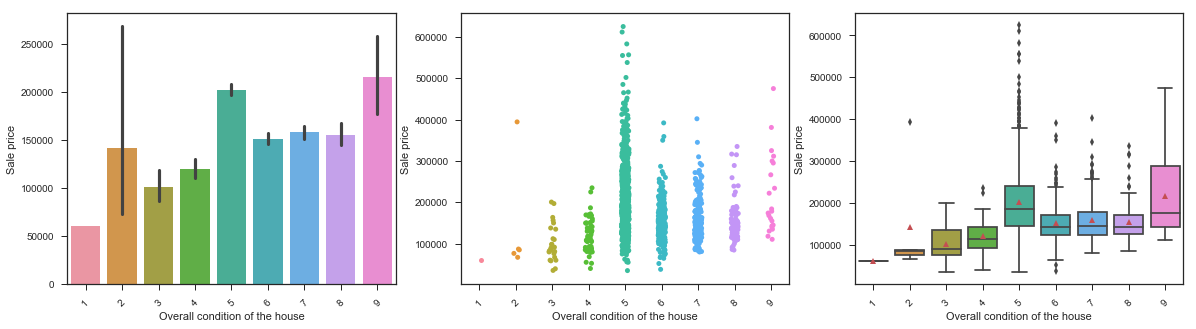

In [168]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.barplot('OverallCond', 'SalePrice', data=train_data)
plt.xticks(rotation=45) # Rotate the x-ticks with 45 degrees
plt.xlabel('Overall condition of the house')
plt.ylabel("Sale price");

plt.subplot(1, 3, 2)
sns.stripplot('OverallCond', 'SalePrice', data=train_data, size = 5, jitter = True)
plt.xticks(rotation=45) # Rotate the x-ticks with 45 degrees
plt.xlabel('Overall condition of the house')
plt.ylabel("Sale price");


plt.subplot(1, 3, 3)
sns.boxplot('OverallCond', 'SalePrice', data=train_data, showmeans=True)
plt.xticks(rotation=45); # Rotate the x-ticks with 45 degrees
plt.xlabel('Overall condition of the house')
plt.ylabel("Sale price");

<div class="alert alert-success">
<span class="label label-success">COMMENT</span><br><br>

The overall condition of the house doesn't influence very much the sale price. There is a positive correlation with the sale price but we see a peak at a value of $5$ (an average overall condition), along with a high number of observations at this value. In addition, there are many outliers having an average overall condition and are more expensive than houses with excellent overall condition.
</div>

<div class="alert alert-info">

We saw before that the original construction date (YearBuilt) has a high influence on the sale price. Let's see it here independently (in general, without taking into account the neighborhood as we did before):
</div>

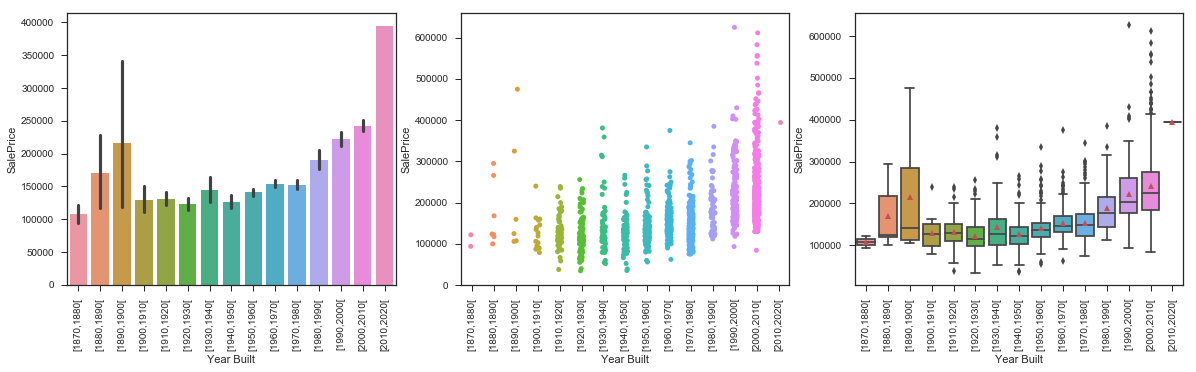

In [169]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.barplot('YearBuilt2', 'SalePrice', data=train_data, order=sorted(train_data['YearBuilt2'].unique().tolist()))
plt.xticks(rotation=90) # Rotate the x-ticks with 45 degrees
plt.xlabel('Year Built');

plt.subplot(1, 3, 2)
sns.stripplot('YearBuilt2', 'SalePrice', data=train_data, size = 5, jitter = True, order=sorted(train_data['YearBuilt2'].unique().tolist()))
plt.xticks(rotation=90) # Rotate the x-ticks with 45 degrees
plt.xlabel('Year Built');


plt.subplot(1, 3, 3)
sns.boxplot('YearBuilt2', 'SalePrice', data=train_data, order=sorted(train_data['YearBuilt2'].unique().tolist()), showmeans=True)
plt.xticks(rotation=90); # Rotate the x-ticks with 45 degrees
plt.xlabel('Year Built');

<div class="alert alert-success">
<span class="label label-success">COMMENT</span><br><br>
The sale price increases over years from 1940, but we have expensive houses that were built before, very likely they were remodelled after.
</div>

<div class="alert alert-info">

Let's check the influence of the remodeling date. We're going to add a new column grouping each 10 years of <i>YearRemodAdd</i> (Remodel date, same as construction date if no remodeling or addition) as we did before with <i>YearBuilt</i>.
</div>

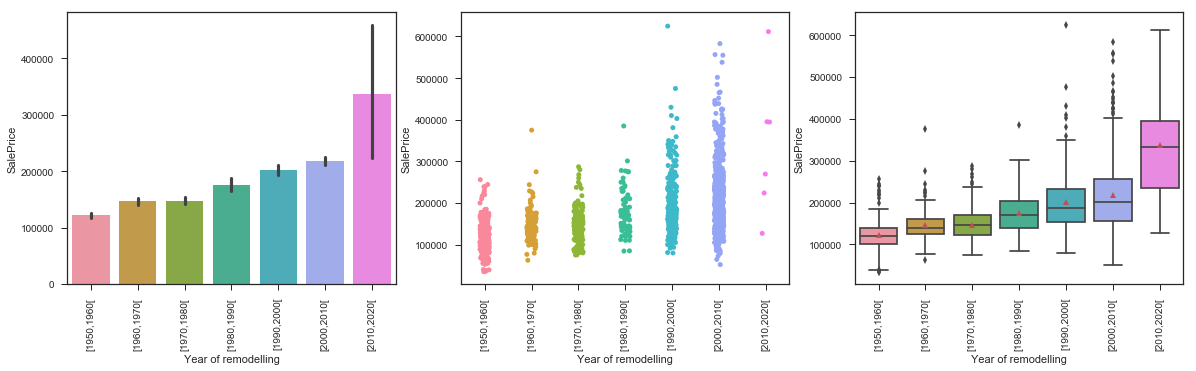

In [170]:
train_data['YearRemodAdd2'] = train_data['YearRemodAdd'].apply(lambda x: "[" + str(x - x %10) + "," + str(x - x %10 + 10) + "[")

plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.barplot('YearRemodAdd2', 'SalePrice', data=train_data, order=sorted(train_data['YearRemodAdd2'].unique().tolist()))
plt.xticks(rotation=90) # Rotate the x-ticks with 45 degrees
plt.xlabel('Year of remodelling');

plt.subplot(1, 3, 2)
sns.stripplot('YearRemodAdd2', 'SalePrice', data=train_data, size = 5, jitter = True, order=sorted(train_data['YearRemodAdd2'].unique().tolist()))
plt.xticks(rotation=90) # Rotate the x-ticks with 45 degrees
plt.xlabel('Year of remodelling');

plt.subplot(1, 3, 3)
sns.boxplot('YearRemodAdd2', 'SalePrice', data=train_data, order=sorted(train_data['YearRemodAdd2'].unique().tolist()), showmeans=True)
plt.xticks(rotation=90); # Rotate the x-ticks with 45 degrees
plt.xlabel('Year of remodelling');

<div class="alert alert-success">
<span class="label label-success">COMMENT</span><br><br>
The remodelling of houses in our training data started from $1950$. The sale price increases as long as the remodelling is new.
</div>

<div class="alert alert-info">

Let's add a column indicating $1$ if the house was remodelled and $0$ if not in order to see better the influence of remodelling on our sale price:
</div>

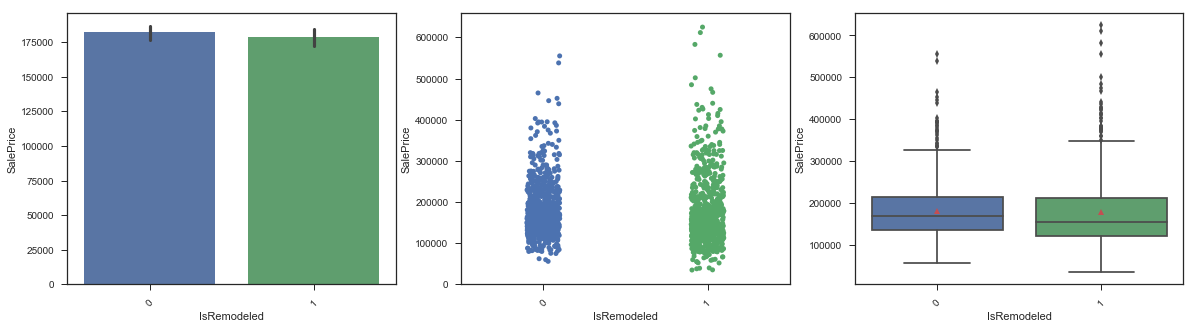

In [171]:
train_data['IsRemodeled'] = ((train_data['YearRemodAdd'] - train_data['YearBuilt']) > 0) * 1

plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.barplot('IsRemodeled', 'SalePrice', data=train_data)
plt.xticks(rotation=45) # Rotate the x-ticks with 45 degrees

plt.subplot(1, 3, 2)
sns.stripplot('IsRemodeled', 'SalePrice', data=train_data, size = 5, jitter = True)
plt.xticks(rotation=45) # Rotate the x-ticks with 45 degrees

plt.subplot(1, 3, 3)
sns.boxplot('IsRemodeled', 'SalePrice', data=train_data, showmeans=True)
plt.xticks(rotation=45); # Rotate the x-ticks with 45 degrees

<div class="alert alert-success">
<span class="label label-success">COMMENT</span><br><br>
It seems that the fact that the house is remodeled or not is not really important. The means are close even if it's a litte bit higher for the non-remodeled houses.
</div>

<div class="alert alert-info">
Let's see the number of houses in each <i>MSZoning</i> (Identifies the general zoning classification of the sale).
</div>

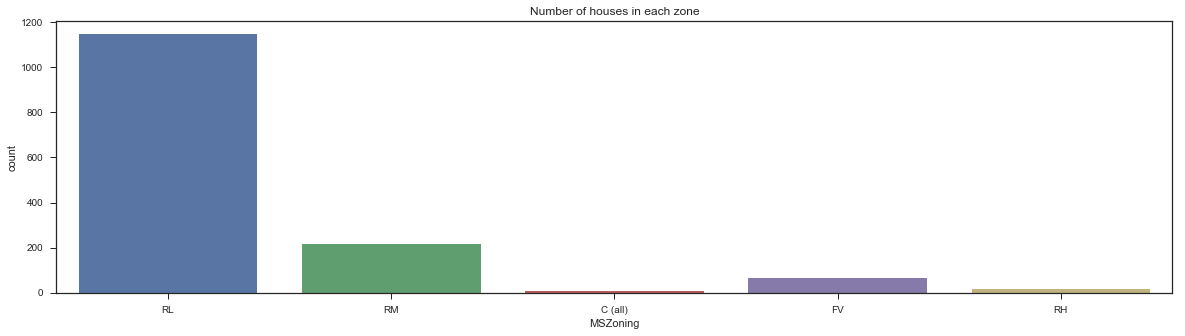

In [172]:
plt.figure(figsize=(20,5)) # The figure size
sns.countplot(x='MSZoning', data=train_data)
plt.title('Number of houses in each zone'); # The plot title

<div class="alert alert-success">
<span class="label label-success">COMMENT</span><br><br>
Most houses are in low residential density zones (RL). The commercial zones don't have many houses.
</div>

<div class="alert alert-info">
Let's see the relationship between the general zoning classification of the sale and the sale price.
</div>

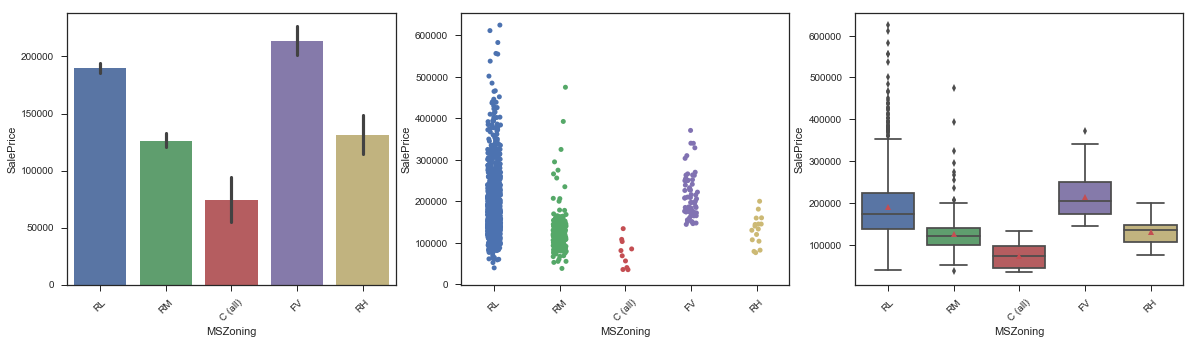

In [173]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.barplot('MSZoning', 'SalePrice', data=train_data)
plt.xticks(rotation=45) # Rotate the x-ticks with 45 degrees

plt.subplot(1, 3, 2)
sns.stripplot('MSZoning', 'SalePrice', data=train_data, size = 5, jitter = True)
plt.xticks(rotation=45) # Rotate the x-ticks with 45 degrees

plt.subplot(1, 3, 3)
sns.boxplot('MSZoning', 'SalePrice', data=train_data, showmeans=True)
plt.xticks(rotation=45); # Rotate the x-ticks with 45 degrees

<div class="alert alert-success">
<span class="label label-success">COMMENT</span><br><br>
The FV (Floating Village Residential) zones have on average the most expensive houses followed by low residential density zones (RL). However, the latter has many outliers that are much more expensive. The commercial zones doesn't have expensive houses, but they don't have many houses as well so we can't generalize in this case.
</div>

<div class="alert alert-info">
Let's see the counts of the number of bedrooms in our data:
</div>

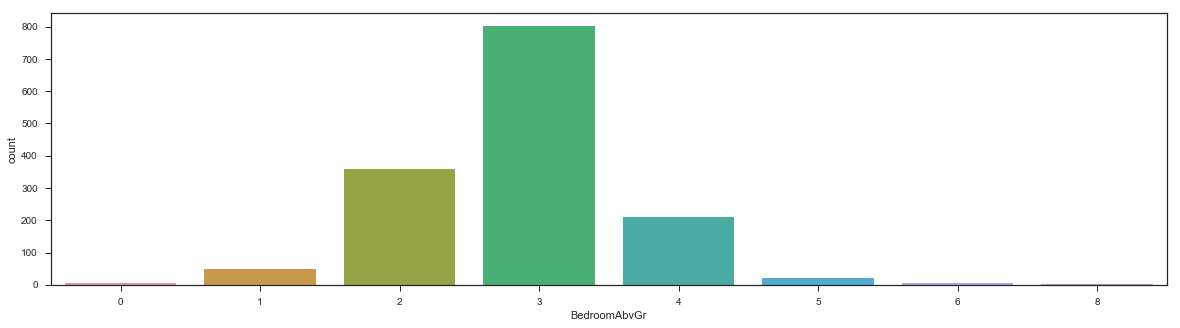

In [174]:
plt.figure(figsize=(20,5)) # The figure size
sns.countplot(x='BedroomAbvGr', data=train_data);

<div class="alert alert-success">
<span class="label label-success">COMMENT</span><br><br>
Most of the houses have $3$ bedrooms. Only few houses have $6$, $8$ or no bedrooms.
</div>

<div class="alert alert-info">
Let's see the relationship between the sale price and the number of bedrooms:
</div>

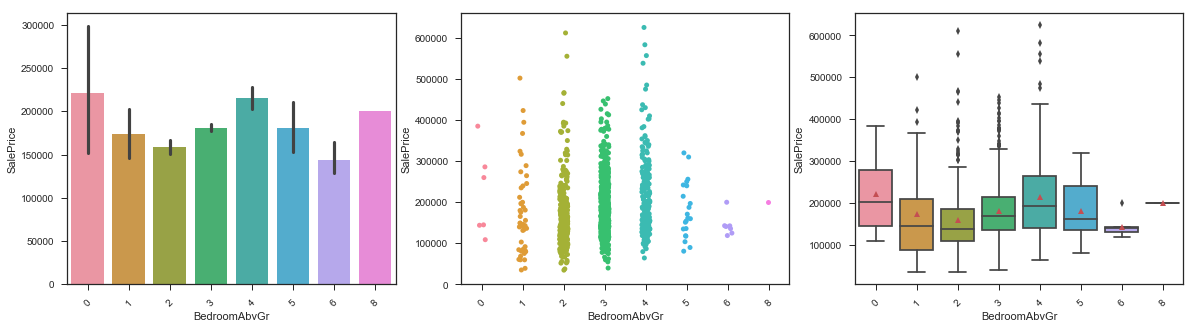

In [175]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.barplot('BedroomAbvGr', 'SalePrice', data=train_data)
plt.xticks(rotation=45) # Rotate the x-ticks with 45 degrees

plt.subplot(1, 3, 2)
sns.stripplot('BedroomAbvGr', 'SalePrice', data=train_data, size = 5, jitter = True)
plt.xticks(rotation=45) # Rotate the x-ticks with 45 degrees

plt.subplot(1, 3, 3)
sns.boxplot('BedroomAbvGr', 'SalePrice', data=train_data, showmeans=True)
plt.xticks(rotation=45); # Rotate the x-ticks with 45 degrees

<div class="alert alert-success">
<span class="label label-success">COMMENT</span><br><br>
It seems that the number of bedrooms doesn't influence much the sale price. Even if we have only $4$ houses with no bedrooms, they are on average the most expensive houses, followed by houses with $4$ bedrooms.
</div>

<div class="alert alert-info">
Kitchens are very important in the house and their quality may affect the sale price. Let's see the first some statistics about the kitchen quality in our data:
</div>

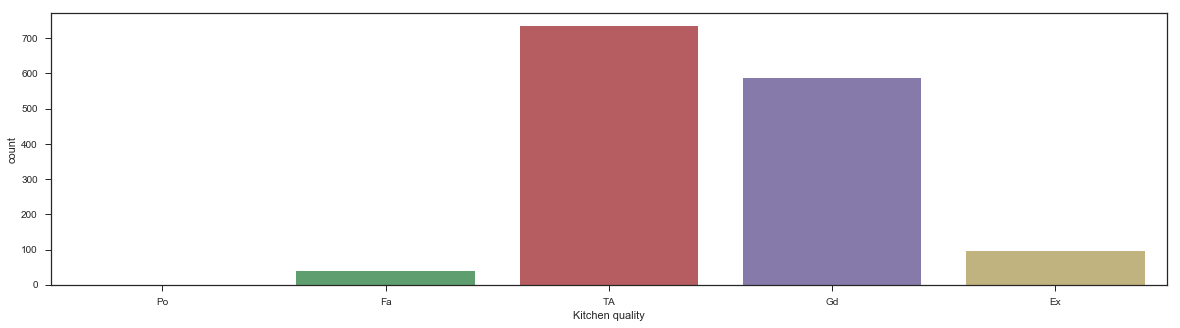

In [176]:
plt.figure(figsize=(20,5)) # The figure size
sns.countplot(x='KitchenQual', data=train_data, order=['Po','Fa','TA','Gd','Ex'])
plt.xlabel('Kitchen quality');

<div class="alert alert-success">
<span class="label label-success">COMMENT</span><br><br>
Most houses have kitchens with an average or good quality. Only few have fair quality and none of the houses have a poor quality.
</div>

<div class="alert alert-info">
Let's see now how does the kitchen quality affects the sale price:
</div>

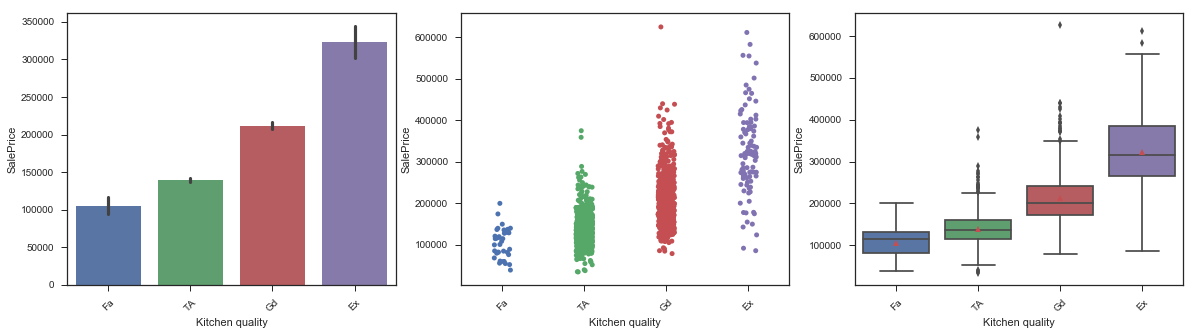

In [177]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.barplot('KitchenQual', 'SalePrice', data=train_data, order=['Fa','TA','Gd','Ex'])
plt.xticks(rotation=45) # Rotate the x-ticks with 45 degrees
plt.xlabel('Kitchen quality');

plt.subplot(1, 3, 2)
sns.stripplot('KitchenQual', 'SalePrice', data=train_data, size = 5, jitter = True, order=['Fa','TA','Gd','Ex'])
plt.xticks(rotation=45) # Rotate the x-ticks with 45 degrees
plt.xlabel('Kitchen quality');

plt.subplot(1, 3, 3)
sns.boxplot('KitchenQual', 'SalePrice', data=train_data, showmeans=True, order=['Fa','TA','Gd','Ex'])
plt.xticks(rotation=45); # Rotate the x-ticks with 45 degrees
plt.xlabel('Kitchen quality');

<div class="alert alert-success">
<span class="label label-success">COMMENT</span><br><br>
As long as we have a better kitchen quality, the sale price of the house will be more expensive. As we can see, excellent kitchen quality increases the sale price. 
</div>

<div class="alert alert-info">
Let's see now if the number of kitchens affects the sale price:
</div>

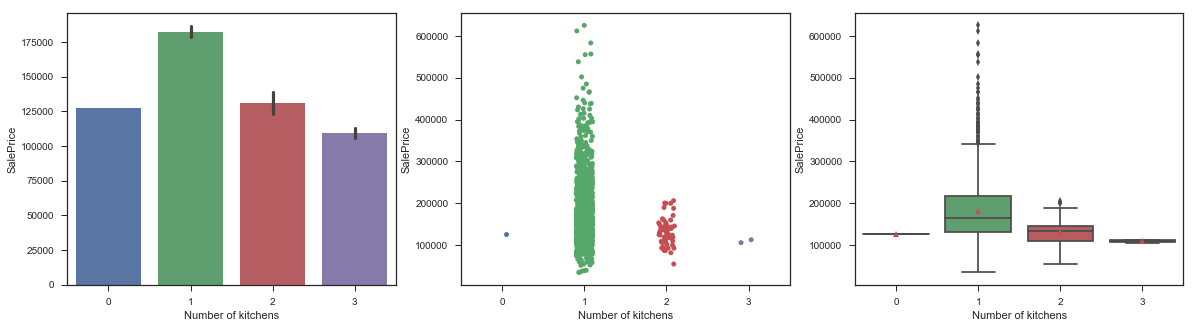

In [178]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.barplot('KitchenAbvGr', 'SalePrice', data=train_data)
plt.xlabel('Number of kitchens');

plt.subplot(1, 3, 2)
sns.stripplot('KitchenAbvGr', 'SalePrice', data=train_data, size = 5, jitter = True)
plt.xlabel('Number of kitchens');

plt.subplot(1, 3, 3)
sns.boxplot('KitchenAbvGr', 'SalePrice', data=train_data, showmeans=True)
plt.xlabel('Number of kitchens');

<div class="alert alert-success">
<span class="label label-success">COMMENT</span><br><br>
Indeed, the number of kitchens affects the sale price but differently. If we have more kitchens, the sale price decreases, this may be due to the carelessness to many kitchens. Houses with only one kitchen are more expensive.
<br><br>
It seems that we have only one house without a kitchen, but what is its quality? because we didn't have a missing value in <i>KitchenQual</i>.
</div>

In [179]:
train_data[train_data.KitchenAbvGr == 0].KitchenQual

954    TA
Name: KitchenQual, dtype: object

<div class="alert alert-success">
The house with no kitchen has a kitchen quality of average. We think that may affect the influence of <i>KitchenQual</i> over the sale price. Let's change it with <i>None</i> and plot again the sale price vs. kitchen quality:
</div>

In [180]:
train_data.loc[train_data[train_data.KitchenAbvGr == 0].index[0],'KitchenQual'] = 'None'

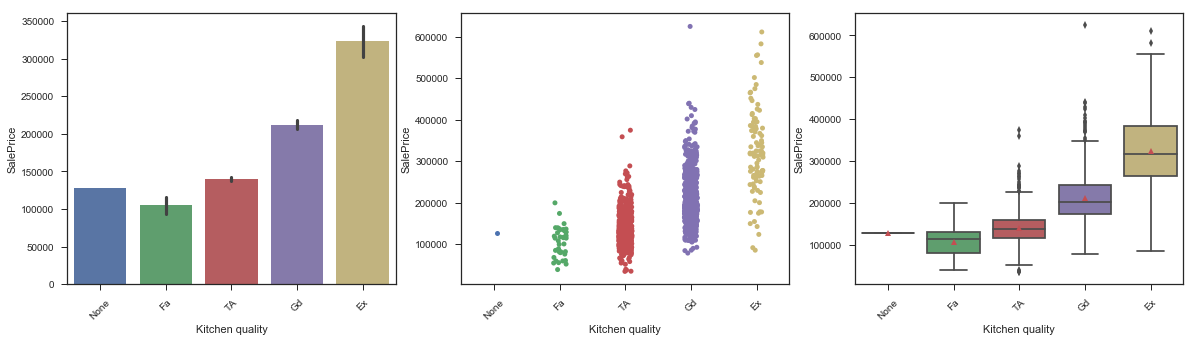

In [181]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.barplot('KitchenQual', 'SalePrice', data=train_data, order=['None', 'Fa','TA','Gd','Ex'])
plt.xticks(rotation=45) # Rotate the x-ticks with 45 degrees
plt.xlabel('Kitchen quality');

plt.subplot(1, 3, 2)
sns.stripplot('KitchenQual', 'SalePrice', data=train_data, size = 5, jitter = True, order=['None', 'Fa','TA','Gd','Ex'])
plt.xticks(rotation=45) # Rotate the x-ticks with 45 degrees
plt.xlabel('Kitchen quality');

plt.subplot(1, 3, 3)
sns.boxplot('KitchenQual', 'SalePrice', data=train_data, showmeans=True, order=['None', 'Fa','TA','Gd','Ex'])
plt.xticks(rotation=45); # Rotate the x-ticks with 45 degrees
plt.xlabel('Kitchen quality');

<div class="alert alert-success">
The house with no kitchen has a higher sale price in average than houses with a fair kitchen quality.
</div>

<div class="alert alert-info">
Let's see now if the presence of a swimming pool affects the sale price:
</div>

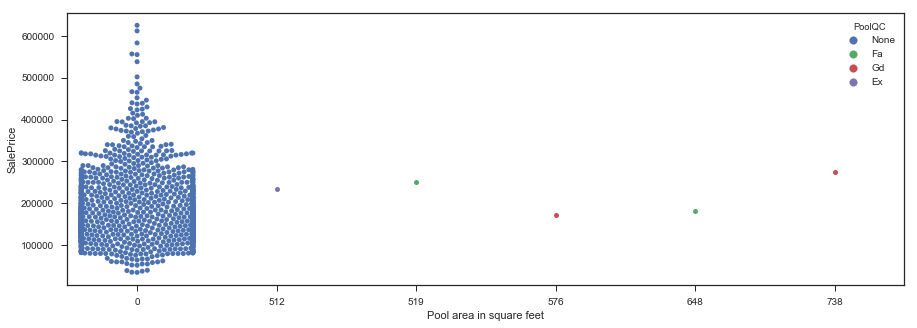

In [182]:
plt.figure(figsize=(15,5))
sns.swarmplot('PoolArea','SalePrice', data=train_data, hue='PoolQC', hue_order=['None', 'Fa','Gd','Ex'])
plt.xlabel('Pool area in square feet');

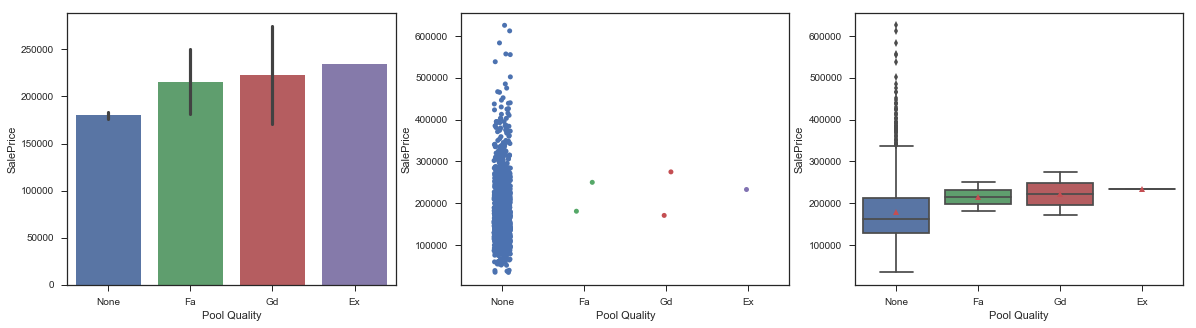

In [183]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.barplot('PoolQC', 'SalePrice', data=train_data, order=['None', 'Fa','Gd','Ex'])
plt.xlabel('Pool Quality');

plt.subplot(1, 3, 2)
sns.stripplot('PoolQC', 'SalePrice', data=train_data, size = 5, jitter = True, order=['None', 'Fa','Gd','Ex'])
plt.xlabel('Pool Quality');

plt.subplot(1, 3, 3)
sns.boxplot('PoolQC', 'SalePrice', data=train_data, showmeans=True, order=['None', 'Fa','Gd','Ex'])
plt.xlabel('Pool Quality');

<div class="alert alert-success">
<span class="label label-success">COMMENT</span><br><br>
We only have 4 houses with a swimming pool, so what we are about to say may not be true in general. Anyway, the presence of the pool doesn't seem to be influencing the sale price. There are many houses without a swimming pool and that are more expensive. For the $4$ houses that have a swimming pool, the pool area doesn't affect the sale price unless they have the same quality. There are factors that are certainly more important than the <i>PoolArea</i> and <i>PoolQC</i>.
</div>

<div class="alert alert-info">
After looking at the weather in Ames city during winter, we can say that it is a very cold city. Let's see some statistics about the heating in the houses of the city:
</div>

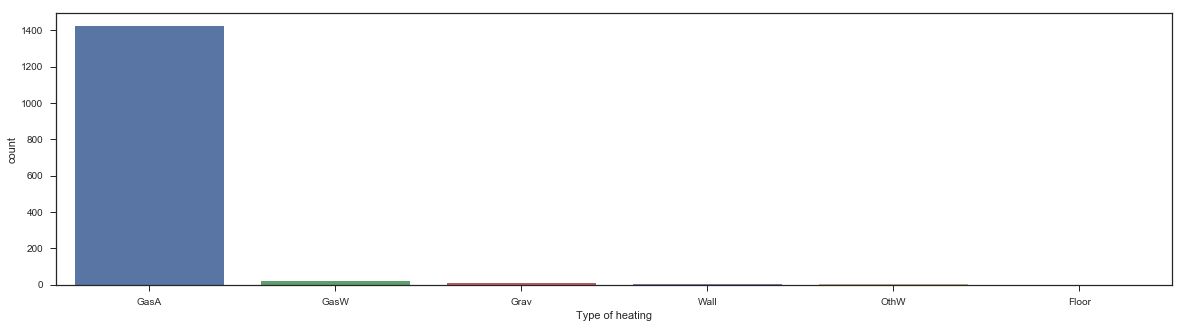

In [184]:
plt.figure(figsize=(20,5)) # The figure size
sns.countplot(x='Heating', data=train_data)
plt.xlabel('Type of heating');

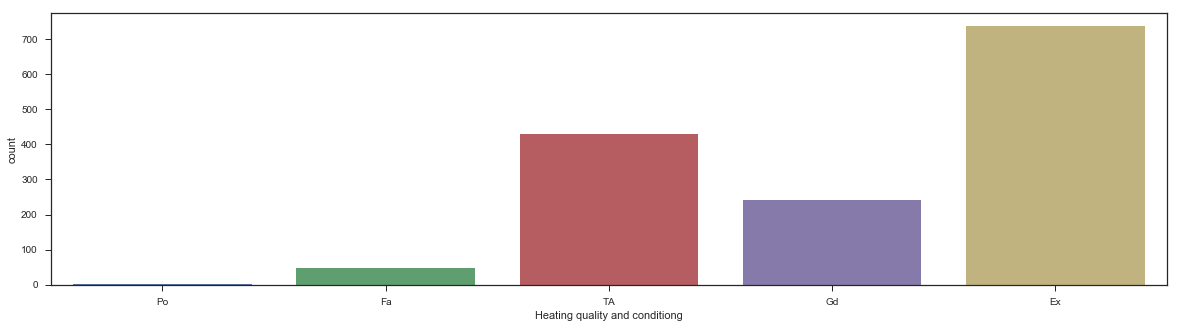

In [185]:
plt.figure(figsize=(20,5)) # The figure size
sns.countplot(x='HeatingQC', data=train_data, order=['Po','Fa','TA','Gd','Ex'])
plt.xlabel('Heating quality and conditiong');

<div class="alert alert-success">
<span class="label label-success">COMMENT</span><br><br>
Almost all houses have GasA (Gas forced warm air furnace) system. Concerning the heating quality, most houses have an excellent heating quality and only very few houses have a fair or poor quality.
</div>

<div class="alert alert-info">
Let's examine the heating quality per neighborhood:
</div>

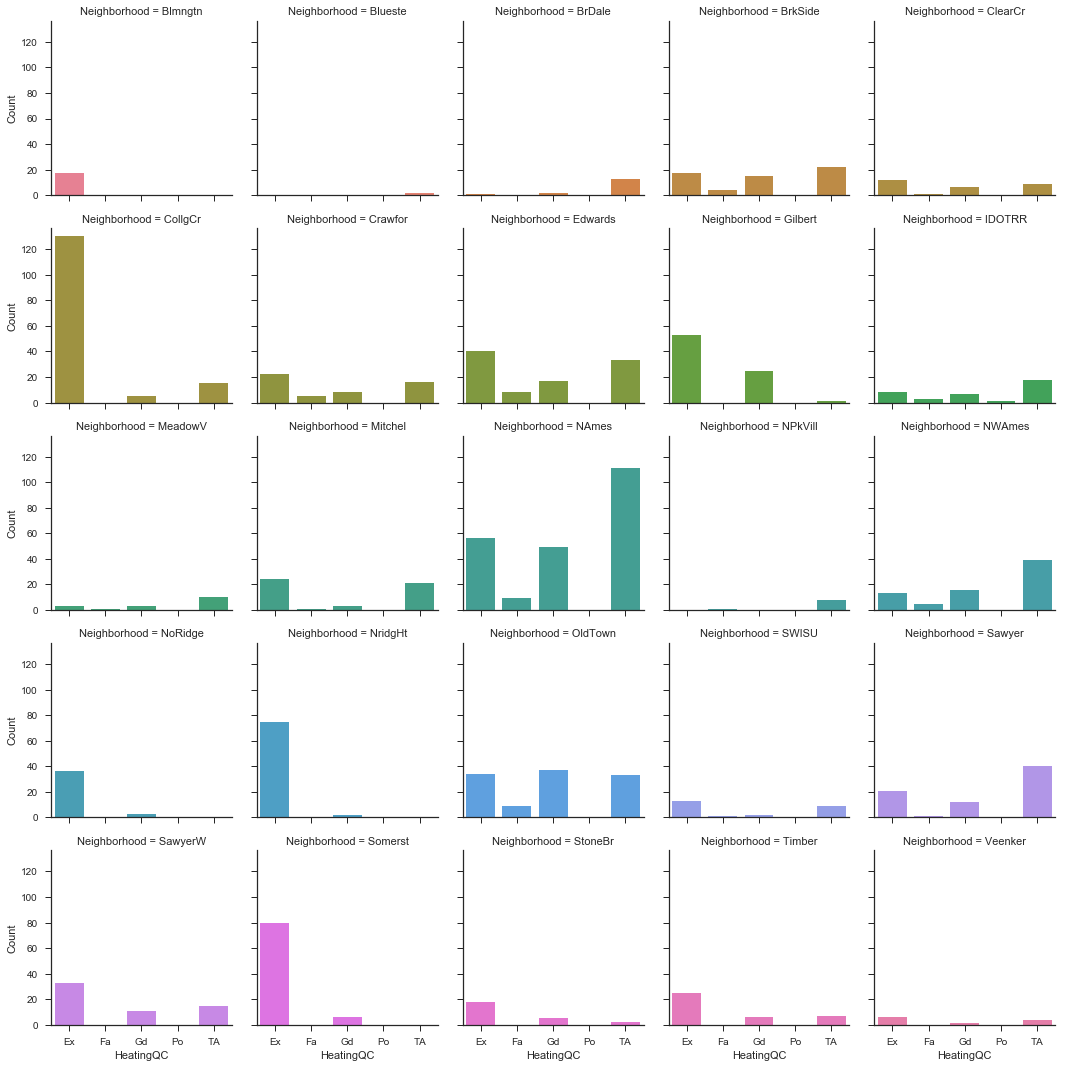

In [186]:
# Transform to a count
count = train_data.groupby(['Neighborhood', 'HeatingQC']).HeatingQC.count()

# Re-create a new array of levels
levels = [count.index.levels[0].values, count.index.levels[1].values]
new_index = pd.MultiIndex.from_product(levels, names=count.index.names)

# Reindex the count and fill empty values with zero (NaN by default)
count = count.reindex(new_index, fill_value=0)

# Construct a panda dataframe
df = pd.DataFrame(count).rename(columns={"HeatingQC": "Count"}).reset_index()

g = sns.FacetGrid(df, col="Neighborhood", col_wrap=5, hue="Neighborhood")
g = g.map(sns.barplot, "HeatingQC", "Count")

<div class="alert alert-success">
<span class="label label-success">COMMENT</span><br><br>
Even if in general, we saw that most houses have an excellent heating quality. Some neighbors have more houses with an average heating quality than houses with excellent heating quality. In all cases, houses with fair or poor heating quality are very few.
</div>

<div class="alert alert-info">
Most of houses has GasA	(Gas forced warm air furnace) heating system. So it's useless to check if the heating system has an influence on the sale price. On the other hand, let's see know if the heating quality affects the sale price:
</div>

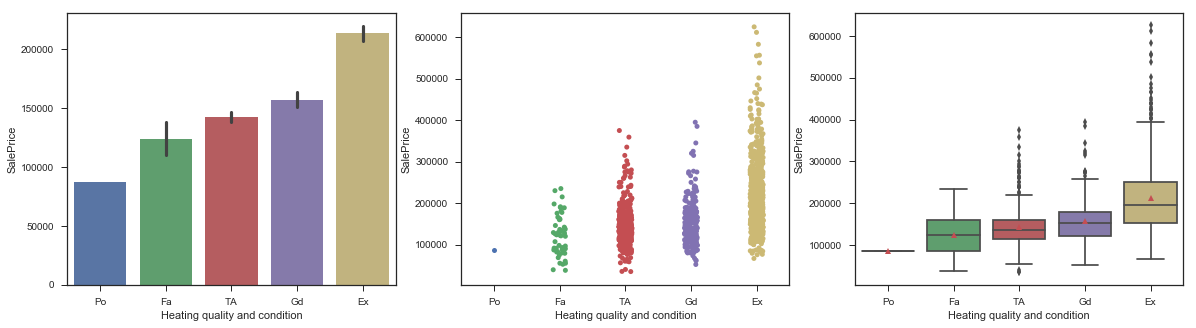

In [187]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.barplot('HeatingQC', 'SalePrice', data=train_data, order=['Po','Fa','TA','Gd','Ex'])
plt.xlabel('Heating quality and condition');

plt.subplot(1, 3, 2)
sns.stripplot('HeatingQC', 'SalePrice', data=train_data, size = 5, jitter = True, order=['Po','Fa','TA','Gd','Ex'])
plt.xlabel('Heating quality and condition');

plt.subplot(1, 3, 3)
sns.boxplot('HeatingQC', 'SalePrice', data=train_data, showmeans=True, order=['Po','Fa','TA','Gd','Ex'])
plt.xlabel('Heating quality and condition');

<div class="alert alert-success">
<span class="label label-success">COMMENT</span><br><br>
Better heating quality implies more expensive houses, especially if the heating quality is excellent.
</div>

<div class="alert alert-info">
Let's see some statistics about the basement using <i>BsmtQual</i> (Evaluates the height of the basement).
<br>
Recall:
<ul>
<li><b>Ex</b>: Excellent (100+ inches)</li>
<li><b>Gd</b>: Good (90-99 inches)</li>
<li><b>TA</b>: Typical (80-89 inches)</li>
<li><b>Fa</b>: Fair (70-79 inches)</li>
<li><b>Po</b>: Poor (< 70 inches)</li>
<li><b>NA</b>: No Basement</li>
</ul>
</div>

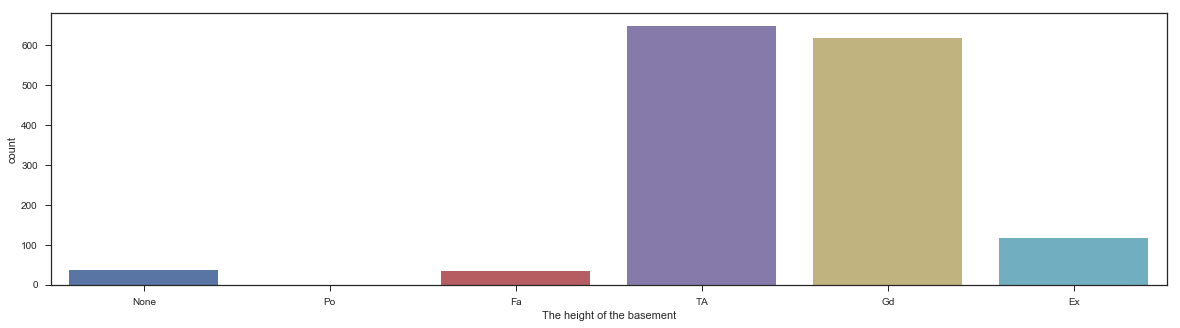

In [188]:
plt.figure(figsize=(20,5)) # The figure size
sns.countplot(x='BsmtQual', data=train_data, order=['None','Po','Fa','TA','Gd','Ex'])
plt.xlabel('The height of the basement');

<div class="alert alert-success">
<span class="label label-success">COMMENT</span><br><br>
Only few houses do not have a basement. Basements are useful to provide more additional storage that can be used as a living space. That's why most houses have a basement. Speaking of its quality, most houses have a basement height between $80$ and $99$ inches. Around $100$ houses have more than $100$ inches in their basement and very few houses that have less than $79$ inches.
</div>

<div class="alert alert-info">
Let's see know the influence over the sale price:
</div>

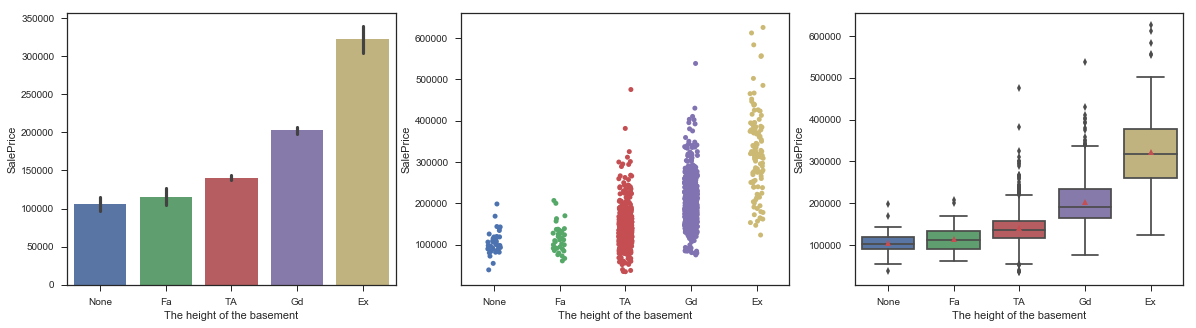

In [189]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.barplot('BsmtQual', 'SalePrice', data=train_data, order=['None','Fa','TA','Gd','Ex'])
plt.xlabel('The height of the basement');

plt.subplot(1, 3, 2)
sns.stripplot('BsmtQual', 'SalePrice', data=train_data, size = 5, jitter = True, order=['None','Fa','TA','Gd','Ex'])
plt.xlabel('The height of the basement');

plt.subplot(1, 3, 3)
sns.boxplot('BsmtQual', 'SalePrice', data=train_data, showmeans=True, order=['None','Fa','TA','Gd','Ex'])
plt.xlabel('The height of the basement');

<div class="alert alert-success">
<span class="label label-success">COMMENT</span><br><br>
Given the importance of basements, the sale price increases if the basement height increases. However, if the basement is small, the house sale price is close to and only a little bit higher than houses without a basement.
</div>

<div class="alert alert-info">
Let's see know if there is a relation between finished/unfinished basement square footage and sale price. We're going to add the two columns <i>BsmtFinSF1</i> (Type 1 finished square feet) and <i>BsmtFinSF2</i> (Type 2 finished square feet) into one column.
</div>

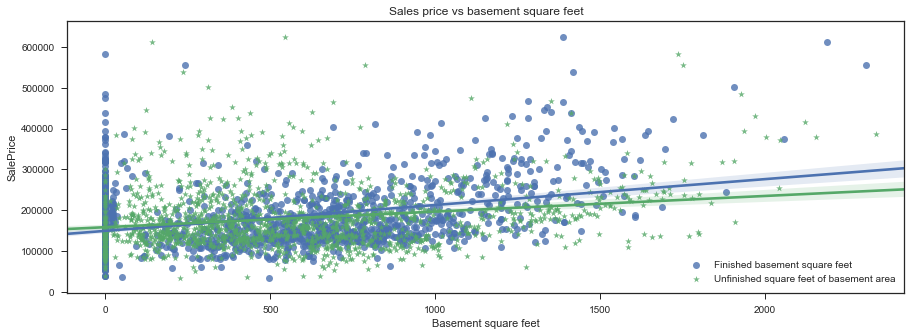

In [190]:
train_data['BsmtFinSF'] = train_data['BsmtFinSF1'] + train_data['BsmtFinSF2']

plt.figure(figsize=(15,5))
sns.regplot(x='BsmtFinSF', y='SalePrice', data=train_data, label="Finished basement square feet")
sns.regplot(x='BsmtUnfSF', y='SalePrice', data=train_data, marker="*", label="Unfinished square feet of basement area")
plt.title('Sales price vs basement square feet')
plt.xlabel('Basement square feet')
plt.legend();

<div class="alert alert-success">
<span class="label label-success">COMMENT</span><br><br>
We can see that the finished basement square feet affects posetively the sale price as well as the unfinished basement square feet, but, the slope of the unfinished basement square feet seem to be lower than the finished basement square feet's.
</div>

<div class="alert alert-info">
Let's see the impact of the existence of a garage on the sale price through the feature <i>GarageArea</i> (Size of garage in square feet).
</div>

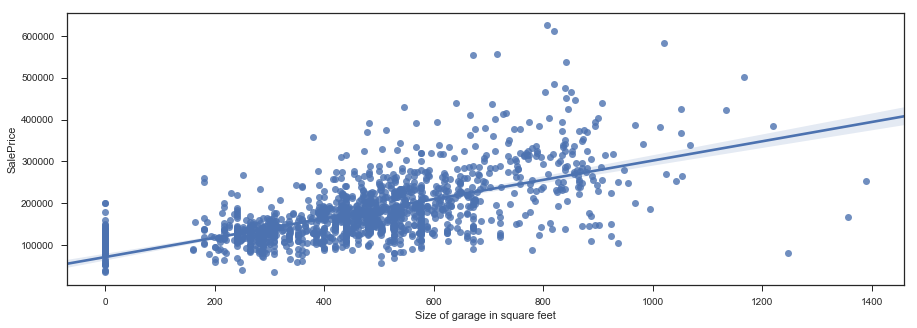

In [191]:
plt.figure(figsize=(15,5))
sns.regplot(x='GarageArea', y='SalePrice', data=train_data)
plt.xlabel('Size of garage in square feet');

<div class="alert alert-success">
<span class="label label-success">COMMENT</span><br><br>

It seems that the sale price increases linearly with the size of garage in square feet.
</div>

<div class="alert alert-info">
What about the year the garage was built. We looked at the year the house was built and we saw that the price increases from $1940$ but we have exceptions before this date. Let's do the same with <i>GarageYrBlt</i>. As we did with <i>YearBuilt</i>, we're going to add a new column grouping each $10$ years of <i>GarageYrBlt</i>.
</div>

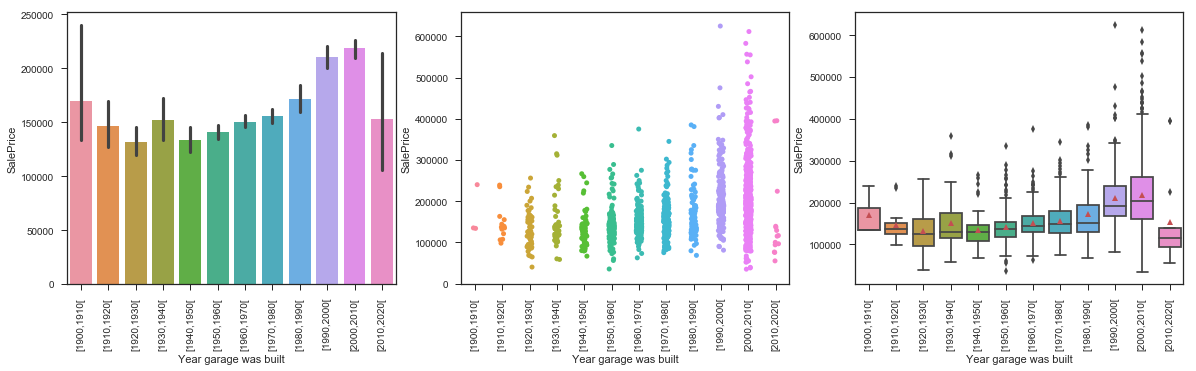

In [192]:
train_data['GarageYrBlt2'] = train_data['GarageYrBlt'].astype(int).apply(lambda x: "[" + str(x - x %10) + "," + str(x - x %10 + 10) + "[")

plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.barplot('GarageYrBlt2', 'SalePrice', data=train_data, order=sorted(train_data['GarageYrBlt2'].unique().tolist()))
plt.xlabel('Year garage was built')
plt.xticks(rotation=90); # Rotate the x-ticks with 90 degrees

plt.subplot(1, 3, 2)
sns.stripplot('GarageYrBlt2', 'SalePrice', data=train_data, size = 5, jitter = True, order=sorted(train_data['GarageYrBlt2'].unique().tolist()))
plt.xlabel('Year garage was built')
plt.xticks(rotation=90); # Rotate the x-ticks with 90 degrees

plt.subplot(1, 3, 3)
sns.boxplot('GarageYrBlt2', 'SalePrice', data=train_data, showmeans=True, order=sorted(train_data['GarageYrBlt2'].unique().tolist()))
plt.xlabel('Year garage was built')
plt.xticks(rotation=90); # Rotate the x-ticks with 90 degrees

<div class="alert alert-success">
<span class="label label-success">COMMENT</span><br><br>

We can see a similar influence over the sale price as we have with <i>YearBuilt</i>. We can see also that houses without a garage (represented by $[0,10[$) are cheaper than the others.
</div>

<div class="alert alert-info">
Normally, the sale price should increase with the interior finish of the garage (<i>Finished</i> - <i>Rough Finished</i> - <i>Unfinished</i> - <i>No Garage</i>). Let's make sure of that to see this ordinal relationship in this categorical feature:
</div>

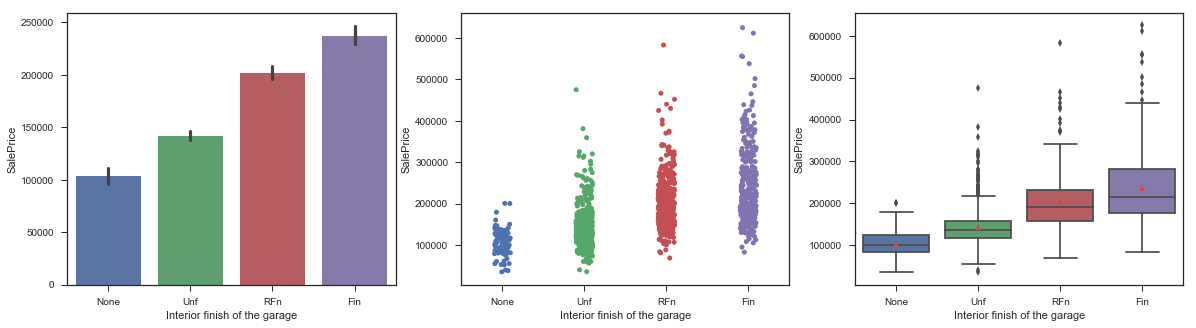

In [193]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.barplot('GarageFinish', 'SalePrice', data=train_data, order=['None','Unf','RFn','Fin'])
plt.xlabel('Interior finish of the garage');

plt.subplot(1, 3, 2)
sns.stripplot('GarageFinish', 'SalePrice', data=train_data, size = 5, jitter = True, order=['None','Unf','RFn','Fin'])
plt.xlabel('Interior finish of the garage');

plt.subplot(1, 3, 3)
sns.boxplot('GarageFinish', 'SalePrice', data=train_data, showmeans=True, order=['None','Unf','RFn','Fin'])
plt.xlabel('Interior finish of the garage');

<div class="alert alert-success">
<span class="label label-success">COMMENT</span><br><br>

Indeed, the sale price increases with the value of interior finish of the garage if we considered ordinal.
</div>

<div class="alert alert-info">
Is the garage quality is very important?
</div>

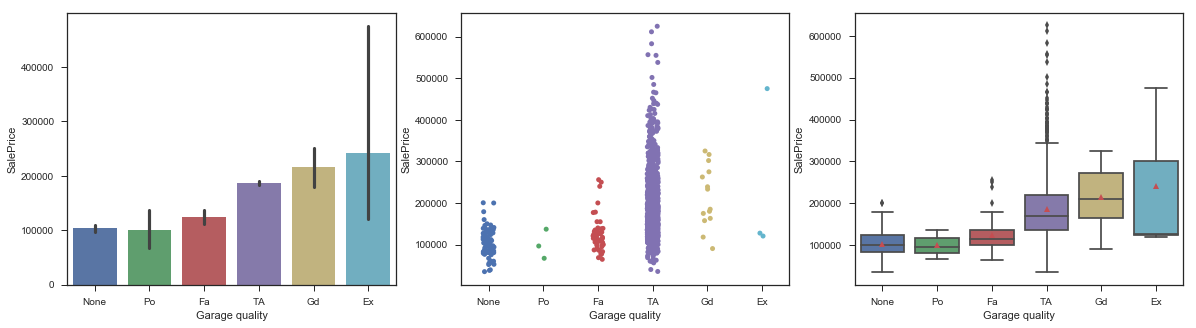

In [194]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.barplot('GarageQual', 'SalePrice', data=train_data, order=['None','Po','Fa','TA','Gd','Ex'])
plt.xlabel('Garage quality');

plt.subplot(1, 3, 2)
sns.stripplot('GarageQual', 'SalePrice', data=train_data, size = 5, jitter = True, order=['None','Po','Fa','TA','Gd','Ex'])
plt.xlabel('Garage quality');

plt.subplot(1, 3, 3)
sns.boxplot('GarageQual', 'SalePrice', data=train_data, showmeans=True, order=['None','Po','Fa','TA','Gd','Ex'])
plt.xlabel('Garage quality');

<div class="alert alert-success">
<span class="label label-success">COMMENT</span><br><br>
With an exception with houses without garage that have a little bit a higher price in average than houses with poor garage quality, the sale price increases with the quality.
</div>

<div class="alert alert-info">
Speaking of quality, let's check the influence of the quality of the material on the exterior:
</div>

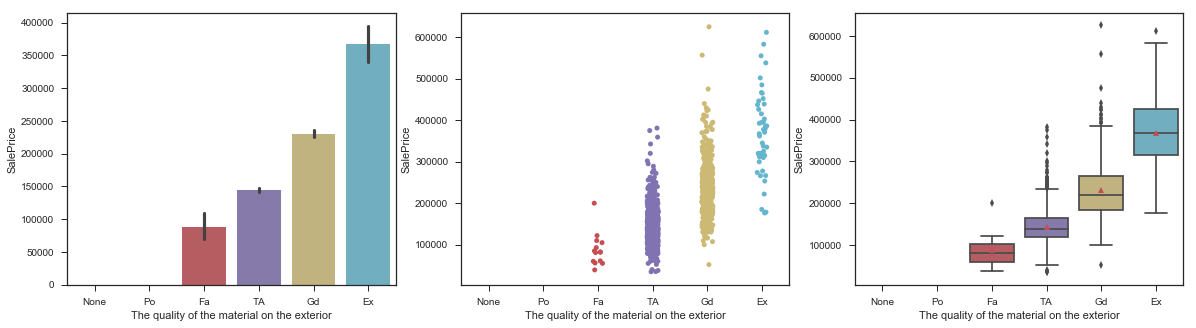

In [195]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.barplot('ExterQual', 'SalePrice', data=train_data, order=['None','Po','Fa','TA','Gd','Ex'])
plt.xlabel('The quality of the material on the exterior');

plt.subplot(1, 3, 2)
sns.stripplot('ExterQual', 'SalePrice', data=train_data, size = 5, jitter = True, order=['None','Po','Fa','TA','Gd','Ex'])
plt.xlabel('The quality of the material on the exterior');

plt.subplot(1, 3, 3)
sns.boxplot('ExterQual', 'SalePrice', data=train_data, showmeans=True, order=['None','Po','Fa','TA','Gd','Ex'])
plt.xlabel('The quality of the material on the exterior');

<div class="alert alert-success">
<span class="label label-success">COMMENT</span><br><br>
The sale price increases with the quality of the material on the exterior and it's very high if the quality is excellent.
</div>

<div class="alert alert-info">
We saw that kitchens were very important in determining the sale price but the number of the bedrooms was not. Let's do the same with the number of bathrooms. We have bathrooms in different places and consequently we're going to gather all the number of bathrooms and sum using the formula: $FullBath \ + \ BsmtFullBath + \frac{HalfBath \ + \ BsmtHalfBath}{2}$. We devided by $2$ for half-baths.
</div>

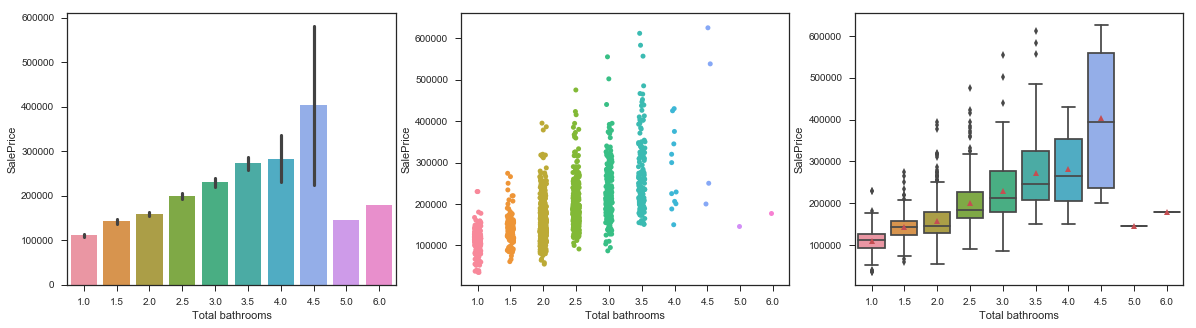

In [196]:
train_data["TotalBath"] = (train_data["FullBath"] + train_data["BsmtFullBath"]) + 0.5 * (train_data["HalfBath"] + train_data["BsmtHalfBath"])

plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.barplot('TotalBath', 'SalePrice', data=train_data)
plt.xlabel('Total bathrooms');

plt.subplot(1, 3, 2)
sns.stripplot('TotalBath', 'SalePrice', data=train_data, size = 5, jitter = True)
plt.xlabel('Total bathrooms');

plt.subplot(1, 3, 3)
sns.boxplot('TotalBath', 'SalePrice', data=train_data, showmeans=True)
plt.xlabel('Total bathrooms');

<div class="alert alert-success">
<span class="label label-success">COMMENT</span><br><br>
Houses with more than $5.0$ total bathrooms are not very important and they are cheaper than the others. The sale price increases with the total bathrooms between $1.0$ and $4.5$ and it is very high for $4.5$ total bathrooms.
</div>

<div class="alert alert-info">
What about the floor square feet?
</div>

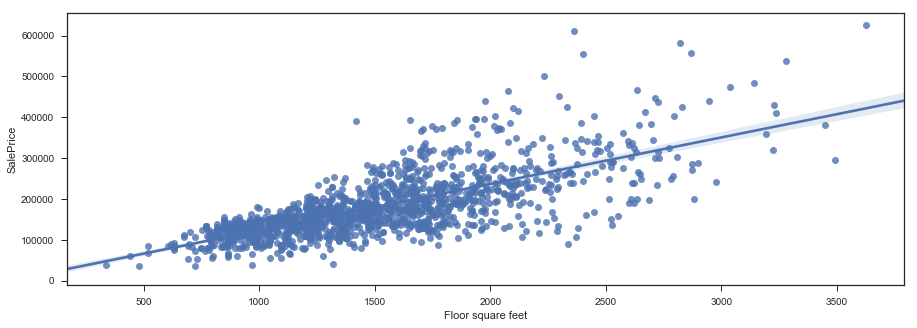

In [197]:
train_data["FlrSF"] = train_data["1stFlrSF"] + train_data["2ndFlrSF"]

plt.figure(figsize=(15,5))
sns.regplot(x='FlrSF', y='SalePrice', data=train_data)
plt.xlabel('Floor square feet');

<div class="alert alert-success">
<span class="label label-success">COMMENT</span><br><br>
There is a positive linear relationship between the sale price and the floor square feet. It seems that it is a very important feature.
</div>

<div class="alert alert-info">
We can also take a look at porches to see what they indicate.
</div>

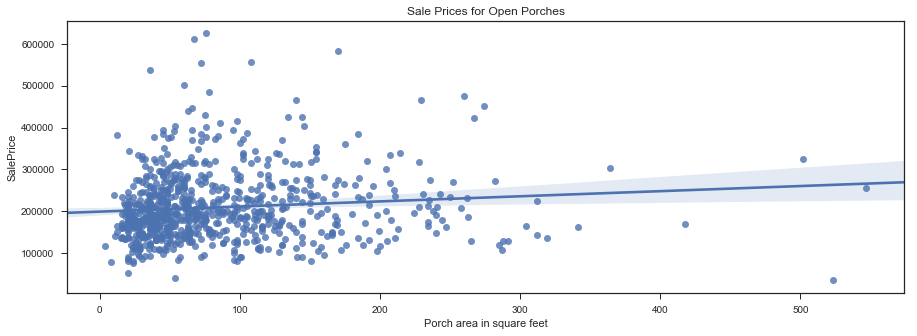

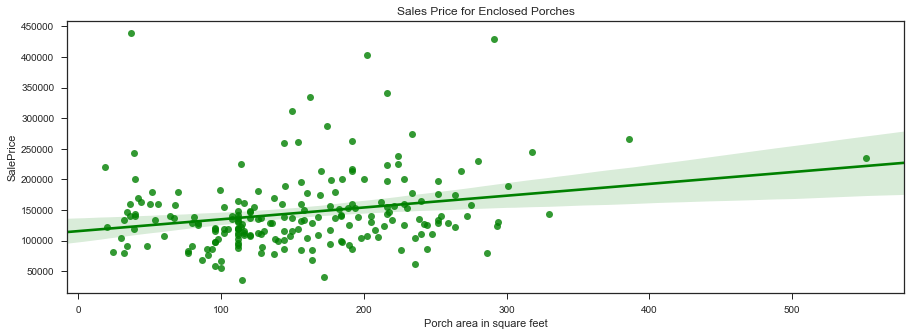

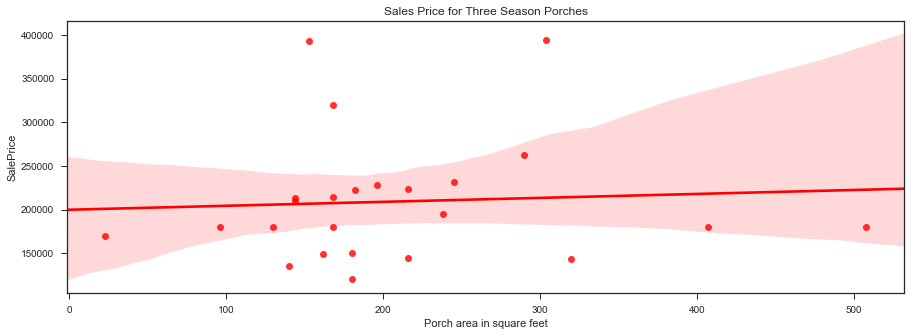

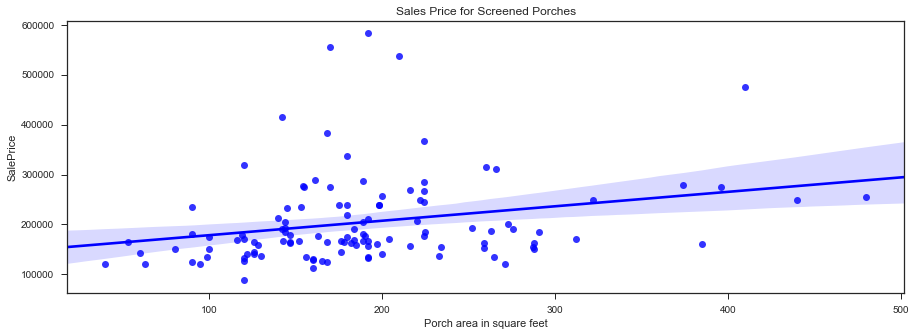

In [198]:
plt.figure(figsize=(15,5))
sns.regplot(x='OpenPorchSF', y='SalePrice', data=train_data[train_data.OpenPorchSF > 0])
plt.title('Sale Prices for Open Porches')
plt.xlabel('Porch area in square feet');

plt.figure(figsize=(15,5))
sns.regplot(x='EnclosedPorch', y='SalePrice', data=train_data[train_data.EnclosedPorch > 0], color='g')
plt.title('Sales Price for Enclosed Porches')
plt.xlabel('Porch area in square feet');

plt.figure(figsize=(15,5))
sns.regplot(x='3SsnPorch', y='SalePrice', data=train_data[train_data['3SsnPorch'] > 0], color='r')
plt.title('Sales Price for Three Season Porches')
plt.xlabel('Porch area in square feet');

plt.figure(figsize=(15,5))
sns.regplot(x='ScreenPorch', y='SalePrice', data=train_data[train_data.ScreenPorch > 0], color='b')
plt.title('Sales Price for Screened Porches')
plt.xlabel('Porch area in square feet');

<div class="alert alert-success">
<span class="label label-success">COMMENT</span><br><br>
For the Open Porches, Enclosed Porches and Screened Porches, they are positively related to the sale price. However, the slope of the regression line for Three Season Porches is negative. We didn't take into account cases when the porch area is $0$ to see clearly the relationship.
</div>

<div class="alert alert-info">
Let's sum this four features into one:
</div>

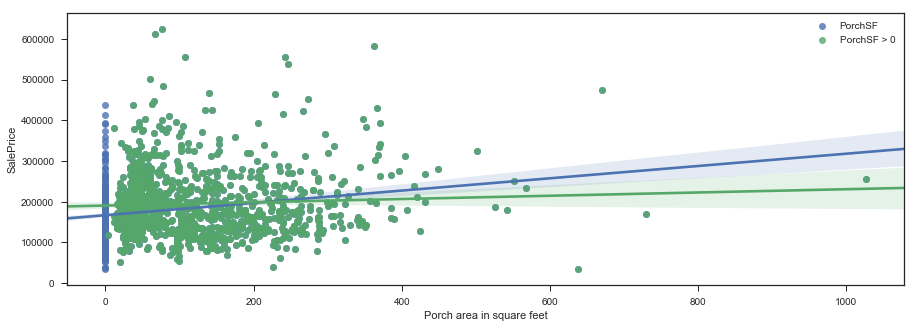

In [199]:
train_data["PorchSF"] = train_data["OpenPorchSF"] + train_data["EnclosedPorch"] + train_data["3SsnPorch"] + train_data["ScreenPorch"]

plt.figure(figsize=(15,5))
sns.regplot(x='PorchSF', y='SalePrice', data=train_data, label='PorchSF', fit_reg=True)
sns.regplot(x='PorchSF', y='SalePrice', data=train_data[train_data.PorchSF > 0], label='PorchSF > 0')
plt.xlabel('Porch area in square feet')
plt.legend();

<div class="alert alert-success">
<span class="label label-success">COMMENT</span><br><br>
If we don't take into account houses with $0$ square feet Porch area. The relationship between the sale price is not very clear (very low slope).
</div>


<div class="alert alert-info">
Let's see the sale condition influence:
</div>

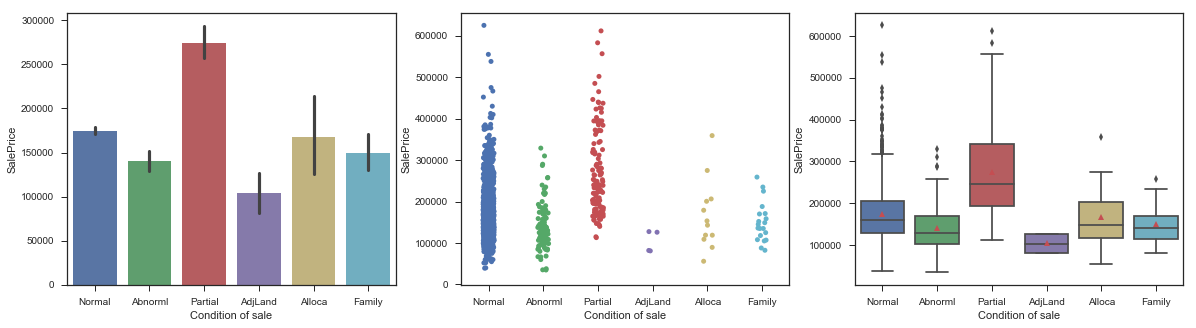

In [200]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.barplot('SaleCondition', 'SalePrice', data=train_data)
plt.xlabel('Condition of sale');

plt.subplot(1, 3, 2)
sns.stripplot('SaleCondition', 'SalePrice', data=train_data, size = 5, jitter = True)
plt.xlabel('Condition of sale');

plt.subplot(1, 3, 3)
sns.boxplot('SaleCondition', 'SalePrice', data=train_data, showmeans=True)
plt.xlabel('Condition of sale');

<div class="alert alert-success">
<span class="label label-success">COMMENT</span><br><br>
The sale price is very high when the condition of sale is partial (Home was not completed when last assessed), followed by the normal conditions. It may be important to create a feature indicating whether the sale condition is partial or not.
</div>

<div class="alert alert-info">
Let's see if there is a relationship between the sale price and the Masonry veneer area in square feet. We're going to see as well the Masonry veneer type.
</div>

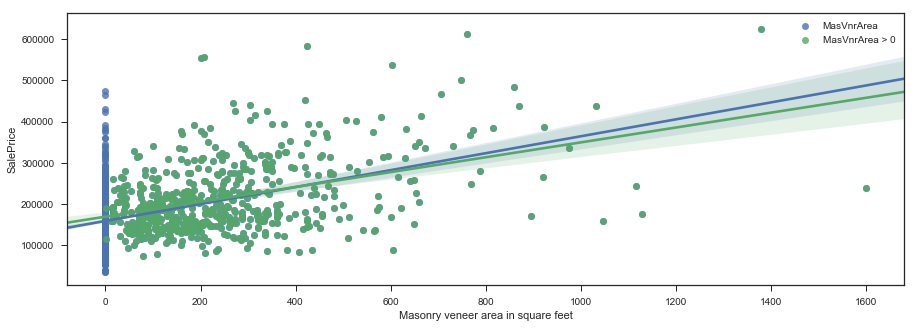

In [201]:
plt.figure(figsize=(15,5))
sns.regplot(x='MasVnrArea', y='SalePrice', data=train_data, label='MasVnrArea')
sns.regplot(x='MasVnrArea', y='SalePrice', data=train_data[train_data.MasVnrArea > 0], label='MasVnrArea > 0')
plt.xlabel('Masonry veneer area in square feet')
plt.legend();

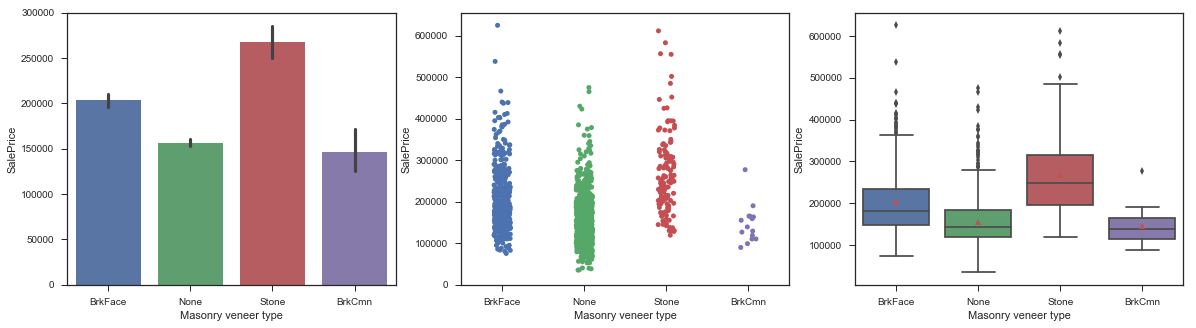

In [202]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.barplot('MasVnrType', 'SalePrice', data=train_data)
plt.xlabel('Masonry veneer type');

plt.subplot(1, 3, 2)
sns.stripplot('MasVnrType', 'SalePrice', data=train_data, size = 5, jitter = True)
plt.xlabel('Masonry veneer type');

plt.subplot(1, 3, 3)
sns.boxplot('MasVnrType', 'SalePrice', data=train_data, showmeans=True)
plt.xlabel('Masonry veneer type');

<div class="alert alert-success">
<span class="label label-success">COMMENT</span><br><br>
There is a positive relationship between the Masonry veneer area and the sales price. In addition, Masonry veneer with Stone is the most expensive followed by Brick Face. Anyway, there is not a big different between Masonry veneer types.
</div>

<div class="alert alert-info">
Which one is more expensive? paved road access to property or Gravel?
</div>

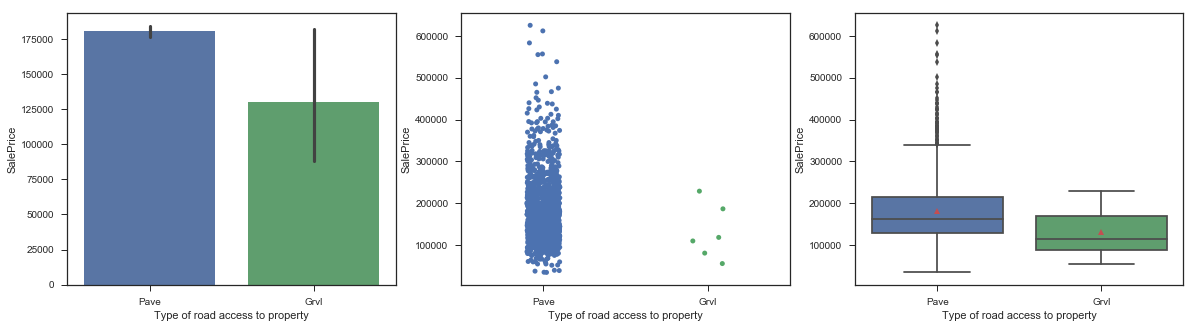

In [203]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.barplot('Street', 'SalePrice', data=train_data)
plt.xlabel('Type of road access to property');

plt.subplot(1, 3, 2)
sns.stripplot('Street', 'SalePrice', data=train_data, size = 5, jitter = True)
plt.xlabel('Type of road access to property');

plt.subplot(1, 3, 3)
sns.boxplot('Street', 'SalePrice', data=train_data, showmeans=True)
plt.xlabel('Type of road access to property');

<div class="alert alert-success">
<span class="label label-success">COMMENT</span><br><br>
Houses with paved road access to property are more expensive.
</div>

<div class="alert alert-info">
How about the alley access?
</div>

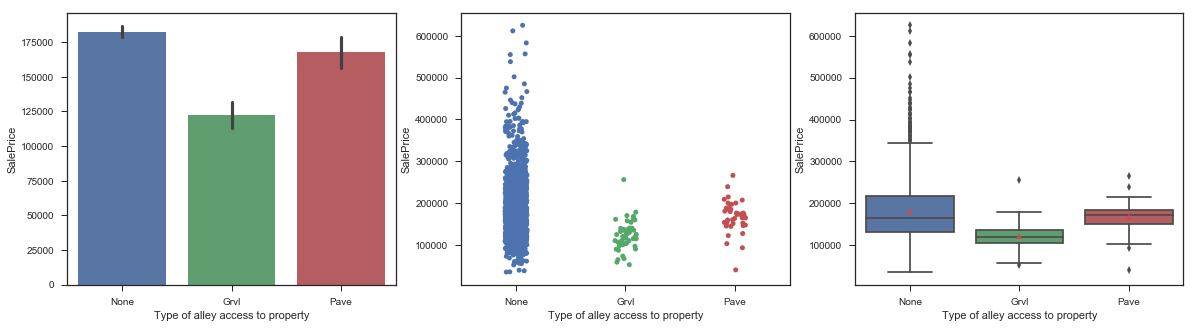

In [204]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.barplot('Alley', 'SalePrice', data=train_data)
plt.xlabel('Type of alley access to property');

plt.subplot(1, 3, 2)
sns.stripplot('Alley', 'SalePrice', data=train_data, size = 5, jitter = True)
plt.xlabel('Type of alley access to property');

plt.subplot(1, 3, 3)
sns.boxplot('Alley', 'SalePrice', data=train_data, showmeans=True)
plt.xlabel('Type of alley access to property');

<div class="alert alert-success">
<span class="label label-success">COMMENT</span><br><br>
Alley seems not to be very important. Houses with no alley access are more important. A good idea might be considering a feature indicating only whether there is an alley access or not:
</div>

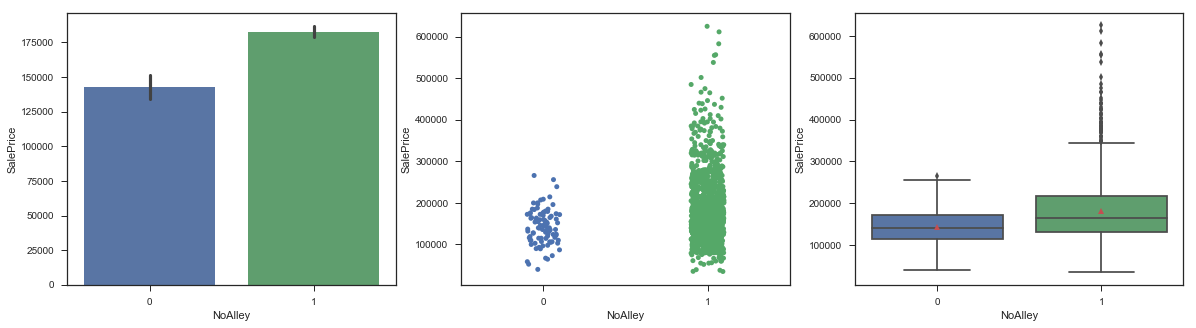

In [205]:
train_data['NoAlley'] = (train_data['Alley'] == 'None') * 1

plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.barplot('NoAlley', 'SalePrice', data=train_data)

plt.subplot(1, 3, 2)
sns.stripplot('NoAlley', 'SalePrice', data=train_data, size = 5, jitter = True)

plt.subplot(1, 3, 3)
sns.boxplot('NoAlley', 'SalePrice', data=train_data, showmeans=True);

<div class="alert alert-success">
<span class="label label-success">COMMENT</span><br><br>
As we saw before, houses with no alley access are more expensive.
</div>

<div class="alert alert-info">
Out of curiosity, let's see the months that have more sold houses than the others.
</div>

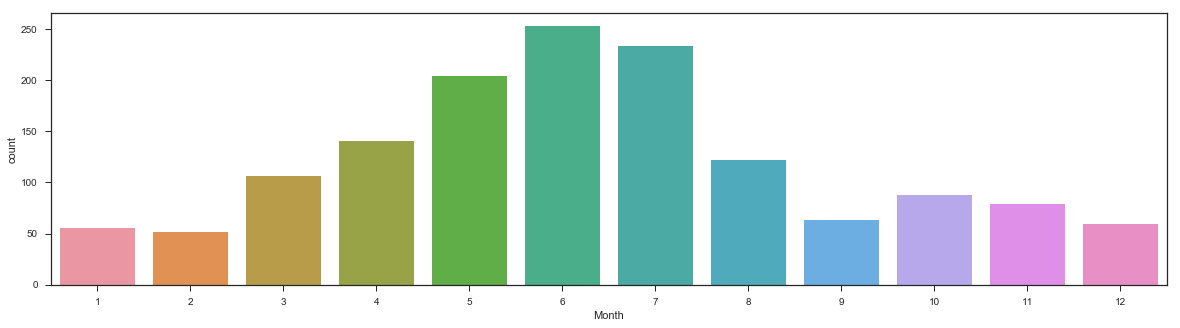

In [206]:
plt.figure(figsize=(20,5)) # The figure size
sns.countplot(x='MoSold', data=train_data)
plt.xlabel('Month');

<div class="alert alert-success">
<span class="label label-success">COMMENT</span><br><br>
Most houses were sold on June or July.
</div>

<div class="alert alert-warning">
<span class="label label-warning">SUMMARY</span><br><br>
We've seen many information about our data that may give us a hint what are the most important factors even though we didn't look at all of them. 
<ul>
<li>We found at the beginning that neighborhoods have an influence over sale price. However, it seemed that there were more important factors that influenced indirectly the sale price through the neighborhood factor such as the age at sell of the house or the remodeling age at sell. Regroupinng neighborhoods into categories may be a good thing to do.
</li>
<li>On the other hand, kitchen quality matters and affects positively the sale price, which means better kitchen quality implies more expensive house.</li>

<li>The presence of basement looked like an important factor and its area or height correlate positively the sale price.</li>

<li>The heating quality seemed to be important given the city cold weather during Winter.</li>
<li>The number of rooms in the house didn't seem to be a very important factor, in other words, more or less rooms will not remarkably change the sale price. The number of bathrooms was a little bit important, total baths of $4.5$ was the most expensive.</li>

<li>We saw other features and suggested some new ones that may be important in our feature engineering part.</li>
</ul><br>


</div>

<div class="alert alert-info">

Before moving to the next part, we're going to re-initialize our train data variable to get the rid of columns we added during our analysis.

</div>

In [207]:
# Construct a dataframe from the training data csv file
train_data = pd.read_csv(path_data + "train.csv")

# Drop ID
train_data.drop(['Id'], axis=1, inplace=True)

# Clean missing values
impute_data(train_data)

# Remove outliers we found before in our training data
train_data.drop(train_data[train_data.GrLivArea > 4000].index, inplace=True)
train_data.loc[train_data[train_data.KitchenAbvGr == 0].index[0],'KitchenQual'] = 'None'

<div class="alert alert-info">
<span class="label label-primary" style="font-size:15px;" id="data_pre-processing">Part 2: Data pre-processing</span><br><br>

<span class="label label-info" style="font-size:12px;" id="target_variable">TARGET VARIABLE</span><br><br>

Machine Learning algorithms work well with features that are <strong>normally distributed</strong>, so we'll focus on <strong>symmetry</strong> and <strong>shape</strong>. Let's see our sale price distribution. 
</div>

Skewness is: 1.5659592925562151
Kurtosis is: 3.8852828233316745


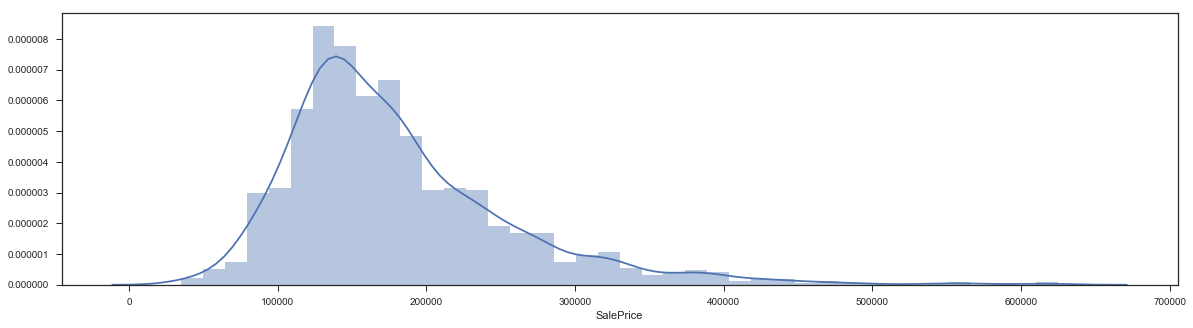

In [208]:
plt.figure(figsize=(20,5))

sns.distplot(train_data['SalePrice'])
print("Skewness is:", train_data['SalePrice'].skew())
print("Kurtosis is:", train_data['SalePrice'].kurt())

<div class="alert alert-success">
<span class="label label-success">COMMENT</span><br><br>

<ul>
<li>Skewness is usually described as a measure of a dataset's symmetry - or lack of symmetry. We have a skewness close to $2$ which means that our training data is highly skewed. This indicates that the size of the right-handed tail (at high prices) is very large than the left-handed tail.</li>

<li>The kurtosis parameter is a measure of the combined weight of the tails relative to the rest of the distribution. The kurtosis is very high ($7.16$) which means that we have a <i>Leptokurtic</i> distribution characterizing the heavy tails compared to the normal distribution's tails.</li>

</ul>

</div>

<div class="alert alert-info">
In order to solve the skewness problem, we're going to log transform our sale price because it tends to expand the values which fall in the range of lower magnitudes and tends to compress or reduce the values which fall in the range of higher magnitudes. Besides making the distribution more symmetric, working with the log of the sale price will also ensure that relative errors for cheaper and more expensive homes are treated on an equal footing.
</div>

Skewness is: 0.0654600691102582
Kurtosis is: 0.6664227710334414


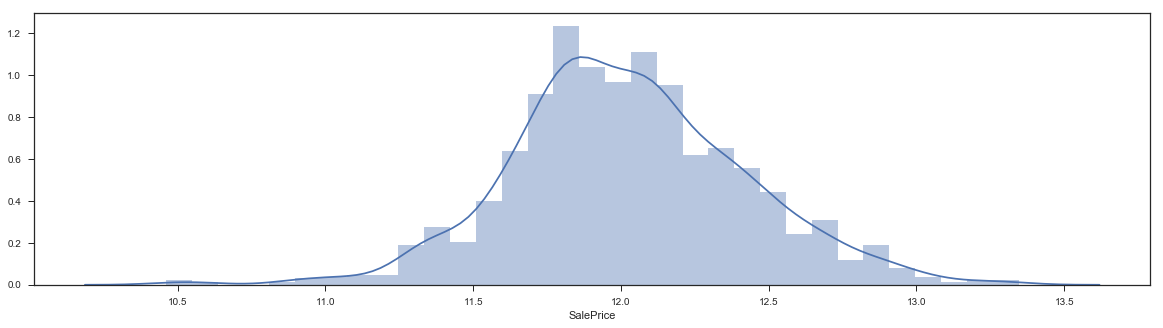

In [209]:
train_data['SalePrice'] = np.log1p(train_data['SalePrice'])

plt.figure(figsize=(20,5))

sns.distplot(train_data['SalePrice'])
print("Skewness is:", train_data['SalePrice'].skew())
print("Kurtosis is:", train_data['SalePrice'].kurt())

<div class="alert alert-success">
Based on the above plot, we can clearly see that the distribution is more normal-like or gaussian as compared to the skewed distribution on the original data.
</div>

<div class="alert alert-info" id="data_type">
<span class="label label-info" style="font-size:12px;">DATA TYPE</span><br><br>


Our data contain:

<br>
<ul>

<li><b><i>Numerical/Quantitative</i></b> features: <b><i>discrete</i></b> features that are items that can be counted as distinct and separate and can only take particular values - <b><i>continuous</i></b> features representing measurements (they may take any value within a finite or infinite interval).</li>

<li><b><i>Categorical</i> features</b> representing characteristics of the data. Some of our categorical features are represented by integers, for instance, <i>OverallQual</i> (Rates the overall material and finish of the house) whose values vary from $1$ for <i>Very Poor</i> to $10$ for <i>Very Excellent</i>; others are represented by strings. Therefore, categorical features are divided into two types: <b><i>Ordinal</i></b> features mixes numerical and categorical features (when the categories may be ordered), and <b><i>Nominal</i></b> features which are labeled without any quantitative value.

</ul>
<br>
Let's see first some numbers about our features:

</div>

In [210]:
def get_numerical_nominal(df):
    numerical_ordinal_feautures = df.select_dtypes(include=['number']).columns.tolist()
    nominal_feautures = df.select_dtypes(exclude=['number']).columns.tolist()
    
    print("Number of features:", df.shape[1])
    print("Number of numerical (discrete and continuous) and ordinal features:", len(numerical_ordinal_feautures))
    print("Number of nominal features:", len(nominal_feautures))
    
    return numerical_ordinal_feautures, nominal_feautures

get_numerical_nominal(train_data);

Number of features: 79
Number of numerical (discrete and continuous) and ordinal features: 37
Number of nominal features: 42


<div class="alert alert-info">
<span class="label label-info" id="feature_engineering" style="font-size:12px;">FEATURE ENGINEERING</span><br><br>

On the other hand, Machine learning algorithms cannot work in general with <i>nominal</i> features. We need to transfer them to ordinal features. In addition, we think about adding new features that we think may be more useful than some of the ones we have. This is what this part is about. 

<br><br>

Let's replace our nominal features that have an order relationship between their values with ordinal encoding: we simply assign a number to each possible value a feature can take. We'll deal with the other nominal features that cannot be ordinal by creating extra columns indicating the presence or absence of a category with certain values. Let's start first with the our ordinal encoding, the strategy of replacement is simple, let's take an example: for the features indicating quality, we're going to replace <i>Poor $->$ Excellent</i> respectively by $1 -> 5$, the non-existence of a feature (example: no garage) is going to be replaced by 1.

</div>

In [211]:
def replace_nominal(df):
    # 1 indicates if the street is paved and 0 if it is not.
    df['Street'] = (df['Street'] == 'Pave') * 1
    
    # 2 indicates if the alley is paved and 1 if it is not. 0 if there is no alley access.
    street_alley_dict = {'None': 0, 'Grvl': 1, 'Pave': 2}
    df['Alley'].replace(street_alley_dict, inplace=True)
    
    # (Reg = Regular) - (IR1 = Slightly irregular) - (IR2 = Moderately Irregular) - (IR3 = Irregular)
    lotshape_dict = {'IR3' : 1, 'IR2' : 2, 'IR1' : 3, 'Reg' : 4}
    df['LotShape'].replace(lotshape_dict, inplace=True)
    
    # (Gtl = Gentle slope) - (Mod = Moderate Slope) -  (Sev = Severe Slope)
    landslope_dict = {'Sev' : 1, 'Mod' : 2, 'Gtl' : 3}
    df['LandSlope'].replace(landslope_dict, inplace=True)

    # (Ex = Excellent) - (Gd = Good) - (TA = Average/Typical) - (Fa = Fair )- (Po = Poor)
    qual_dict = {'None': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
    qual_columns = [
        'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
        'GarageCond', 'HeatingQC', 'KitchenQual', 'FireplaceQu',
        'GarageQual', 'PoolQC'
    ]

    df[qual_columns] = df[qual_columns].replace(qual_dict)

    # Good > Average > Minimum > No exposure
    exposure_dict = {'None': 0, 'No': 0, 'Mn': 1, 'Av': 2, 'Gd': 3}
    df['BsmtExposure'].replace(exposure_dict, inplace=True)
       
    # (GLQ = Good Living Quarters) - (ALQ = Average Living Quarters) - (BLQ = Below Average Living Quarters)
    # (Rec = Average Rec Room) - (LwQ = Low Quality) - (Unf = Unfinshed) - (None = No Basement)
    bsmtfintype_dict = {'None': 0, 'No': 0, 'Unf' : 1, 'LwQ': 2,
                        'Rec' : 3, 'BLQ' : 4, 'ALQ' : 5, 'GLQ' : 6}
    df[['BsmtFinType1', 'BsmtFinType2']] = df[['BsmtFinType1', 'BsmtFinType2']].replace(bsmtfintype_dict)

    bool_dict = {'N': 0, 'Y': 1}
    df['CentralAir'].replace(bool_dict, inplace=True)

    # (Fin = Finished) - (RFn = Rough Finished) - (Unf = Unfinished)
    finished_dict = {'None': -0.5, 'Unf': 0., 'RFn': 0.5, 'Fin': 1.}
    df['GarageFinish'].replace(finished_dict, inplace=True)

    paved_dict = {'N': 0., 'P': 0.5, 'Y': 1.}
    df['PavedDrive'].replace(paved_dict, inplace=True)

    functional_dict = {'Sal' : 1, 'Sev' : 2, 'Maj2' : 3, 'Maj1' : 4,
                       'Mod': 5, 'Min2' : 6, 'Min1' : 7, 'Typ' : 8}
    df['Functional'].replace(functional_dict, inplace=True)

In [212]:
replace_nominal(train_data)

<div class="alert alert-success">
<span class="label label-success">COMMENT</span><br><br>
Mapping the levels of an ordinal variable to consecutive numbers, as we have done above, is good in keeping the order relationship between values. However, it may be misleading, for example, with the feature <i>LotShape</i>, the difference between regular and slightly irregular may not be the same as the difference between the latter and moderately irregular and so on. Anyway, we believe that this approach is going to work quite well, especially with our model that have some non-linearity as we're going to see later.
</div>

<div class="alert alert-info">
There are ordinal features that are actually nominal features in disguise. This is the case, for example, with <i>MSSubClass</i> that is ordinal but represent different housing categories that have no ordinal relationship between them. Let's replace <i>MSSubClass</i> and <i>MoSold</i>.
</div>

In [213]:
def replace_ordinal(df):
    MSSubClass_dict = {
        20 : "MSSC20", 30 : "MSSC30", 40 : "MSSC40", 45 : "MSSC45",
        50 : "MSSC50", 60 : "MSSC60", 70 : "MSSC70", 75 : "MSSC75",
        80 : "MSSC80", 85 : "MSSC85", 90 : "MSSC90", 120 : "MSSC120",
        150 : "MSSC150", 160 : "MSSC160", 180 : "MSSC180", 190 : "MSSC190"
    }
    df['MSSubClass'].replace(MSSubClass_dict, inplace=True)
    
    month_dict = {
        1 : "Jan", 2 : "Feb", 3 : "Mar", 4 : "Apr", 5 : "May", 6 : "Jun",
        7 : "Jul", 8 : "Aug", 9 : "Sep", 10 : "Oct", 11 : "Nov", 12 : "Dec"
    }
    df['MoSold'].replace(month_dict, inplace=True)

In [214]:
replace_ordinal(train_data)

<div class="alert alert-info">
We're going to add features and do some replacements that we think can be more useful:

<ul>
<li><i>TotalBath</i> is going to be added to count the total number of baths in the house by considering the bathrooms in the basement and also the half baths that are going to be multiplied by $0.5$ before addiion.</li>
<li><i>TotalSF</i> for the total square feet of the floors and the basement. The same with <i>PorchSF</i></li>
<li>We're going to create some features indicating the presence of a category.</li>

<li>We're going to drop the features <i>YrSold</i>, <i>GarageYrBlt</i>, <i>YearBuilt</i> and <i>YearRemodAdd</i> and replace them by two better representative features: <i>AgeAtSell</i> indicating the age at sell of the house, <i>RemodelingAgeAtSell</i> indicating the remodeling age and <i>GarageAgeAtSell</i> indicating the garage age at sell.</li>
</ul>
</div>

In [215]:
def add_features(df):
    
    df['AgeAtSell'] = np.abs(df['YrSold'] - df['YearBuilt'])
    df['RemodelingAgeAtSell'] = np.abs(df['YrSold'] - df['YearRemodAdd'])
    df['GarageAgeAtSell'] = np.abs(df['YrSold'] - df['GarageYrBlt'])
    
    df.drop(['YrSold', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt'], axis=1, inplace=True)
    
    df["TotalBath"] = (df["FullBath"] + df["BsmtFullBath"]) + 0.5 * (df["HalfBath"] + df["BsmtHalfBath"])
    df.drop(["FullBath", "BsmtFullBath", "HalfBath", "BsmtHalfBath"], axis=1, inplace=True)
    
    df["TotalSF"] = df["TotalBsmtSF"] + df["1stFlrSF"] + df["2ndFlrSF"]
    df.drop(["TotalBsmtSF", "1stFlrSF", "2ndFlrSF"], axis=1, inplace=True)
    
    df["PorchSF"] = df["OpenPorchSF"] + df["EnclosedPorch"] + df["3SsnPorch"] + df["ScreenPorch"]
    df.drop(["OpenPorchSF", "EnclosedPorch", "3SsnPorch", "ScreenPorch"], axis=1, inplace=True)
    
    df["BsmtFinSF"] = df["BsmtFinSF1"] + df["BsmtFinSF2"]
    df.drop(["BsmtFinSF1", "BsmtFinSF2"], axis=1, inplace=True)

In [216]:
add_features(train_data)

<div class="alert alert-info">
Let's get a new list of numerical/ordinal features and nominal features in order to make feature selection easier.
</div>

In [217]:
# Sub-categories
numerical_ordinal_features, nominal_features = get_numerical_nominal(train_data)

ordinal_features = ['Street', 'Alley', 'LotShape', 'LandSlope', 'OverallQual', 'OverallCond',
                    'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
                    'BsmtFinType2', 'HeatingQC', 'CentralAir', 'KitchenQual', 'Functional', 'FireplaceQu', 
                    'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'AgeAtSell', 
                    'RemodelingAgeAtSell', 'GarageAgeAtSell'
                   ]


# Big categories
categorical_features = ordinal_features + nominal_features
numerical_features = list(set(numerical_ordinal_features).difference(set(ordinal_features)))


print("Number of categorical features:", len(categorical_features))
print("Number of numerical features:", len(numerical_features))

Number of features: 69
Number of numerical (discrete and continuous) and ordinal features: 46
Number of nominal features: 23
Number of categorical features: 49
Number of numerical features: 20


<div class="alert alert-info">
<span class="label label-info" id="skewed_features" style="font-size:12px;">SKEWED FEATURES</span><br><br>

We discussed before that machine learning algorithms work well with non-skewed features. In addition, transforming skewed features helps to create generalized predictions and avoid focusing on extreme values.

</div>

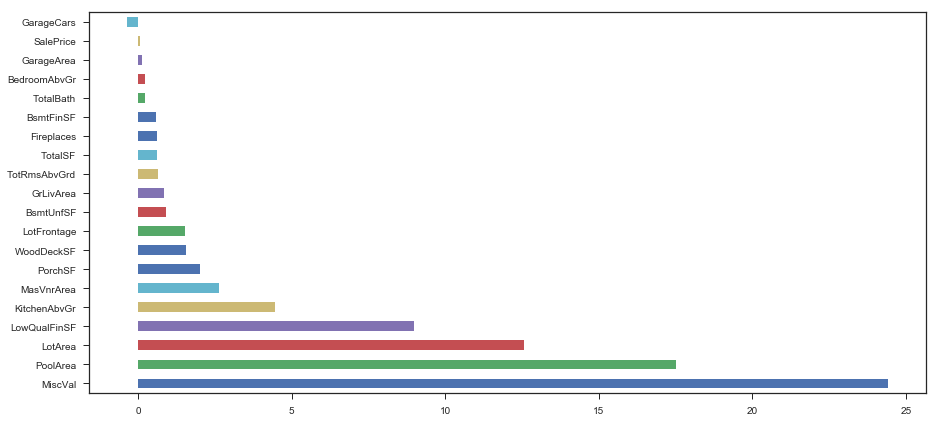

In [218]:
skewed_feats = train_data[numerical_features].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)

skewed_feats.plot(kind='barh', figsize=(15, 7));

<div class="alert alert-info">

<p>We're going to transform features with skewness higher than $0.5$ using Box-Cox transformation:</p>

<br>

<p style="text-align:center">
${\displaystyle y_{i}^{(\lambda )}={\begin{cases}{\dfrac {y_{i}^{\lambda }-1}{\lambda }}&{\text{if }}\lambda \neq 0,\\[8pt]\ln {(y_{i})}&{\text{if }}\lambda =0,\end{cases}}}$
</p>


</div>

In [219]:
skewness = skewed_feats[abs(skewed_feats) > 0.5]

lam = 0.15

if (apply_boxcox):
    train_data[skewness.index] = boxcox1p(train_data[skewness.index], lam)
    print(skewness.shape[0],  "skewed numerical features have been Box-Cox transformed")
else:
    print("Box-Cox disabled")

15 skewed numerical features have been Box-Cox transformed


<div class="alert alert-info">
<span class="label label-info" id="correlation" style="font-size:12px;">CORRELATION</span><br><br>

Let's see the correlation between our factors. We're going to use two types of correlatiton depending on the nature of our features.

<br>

The first one is <strong>Pearson Correlation</strong>. Pearson correlation measures the linear association between <strong>continuous variables</strong> In other words, this coefficient quantifies the degree to which a relationship between two variables can be described by a line. The resulting value lies in $[-1, 1]$, with $-1$ meaning perfect negative correlation (as one variable increases, the other decreases), $+1$ meaning perfect positive correlation and $0$ meaning no linear correlation between the two variables.

</div>

In [220]:
df = train_data[numerical_features] # Our training data with only the numerical data

method = 'pearson'
df.corr(method=method).style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

<div class="alert alert-info">

Let's use a heatmap for a better visualization of this table.
</div>

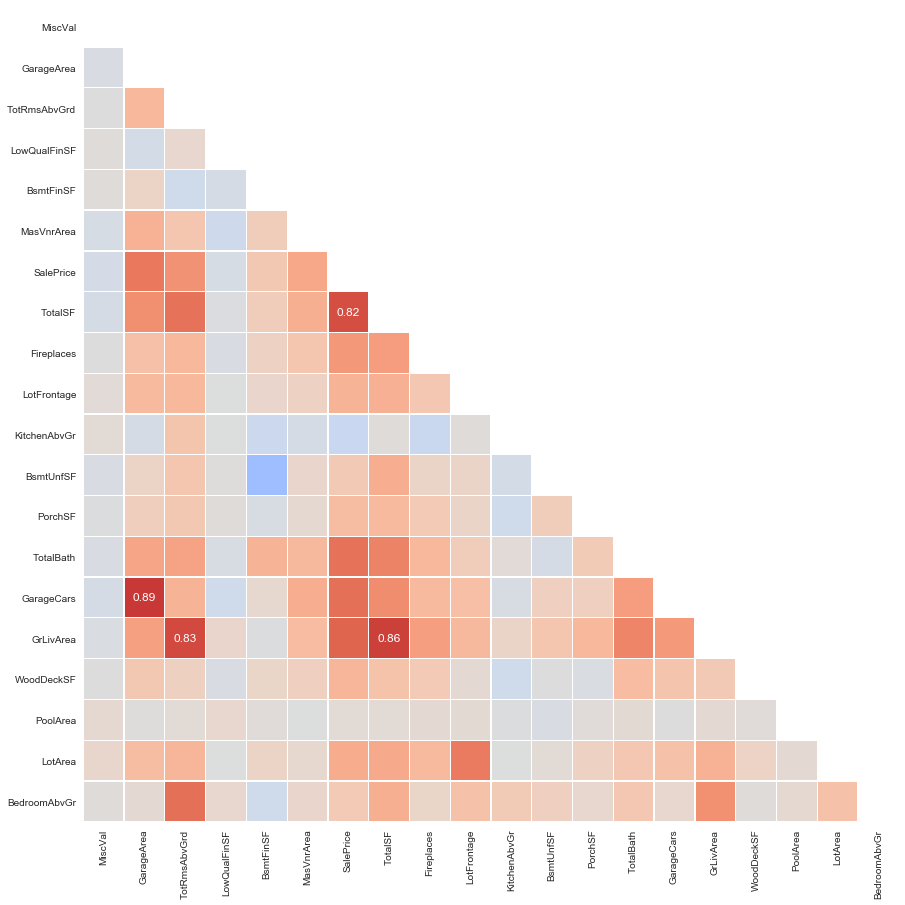

In [221]:
corr_pearson = df.corr(method)
mask = np.zeros_like(corr_pearson)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(15,15))
with sns.axes_style("white"):
    ax0 = sns.heatmap(corr_pearson, mask=mask, vmin=-1., vmax=1.,
                square=True, cmap=plt.get_cmap('coolwarm'), 
                linewidths=0.3, annot=True, cbar=False)
    
    for text in ax0.texts:
        t = float(text.get_text())
        if (abs(t) < 0.8):
            text.set_text('')
        else:
            text.set_text(round(t, 4))

<div class="alert alert-success">
<span class="label label-success">COMMENT</span><br><br>

We can see some strong correlation between some features that is represented by dark colors:
<br>
<ul>

<li><i>GrLivArea</i> and <i>TotalSF</i> have a correlation of $\simeq 0.86$. We can get one of them by putting the other one in a linear relation. Therefore, keeping only one of them is enough.</li>
<li>We can say the same for <i>TotRmsAbvGrd</i> and <i>GrLivArea</i> that have a correlation of $\simeq 0.83$, <i>GarageArea</i> and <i>GarageCars</i> that have a correlation of $\simeq 0.89$.</li>

</ul>

</div>

<div class="alert alert-info">

There is another way to interpret Pearson correlation by using the coefficient of determination $R^2$. The correlation is unitless but its square is interpreted at the proportion of variance of one feature explained by another.
</div>

In [222]:
def R2_print(corr, feature1, feature2):
    corr2 = corr[feature1][feature2]
    print("- A correlation of", round(corr2, 4), "between", feature1, "and", feature2, "implies that",
          100 * round((corr2 ** 2), 4), "% of variation in ", feature2, " can be explained by ", feature1, " and vice-versa.")
    
    print("--- The correlation between", feature1, "and the sale price is:", round(corr[feature1]["SalePrice"], 4) ,".")
    print("--- The correlation between", feature2, "and the sale price is:", round(corr[feature2]["SalePrice"], 4) ,".\n")


R2_print(corr_pearson, 'GrLivArea','TotalSF')
R2_print(corr_pearson, 'TotRmsAbvGrd','GrLivArea')
R2_print(corr_pearson, 'GarageArea','GarageCars')

#Additional
R2_print(corr_pearson, 'TotRmsAbvGrd','TotalSF')

- A correlation of 0.8597 between GrLivArea and TotalSF implies that 73.91 % of variation in  TotalSF  can be explained by  GrLivArea  and vice-versa.
--- The correlation between GrLivArea and the sale price is: 0.7329 .
--- The correlation between TotalSF and the sale price is: 0.8194 .

- A correlation of 0.8299 between TotRmsAbvGrd and GrLivArea implies that 68.87 % of variation in  GrLivArea  can be explained by  TotRmsAbvGrd  and vice-versa.
--- The correlation between TotRmsAbvGrd and the sale price is: 0.5391 .
--- The correlation between GrLivArea and the sale price is: 0.7329 .

- A correlation of 0.8869 between GarageArea and GarageCars implies that 78.66 % of variation in  GarageCars  can be explained by  GarageArea  and vice-versa.
--- The correlation between GarageArea and the sale price is: 0.6552 .
--- The correlation between GarageCars and the sale price is: 0.6804 .

- A correlation of 0.6779 between TotRmsAbvGrd and TotalSF implies that 45.95 % of variation in  TotalS

<div class="alert alert-info">
Consequently, we're going to drop: <i>GrLivArea</i> (the influence of <i>TotalSF</i> is higher than  <i>GrLivArea</i>) and <i>GarageArea</i>. <i>TotRmsAbvGrd</i> is not going to be dropped because <i>TotalSF</i> can't even explain the half of it.
</div>

In [223]:
if (drop_highly_correlated):
    columns_to_remove = ['GrLivArea', 'GarageArea'] 

    train_data.drop(columns_to_remove, axis=1, inplace=True)

    for x in columns_to_remove:
        numerical_features.remove(x)
        numerical_ordinal_features.remove(x)
else:
    print("Drop highly correlated featues is disabled")

<div class="alert alert-info">

Now we're going to use <strong>Spearman correlation<strong>. Spearman's rank correlation coefficient can be defined as a special case of Pearson applied to ranked (sorted) variables. Unlike Pearson, Spearman's correlation is not restricted to linear relationships. Instead, it measures monotonic association (only strictly increasing or decreasing, but not mixed) between two variables and relies on the rank order of values. In other words, rather than comparing means and variances, Spearman's coefficient looks at the relative order of values for each variable. This makes it appropriate to use with both continuous and discrete data.
<br>
In our case, Spearman correlation is better to work with because it picks up relationships between variables even when they are nonlinear.
</div>

In [224]:
df = train_data[numerical_ordinal_features] # Our training data with only the numerical and ordinal data

method='spearman'
df.corr(method=method).style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

<div class="alert alert-info">

Let's use a heatmap for a better visualization of this table.
</div>

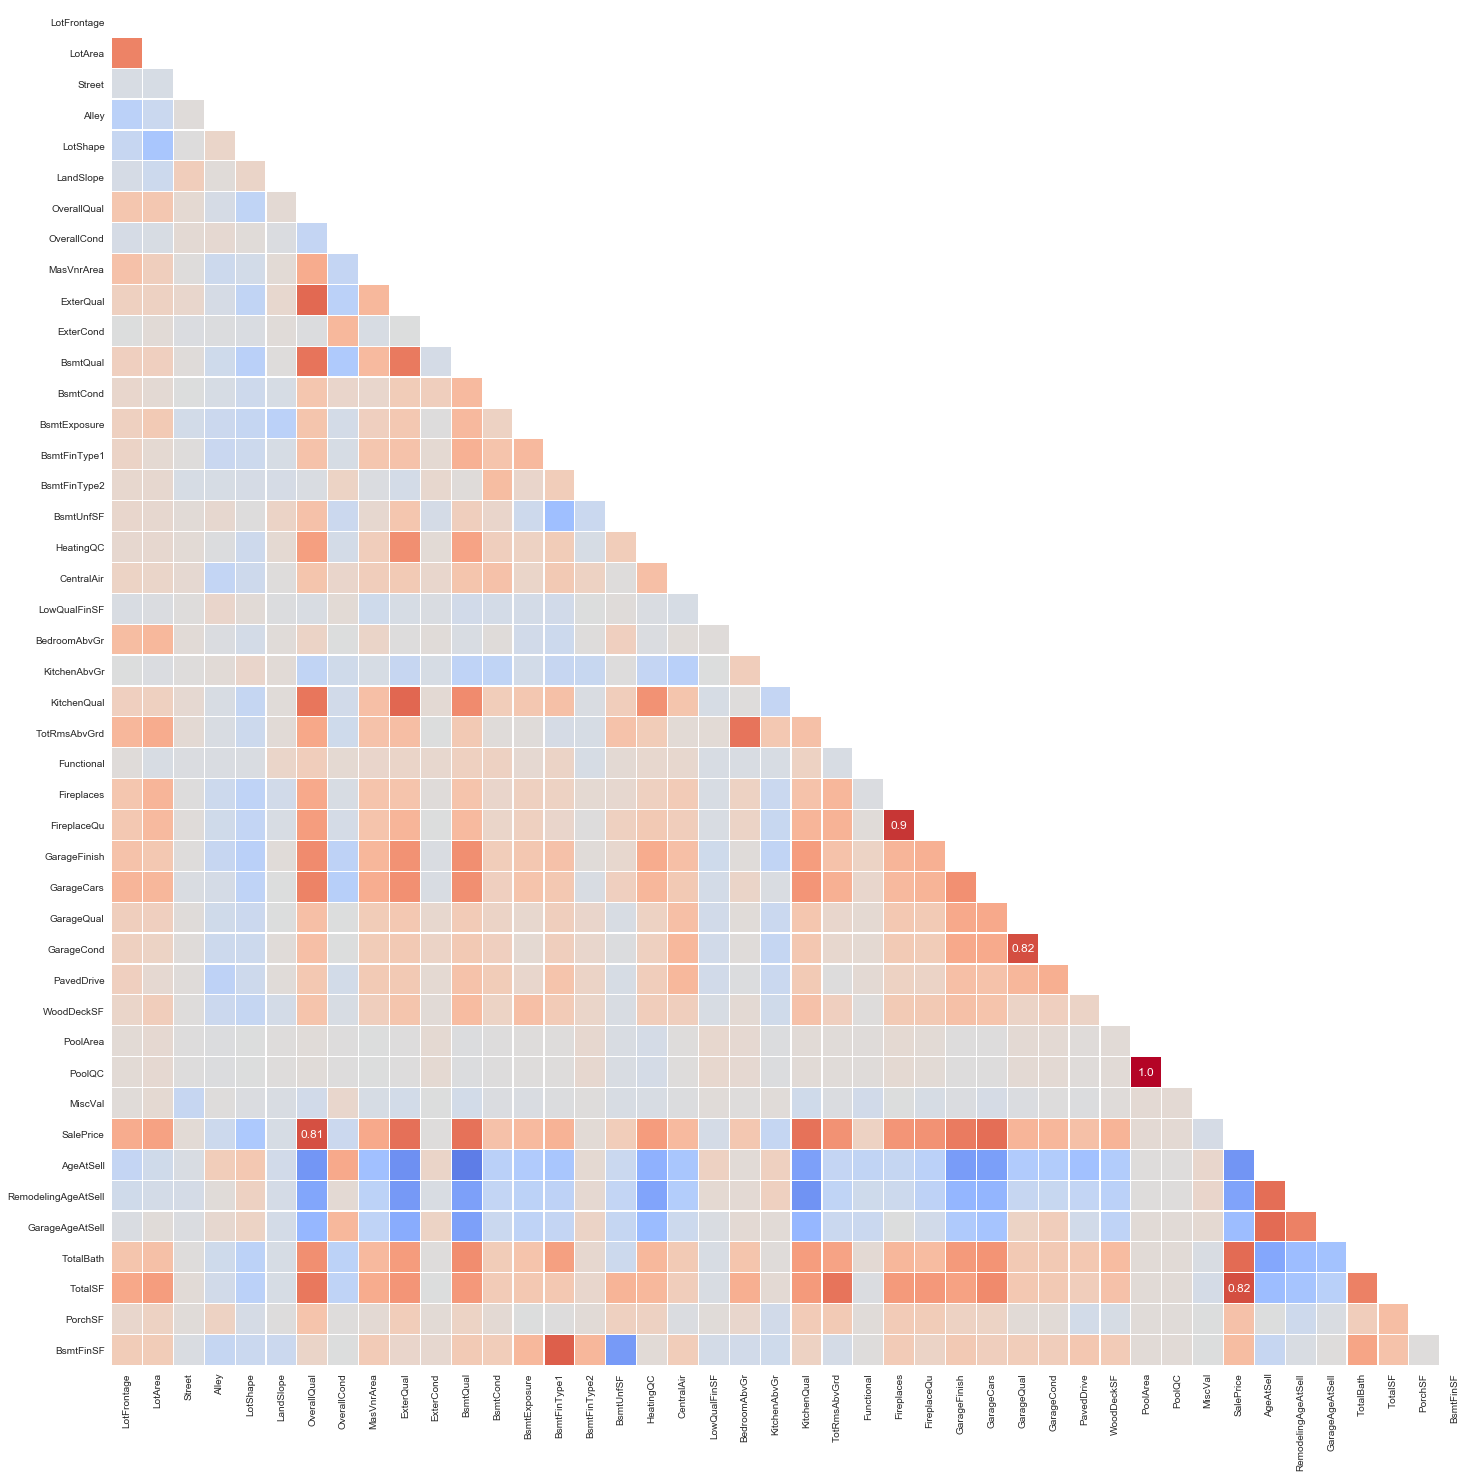

In [225]:
corr = df.corr(method)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(25,25))
with sns.axes_style("white"):
    ax0 = sns.heatmap(corr, mask=mask, vmin=-1., vmax=1.,
                square=True, cmap=plt.get_cmap('coolwarm'), 
                linewidths=0.2, annot=True, cbar=False)
    
    for text in ax0.texts:
        t = float(text.get_text())
        if (abs(t) < 0.8):
            text.set_text('')
        else:
            text.set_text(round(t, 4))

<div class="alert alert-success">
<span class="label label-success">COMMENT</span><br><br>

We can see some strong correlation between some features that is represented by dark colors:
<br>
<ul>

<li><i>GarageYrBlt</i> and <i>YearBuilt</i> have a correlation of $\simeq 0.86$. This is obvious because we speak here about years and these two features may be equal in many cases.</li>
<li><i>Fireplaces</i> and <i>FireplacesQu</i> have a correlation of $\simeq 0.9$.</li>
<li><i>GarageCond</i> and <i>GarageQual</i> have a correlation of $\simeq 0.82$.</li>
<li><i>PoolQC</i> and <i>PoolArea</i> have a correlation of $\simeq 1.0$.</li>
<li>We have some high correlations with features we added.</li>
</ul>

</div>

<div class="alert alert-info">


Before dropping some of the highly correlated features, let's visualize the correlation between the sale price and the other features:
</div>

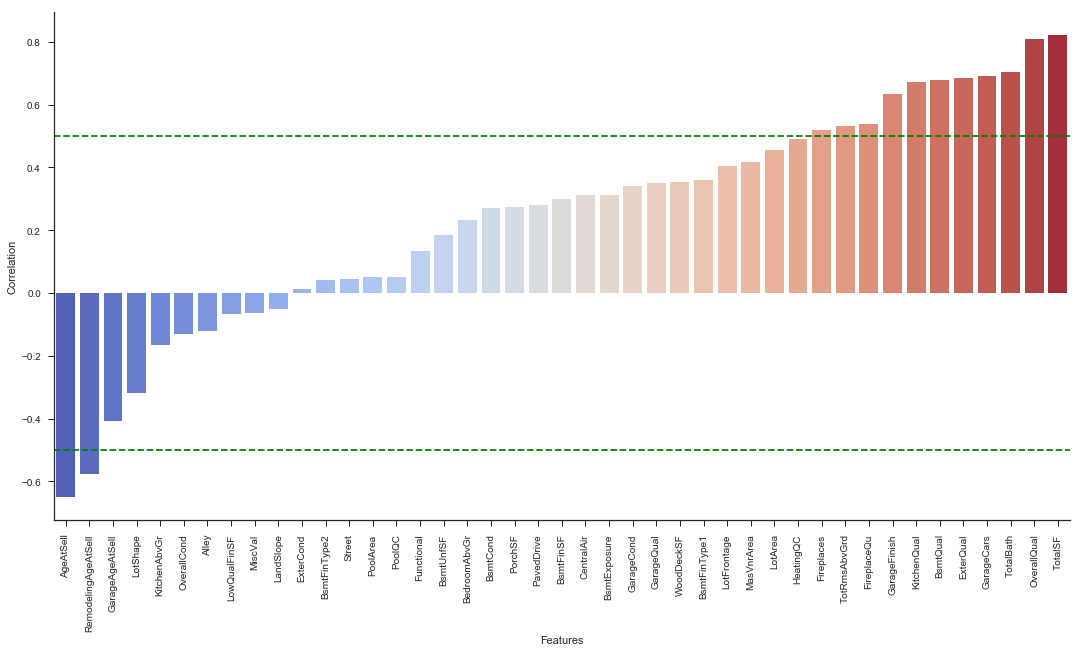

In [226]:
features = df.columns.tolist()
features.remove('SalePrice')

df2 = pd.DataFrame(
    list(map(lambda feature: df[feature].corr(df['SalePrice'], method), features)),
    index=features, columns=['Correlation'])
df2 = df2.sort_values('Correlation', ascending=True)

# Let's plot the ranking of the features
sns.factorplot(y="Correlation", x="index", data = df2.reset_index(), kind="bar", 
               size=8, aspect=1.9, palette='coolwarm')
plt.axhline(y=-0.5, color='g', linestyle='--')
plt.axhline(y=0.5, color='g', linestyle='--')
plt.xlabel('Features')
plt.xticks(rotation=90); # Rotate the x-ticks with 90 degrees

<div class="alert alert-success">
<span class="label label-success">COMMENT</span><br><br>

We can see that the most important numerical-ordinal features are: <i>AgeAtSell</i> - <i>RemodelingAgeAtSell</i> - <i>Fireplaces</i> - <i>TotRmsAbvGrd</i> - <i>FireplaceQu</i> - <i>GarageFinish</i> - <i>KitchenQual</i> - <i>BsmtQual</i> - <i>ExterQual</i> - <i>GarageCars</i> - <i>TotalBath</i> - <i>OverallQual</i> - <i>TotalSF</i>. 


<br><br>

Given the plot, <i>YearBuilt</i> is more important than <i>GarageYrBlt</i> and these two features are highly correlated. Therefore, we're going to drop <i>GarageYrBlt</i>. For the same reason, we're going to drop <i>Fireplaces</i>, <i>GarageCond</i> and <i>PoolArea</i> as well. On the other hand, we're going to keep some cases we added instead of the old ones.
</div>

In [227]:
if (drop_highly_correlated):
    columns_to_remove = ['Fireplaces', 'PoolArea'] 

    train_data.drop(columns_to_remove, axis=1, inplace=True)

    for x in columns_to_remove:
        numerical_features.remove(x)
        numerical_ordinal_features.remove(x)

    columns_to_remove = ['GarageCond'] 

    train_data.drop(columns_to_remove, axis=1, inplace=True)

    for x in columns_to_remove:
        ordinal_features.remove(x)
        numerical_ordinal_features.remove(x)
        categorical_features.remove(x)

else:
    print("Drop highly correlated featues is disabled")

<div class="alert alert-info">

Given the two correlation maps, we can see that not all factors have linear relationship with the sale price. The most common way to fit these data is to include polynomial terms, such as squared or cubed predictors. Since our data contains a lot of features, we prefer to creates polynomials terms only for the features having more than $0.5$ in absolute value of correlation:


</div>



In [228]:
features_highly_correlated = df2[abs(df2) > 0.5].dropna().index.tolist()
features_highly_correlated = list(set(features_highly_correlated).intersection(set(numerical_ordinal_features)))
print(features_highly_correlated)

['TotRmsAbvGrd', 'ExterQual', 'KitchenQual', 'BsmtQual', 'GarageFinish', 'OverallQual', 'TotalSF', 'TotalBath', 'AgeAtSell', 'RemodelingAgeAtSell', 'FireplaceQu', 'GarageCars']


In [229]:
for a in features_highly_correlated:
    if a in numerical_features:
        R2_print(corr_pearson, a,'SalePrice')

- A correlation of 0.5391 between TotRmsAbvGrd and SalePrice implies that 29.060000000000002 % of variation in  SalePrice  can be explained by  TotRmsAbvGrd  and vice-versa.
--- The correlation between TotRmsAbvGrd and the sale price is: 0.5391 .
--- The correlation between SalePrice and the sale price is: 1.0 .

- A correlation of 0.8194 between TotalSF and SalePrice implies that 67.15 % of variation in  SalePrice  can be explained by  TotalSF  and vice-versa.
--- The correlation between TotalSF and the sale price is: 0.8194 .
--- The correlation between SalePrice and the sale price is: 1.0 .

- A correlation of 0.6729 between TotalBath and SalePrice implies that 45.28 % of variation in  SalePrice  can be explained by  TotalBath  and vice-versa.
--- The correlation between TotalBath and the sale price is: 0.6729 .
--- The correlation between SalePrice and the sale price is: 1.0 .

- A correlation of 0.6804 between GarageCars and SalePrice implies that 46.300000000000004 % of variation

<div class="alert alert-info">
We are going now to featurize these features except <i>TotalSF</i> and <i>OverallQual</i> that have a high linear correlation (respectively $0.8194$ and $0.8192$).
</div>

In [230]:
if (apply_featurizing):
    features_to_featurize = [
        'AgeAtSell', 'RemodelingAgeAtSell', 'GarageFinish','ExterQual',
        'KitchenQual', 'OverallQual', 'FireplaceQu', 'BsmtQual',
        'TotalBath', 'TotRmsAbvGrd', 'GarageCars'
    ]
    
    def featurize(df):
        for feature in features_to_featurize:
            df[feature + '-2'] = np.sign(df[feature]) * (df[feature] ** 2)

        return df
    
    train_data = featurize(train_data)
    
    for feature in features_to_featurize:      
        numerical_ordinal_features.append(feature + '-2')
        if feature in numerical_features:
            numerical_features.append(feature + '-2')
        else:
            ordinal_features.append(feature + '-2')
            categorical_features.append(feature + '-2')
    
else:
    print("Featurizing is disabled")

<div class="alert alert-info">
<span class="label label-info" id="feature_selection" style="font-size:12px;">FEATURE SELECTION</span><br><br>

This is the most important part. In order to reduce overfitting and improve the generalization of models, and to gain a better understanding of the features and their relationship to the sale price, we need <strong><i>feature selection</i><strong>. 

</div>

<div class="alert alert-info">
<span class="label label-danger" id="univariate_feature_selection">Univariate feature selection</span><br><br>

We're going to now to perform a Univariate feature selection to examine each feature individually to determine the strength of the relationship of the feature with the sale price. The selection of features is independent of any machine learning algorithms. Instead, features are selected on the basis of their scores in various statistical tests for their correlation with the outcome variable. We're going to use two of correlatiton depending on the nature of our features.

<br>

Let's start with our categorical features. We're going to use <b>ANOVA</b> (Analysis of variance), it is operated using one or more categorical independent features and one continuous dependent feature. It provides a statistical test of whether the means of several groups are equal or not.

</div>

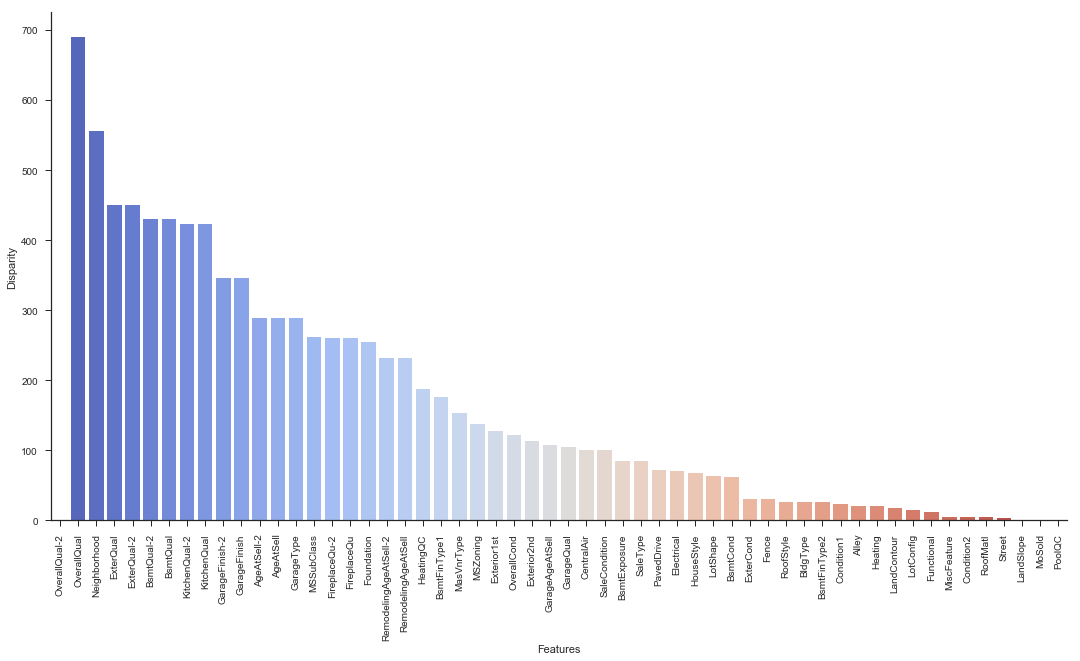

In [231]:
def anova(frame):
    anv = pd.DataFrame()
    anv['feature'] = categorical_features
    pvals = []
    
    for c in categorical_features:
        samples = []
        for cls in frame[c].unique():
            s = frame[frame[c] == cls]['SalePrice'].values
            samples.append(s)
        pval = f_oneway(*samples)[1]
        pvals.append(pval)
        
    anv['pval'] = pvals
    return anv.sort_values('pval')

a = anova(train_data)
a.loc[a[a.feature == 'OverallQual'].index,'pval'] = 1e-300
a.loc[a[a.feature == 'OverallQual2'].index,'pval'] = 1e-300
a['Disparity'] = - np.log(a['pval'].values)

# Let's plot the ranking of the features
sns.factorplot(x='feature', y='Disparity', data = a, kind="bar", 
               size=8, aspect=1.9, palette='coolwarm')
plt.xlabel('Features')
plt.xticks(rotation=90); # Rotate the x-ticks with 90 degrees

<div class="alert alert-success">
<span class="label label-success">COMMENT</span><br><br>

The plot shows the most important categorical features. Given that the p-value of the feature <i>OverallQual</i> is too low, Python considering it as zero which gives us a infinity value after applying the logarithm. To avoid this problem, we change the zero value with $10^{-300}$. Besides that, some features that we added have a very low ranking which means they are not vey important as we tought.

<br><br>

We're going to perform a regression to see the number of features we should keep. To make it easy for us, we're going to define a function to work out the <strong>RMSE</strong> using K-Fold cross validation. Since the algorithm works only with numbers, we're going to transform nominal features using a dummy encoding. The basic strategy is to convert each category value into a new column and assigns a $1$ or $0$ (True/False) value to the column. Pandas supports this feature using <strong>get_dummies()</strong>.
</div>

In [232]:
def RMSE_error(model, X, y, cv=20):
    # Work out the RMSE error
    # Perform cv-fold cross validation
    kf = KFold(n_splits=cv, shuffle=True, random_state=RANDOM_STATE).get_n_splits(X)
    return np.sqrt(-cross_val_score(model, X, y, cv=kf, scoring = 'neg_mean_squared_error').mean())

In [233]:
ranks_categorical = {} # Dictionnary of RMSE
Y_train = train_data.SalePrice

for i in range(len(a)):    
    columns_iter = a[:i].feature.tolist()
    nominal_iter = list(set(columns_iter).intersection(nominal_features))
    ordinal_iter = list(set(columns_iter).intersection(ordinal_features))
    
    if (nominal_iter):
        df_nominal = pd.get_dummies(train_data[nominal_iter], drop_first=True)
    else:
        df_nominal = pd.DataFrame()
        
    train_sub = pd.concat([train_data[numerical_features], train_data[ordinal_iter], df_nominal], axis=1).drop('SalePrice', axis=1)
    X_train_sub = train_sub.as_matrix() # The input matrix
    
    # Create linear regression object
    regr = make_pipeline(RobustScaler(), Lasso(alpha = 0.001, random_state=RANDOM_STATE))

    ranks_categorical[i] = RMSE_error(regr, X_train_sub, Y_train)

pd.DataFrame(pd.Series(ranks_categorical), columns=['Score'])

Score
0   0.172690
1   0.146547
2   0.145784
3   0.137408
4   0.135931
5   0.136063
6   0.135715
7   0.134807
8   0.132715
9   0.132740
10  0.132512
11  0.132580
12  0.131700
13  0.131720
14  0.131715
15  0.131555
16  0.131330
17  0.131405
18  0.131296
19  0.128219
20  0.128108
21  0.127426
22  0.127402
23  0.127471
24  0.127239
25  0.126770
26  0.118069
27  0.118087
28  0.118088
29  0.117578
30  0.117324
31  0.115314
32  0.114847
33  0.115022
34  0.115083
35  0.115083
36  0.115085
37  0.115159
38  0.115399
39  0.115465
40  0.115520
41  0.115535
42  0.115535
43  0.115405
44  0.114655
45  0.114840
46  0.114840
47  0.114840
48  0.114831
49  0.113373
50  0.113373
51  0.113373
52  0.113373
53  0.113373
54  0.113373
55  0.113447

<div class="alert alert-success">
<span class="label label-success">COMMENT</span><br><br>

The best score ($0.113388$) is given by a number of categorical features between $49$ and $54$. Therefore, we're going to choose the best $52$ categorical features
</div>

In [234]:
best_categorical_features = a[:52].feature.tolist()

print("Best categorical features:\n", " - ".join(best_categorical_features))

Best categorical features:
 OverallQual-2 - OverallQual - Neighborhood - ExterQual - ExterQual-2 - BsmtQual-2 - BsmtQual - KitchenQual-2 - KitchenQual - GarageFinish-2 - GarageFinish - AgeAtSell-2 - AgeAtSell - GarageType - MSSubClass - FireplaceQu-2 - FireplaceQu - Foundation - RemodelingAgeAtSell-2 - RemodelingAgeAtSell - HeatingQC - BsmtFinType1 - MasVnrType - MSZoning - Exterior1st - OverallCond - Exterior2nd - GarageAgeAtSell - GarageQual - CentralAir - SaleCondition - BsmtExposure - SaleType - PavedDrive - Electrical - HouseStyle - LotShape - BsmtCond - ExterCond - Fence - RoofStyle - BldgType - BsmtFinType2 - Condition1 - Alley - Heating - LandContour - LotConfig - Functional - MiscFeature - Condition2 - RoofMatl


<div class="alert alert-info">

Before moving to numerical features, we're going to contine feature enginnering the remaining nominal features using a dummy encoding.

<br>

Let's select the best nominal features from the best categorical features we chose:
</div>

In [235]:
best_nominal_features = list(set(nominal_features).intersection(best_categorical_features))
best_ordinal_features = list(set(best_categorical_features).intersection(ordinal_features))
numerical_ordinal_features = numerical_features + best_ordinal_features

<div class="alert alert-info">

Let's feature engineer those features:
</div>

In [236]:
df_nominal = pd.get_dummies(train_data[best_nominal_features], drop_first=True)
train_data = pd.concat([train_data[numerical_ordinal_features], df_nominal], axis=1)
best_nominal_features = df_nominal.columns.tolist()

<div class="alert alert-info">

Let's to move now to our numerical/ordinal features. We're going to try different methods to select the best features. To make it easy for us, we're going to define use functions: A function to link features with their ranking and a function to perform linear regression and update the score. We're going to define a dictionary to store the RMSE with the selected feauture as well as another dictionnary to select features with a non-null score.
</div>

In [237]:
ranks = {} # Dictionnary of RMSE
best_features_dic = {} # List of best features given a method

Y_train = train_data.SalePrice.values # The sale price represening the target vectorr

df = pd.DataFrame(train_data[numerical_ordinal_features]).drop('SalePrice', axis=1) # Our training data with only the numerical and ordinal data

#df = train_data[numerical_ordinal_features].drop('SalePrice', axis=1) # Our training data with only the numerical and ordinal data

X_train = df.values # The input matrix

colnames = df.columns # The feature names

def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return pd.DataFrame(pd.Series(dict(zip(names, ranks))), columns=['Score']).sort_values('Score', ascending=False)

def KFold_predict(model, X, y, cv=5):
    # Work out the RMSE error
    # Perform cv-fold cross validation
    kf = KFold(n_splits=cv, shuffle=True, random_state=RANDOM_STATE).get_n_splits(X)
    return cross_val_predict(model, X, y, cv=kf)

def perform_regression(method_name):
    print("---- Performing linear regression using features of the method:", method_name, "----")

    train_sub = train_data[list(best_features_dic[method_name]) + best_nominal_features]
    X_train_sub = train_sub.as_matrix() # The input matrix

    # Create linear regression object
    regr = make_pipeline(RobustScaler(), Lasso(alpha = 0.001, random_state=RANDOM_STATE))

    # Make predictions using the testing set
    Y_pred = KFold_predict(regr, X_train_sub, Y_train)

    ranks[method_name] = RMSE_error(regr, X_train_sub, Y_train)

    print("RMSE: %.4f" %  ranks[method_name])

    # Explained variance score: 1 is perfect prediction
    print('R2 score: %.2f' % r2_score(Y_train, Y_pred))

<div class="alert alert-info">


Let's see first our score using all columns:
</div>

In [238]:
best_features_dic["All features"] = colnames
perform_regression("All features")

---- Performing linear regression using features of the method: All features ----
RMSE: 0.1134
R2 score: 0.92


<div class="alert alert-info">

Let's use <strong>SelectKBest</strong> that removes all features but the k highest scoring ones:
</div>

In [239]:
select_feature = SelectKBest(f_regression).fit(X_train, Y_train)

best_df = ranking(np.abs(select_feature.scores_), colnames)
best_df = best_df[best_df.Score > 0]
best_features_dic["KBest"] = best_df.index.tolist()

print('Score list:')
best_df

Score list:


Score
TotalSF                 1.00
OverallQual             1.00
OverallQual-2           0.97
ExterQual               0.42
GarageCars              0.42
ExterQual-2             0.41
TotalBath               0.40
GarageCars-2            0.40
KitchenQual-2           0.39
BsmtQual-2              0.39
KitchenQual             0.38
TotalBath-2             0.34
BsmtQual                0.30
GarageFinish            0.28
AgeAtSell               0.26
RemodelingAgeAtSell     0.24
FireplaceQu             0.21
RemodelingAgeAtSell-2   0.21
FireplaceQu-2           0.20
TotRmsAbvGrd            0.20
TotRmsAbvGrd-2          0.20
GarageFinish-2          0.20
AgeAtSell-2             0.14
HeatingQC               0.14
MasVnrArea              0.11
LotArea                 0.09
GarageAgeAtSell         0.09
GarageQual              0.08
WoodDeckSF              0.07
CentralAir              0.07
LotFrontage             0.07
BsmtExposure            0.06
BsmtFinType1            0.06
PorchSF                 0.05
PavedDrive              0.05
LotShape                0.04
BsmtCond                0.04
BsmtUnfSF               0.02
BsmtFinSF               0.02
BedroomAbvGr            0.02
Functional              0.01
KitchenAbvGr            0.01

<div class="alert alert-success">
<span class="label label-success">COMMENT</span><br><br>

We have more features that are important than before. The fist features look almost the same as those we found with the correlation. However, we chose here all the features having a positive (non null) score. Let's try them with a linear regression model to see how this change affects the RMSE:
</div>

In [240]:
perform_regression("KBest")

---- Performing linear regression using features of the method: KBest ----
RMSE: 0.1187
R2 score: 0.91


<div class="alert alert-info">
<span class="label label-danger" id="RF_feature_selection">Random Forest feature ranking</span><br><br>

Random forests are among the most popular machine learning methods thanks to their relatively good accuracy, robustness and ease of use. They also provide two straightforward methods for feature selection: mean decrease impurity and mean decrease accuracy.
</div>

In [241]:
rf = RandomForestRegressor(n_jobs=-1, n_estimators=50, random_state=RANDOM_STATE)
rf.fit(X_train, Y_train)

best_df2 = ranking(rf.feature_importances_, colnames)
best_df2 = best_df2[best_df2.Score > 0]
best_features_dic["Random Forest"] = best_df2.index.tolist()

print('Score list:')
best_df2

Score list:


Score
TotalSF                 1.00
OverallQual             0.76
OverallQual-2           0.55
CentralAir              0.06
LotArea                 0.05
OverallCond             0.04
BsmtFinSF               0.04
BsmtUnfSF               0.03
LotFrontage             0.03
AgeAtSell               0.03
RemodelingAgeAtSell     0.03
RemodelingAgeAtSell-2   0.03
AgeAtSell-2             0.03
PorchSF                 0.02
TotalBath               0.02
TotalBath-2             0.02
GarageAgeAtSell         0.02
GarageCars              0.02
GarageCars-2            0.02
HeatingQC               0.01
TotRmsAbvGrd            0.01
TotRmsAbvGrd-2          0.01
MasVnrArea              0.01
KitchenQual-2           0.01
KitchenQual             0.01
GarageQual              0.01
ExterCond               0.01
FireplaceQu             0.01
BedroomAbvGr            0.01
BsmtExposure            0.01
BsmtFinType1            0.01
BsmtQual                0.01
GarageFinish-2          0.01
WoodDeckSF              0.01
FireplaceQu-2           0.01
Functional              0.01
GarageFinish            0.01

<div class="alert alert-success">
<span class="label label-success">COMMENT</span><br><br>

Those features are quite different from our old ones and fewer which means that the rest of the feaures are not important to Random Forest. Random forest's ranking is typically aggressive in the sense that there is a sharp drop-off of scores after the best feature: the $2^{nd}$ ranked feature is $1.13$ smaller score than the top feature.

<br>
Let's see our new scoring of the linear regression:
</div>

In [242]:
perform_regression("Random Forest")

---- Performing linear regression using features of the method: Random Forest ----
RMSE: 0.1144
R2 score: 0.92


<div class="alert alert-info">
<span class="label label-danger" id="stability_feature_selection">Stability Selection</span><br><br>

Stability selection is a feature selection method based on subsampling in combination with selection algorithms (which could be regression, SVMs or other similar method). This methods apply a feature selection algorithm on different subsets of data and with different subsets of features. After repeating the process a number of times, the selection results can be aggregated, for example by checking how many times a feature ended up being selected as important when it was in an inspected feature subset. We can expect strong features to have scores close to $100 \ \% $, since they are always selected when possible. Weaker, but still relevant features will also have non-zero scores, since they would be selected when stronger features are not present in the currently selected subset, while irrelevant features would have scores (close to) zero, since they would never be among selected features.

<br><br>

Let's run our Selection Stability method with RFE (Recursive Feature Elimination). It is based on the idea of repeatedly constructing a model (for example an SVM or a regression model) and choose either the best or worst performing feature (for example based on coefficients), setting the feature aside and then repeating the process with the rest of the features. This process is applied until all features in the dataset are exhausted. Features are then ranked according to when they were eliminated. 

</div>

In [243]:
# Use linear regression as the model
lr = Lasso(alpha = 0.001, random_state=RANDOM_STATE)

# rank all features, i.e continue the elimination until the last one
# stop the search when 1 features are left
rfe = RFE(estimator=lr, n_features_to_select=1)
rfe.fit(X_train, Y_train)

best_df3 = ranking(list(map(float, rfe.ranking_)), colnames, order=-1)
best_df3 = best_df3[best_df3.Score > 0]
best_features_dic["RFE"] = best_df3.index.tolist()

print('Score list:')
best_df3

Score list:


Score
KitchenAbvGr            1.00
TotalSF                 0.98
CentralAir              0.96
BsmtQual                0.94
GarageQual              0.91
Functional              0.89
BsmtQual-2              0.87
HeatingQC               0.85
PavedDrive              0.83
OverallCond             0.81
LotShape                0.79
BsmtExposure            0.77
GarageCars-2            0.74
FireplaceQu             0.72
TotalBath-2             0.70
ExterCond               0.68
LotArea                 0.66
KitchenQual-2           0.64
BsmtFinType2            0.62
BsmtUnfSF               0.60
BsmtCond                0.57
OverallQual-2           0.55
ExterQual-2             0.53
TotRmsAbvGrd-2          0.51
BsmtFinSF               0.49
PorchSF                 0.47
BedroomAbvGr            0.45
Alley                   0.43
LowQualFinSF            0.40
AgeAtSell               0.38
MiscVal                 0.36
WoodDeckSF              0.34
LotFrontage             0.32
RemodelingAgeAtSell     0.30
MasVnrArea              0.28
GarageAgeAtSell         0.26
RemodelingAgeAtSell-2   0.23
AgeAtSell-2             0.21
GarageCars              0.19
OverallQual             0.17
KitchenQual             0.15
TotalBath               0.13
FireplaceQu-2           0.11
BsmtFinType1            0.09
TotRmsAbvGrd            0.06
GarageFinish-2          0.04
GarageFinish            0.02

<div class="alert alert-success">
<span class="label label-success">COMMENT</span><br><br>

Let's see our new scoring of the linear regression on these features:
</div>

In [244]:
perform_regression("RFE")

---- Performing linear regression using features of the method: RFE ----
RMSE: 0.1134
R2 score: 0.92


<div class="alert alert-info">
<span class="label label-danger" id="model_feature_selection">Model Feature Ranking</span><br><br>

Let's apply 3 different models (XGBoost, Lasso and Ridge Regression) and see how the features are selected via these models. Let's start with XGBoost regressor:

</div>

In [245]:
model_xgb = xgb.XGBRegressor(random_state=RANDOM_STATE)

model_xgb.fit(X_train, Y_train)

best_df4 = ranking(model_xgb.feature_importances_, colnames)
best_df4 = best_df4[best_df4.Score > 0]
best_features_dic["XGBoost"] = best_df4.index.tolist()

print('Score list:')
best_df4

Score list:


Score
TotalSF                 1.00
LotArea                 0.80
AgeAtSell               0.64
OverallCond             0.59
PorchSF                 0.40
BsmtUnfSF               0.40
RemodelingAgeAtSell-2   0.35
OverallQual             0.32
BsmtFinSF               0.29
Functional              0.28
TotRmsAbvGrd            0.25
GarageAgeAtSell         0.24
TotalBath               0.21
LotFrontage             0.19
WoodDeckSF              0.17
BsmtExposure            0.15
HeatingQC               0.13
FireplaceQu-2           0.11
BedroomAbvGr            0.11
GarageQual              0.09
MiscVal                 0.09
BsmtQual-2              0.08
GarageCars              0.08
MasVnrArea              0.08
KitchenQual             0.08
BsmtFinType1            0.07
PavedDrive              0.07
KitchenAbvGr            0.07
LowQualFinSF            0.07
LotShape                0.05
CentralAir              0.05
GarageFinish-2          0.04
ExterQual               0.04
BsmtFinType2            0.04
ExterCond               0.03
Alley                   0.01
BsmtCond                0.01

<div class="alert alert-info">
Let's see our new scoring of the linear regression:

</div>

In [246]:
perform_regression("XGBoost")

---- Performing linear regression using features of the method: XGBoost ----
RMSE: 0.1149
R2 score: 0.92


<div class="alert alert-info">
Let's apply Ridge regression:
</div>

In [247]:
ridge = Ridge(alpha = 0.0006, random_state=RANDOM_STATE)

ridge.fit(X_train, Y_train)

best_df6 = ranking(np.abs(ridge.coef_), colnames)
best_df6 = best_df6[best_df6.Score > 0]
best_features_dic["Ridge"] = best_df6.index.tolist()

print('Score list:')
best_df6

Score list:


Score
TotRmsAbvGrd     1.00
KitchenAbvGr     0.73
TotalSF          0.58
BsmtQual         0.42
TotRmsAbvGrd-2   0.27
CentralAir       0.21
KitchenQual      0.19
OverallCond      0.18
PavedDrive       0.15
GarageQual       0.12
TotalBath        0.11
Functional       0.11
ExterCond        0.09
LotArea          0.08
ExterQual        0.08
GarageCars       0.08
BsmtQual-2       0.07
FireplaceQu      0.07
OverallQual      0.06
Alley            0.06
HeatingQC        0.05
GarageCars-2     0.05
KitchenQual-2    0.04
BsmtFinType2     0.04
BedroomAbvGr     0.03
BsmtExposure     0.03
BsmtCond         0.02
LotFrontage      0.02
LotShape         0.02
BsmtUnfSF        0.02
PorchSF          0.01
TotalBath-2      0.01
OverallQual-2    0.01
MiscVal          0.01
AgeAtSell        0.01
LowQualFinSF     0.01
GarageFinish     0.01
FireplaceQu-2    0.01
BsmtFinSF        0.01

<div class="alert alert-info">
Let's see our new scoring of the linear regression:
</div>

In [248]:
perform_regression("Ridge")

---- Performing linear regression using features of the method: Ridge ----
RMSE: 0.1135
R2 score: 0.92


<div class="alert alert-warning">
<span class="label label-warning" id="selection" style="font-size:11px;">SELECTION</span><br><br>


Let's gather all the scores from the various methods above:
</div>

In [249]:
df_ranks = pd.DataFrame(pd.Series(ranks), columns=['RMSE'])
df_ranks = df_ranks.sort_values('RMSE', ascending=True)
df_ranks

RMSE
All features   0.113373
RFE            0.113378
Ridge          0.113545
Random Forest  0.114384
XGBoost        0.114867
KBest          0.118651

<div class="alert alert-info">
To have a better view, we're going to plot these factors with their scores:
</div>

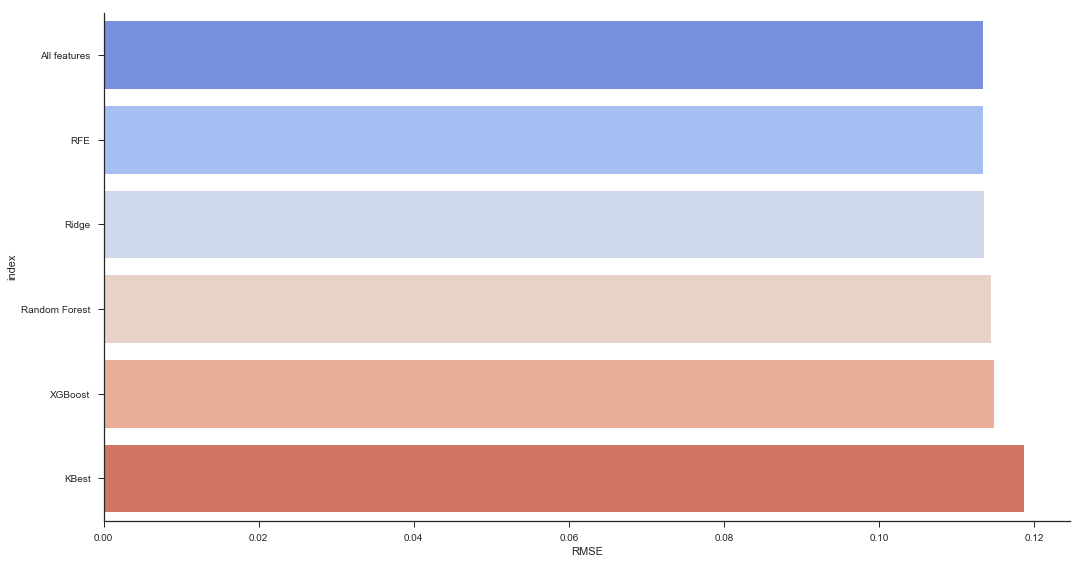

In [250]:
# Let's plot the ranking of the features
sns.factorplot(x="RMSE", y="index", data = df_ranks.reset_index(), kind="bar", 
               size=8, aspect=1.9, palette='coolwarm', orient="h");

<div class="alert alert-success">
<span class="label label-success">COMMENT</span><br><br>

The KBest gives the best RMSE. Therefore, we're going to use these features as our best features.
</div>

<div class="alert alert-info">
Now let's save our best features (features having a non-null score):
</div>

In [251]:
best_numerical_ordinal_features = best_features_dic[df_ranks.reset_index().loc[0]['index']]
print(best_numerical_ordinal_features)

Index(['MiscVal', 'TotRmsAbvGrd', 'LowQualFinSF', 'BsmtFinSF', 'MasVnrArea',
       'TotalSF', 'LotFrontage', 'KitchenAbvGr', 'BsmtUnfSF', 'PorchSF',
       'TotalBath', 'GarageCars', 'WoodDeckSF', 'LotArea', 'BedroomAbvGr',
       'TotalBath-2', 'TotRmsAbvGrd-2', 'GarageCars-2', 'ExterQual',
       'KitchenQual', 'RemodelingAgeAtSell-2', 'BsmtCond', 'BsmtFinType1',
       'BsmtFinType2', 'BsmtQual-2', 'ExterCond', 'BsmtQual', 'ExterQual-2',
       'PavedDrive', 'KitchenQual-2', 'GarageFinish-2', 'GarageAgeAtSell',
       'Functional', 'AgeAtSell', 'CentralAir', 'AgeAtSell-2', 'Alley',
       'OverallCond', 'FireplaceQu-2', 'OverallQual', 'GarageFinish',
       'GarageQual', 'OverallQual-2', 'LotShape', 'HeatingQC',
       'RemodelingAgeAtSell', 'BsmtExposure', 'FireplaceQu'],
      dtype='object')


<div class="alert alert-info">
<span class="label label-primary" style="font-size:15px;" id="linear_regr_model">Part 3: Linear regression model</span> <br><br>

Let's construct a function that can prepare our data by doing all the steps above: cleaning of the data - feature engineering...

</div>

In [252]:
def prepare_data(df):
    
    # Impute the missing values
    impute_data(df)
    
    # Drop the Id column because it's useless
    df.drop(['Id'], axis=1, inplace=True)
    
    # Skewness of target variable
    df['SalePrice'] = np.log1p(df['SalePrice'])
    
    # Replace nominal features
    replace_nominal(df)
    
    # Replace ordinal features that are actually nominal
    replace_ordinal(df)
    
    # Add the new features
    add_features(df)
    
    # skewed features
    if (apply_boxcox):
        df[skewness.index] = boxcox1p(df[skewness.index], lam)

    # Drop the columns that are highly correlated
    if (drop_highly_correlated):
        df.drop([
            'GrLivArea', 'GarageArea', 'Fireplaces', 'PoolArea', 'GarageCond'
        ], axis=1, inplace=True) 

    if (apply_featurizing):
        df = featurize(df)
     
    #best_nominal_features = list(set(nominal_features).intersection(best_categorical_features))

    df_nominal = pd.get_dummies(df[list(set(nominal_features).intersection(best_categorical_features))], drop_first=True)
    df_columns = df_nominal.columns.tolist()

    # Add the encoded columns to the test data in case the number of new features are not the same
    for x in best_nominal_features:
        if (x not in df_columns):
            df_nominal[x] = np.zeros(df[x.split("_")[0]].shape)
      
    
    # Train data doesn't contain RoofMatl_CompShg
    if ("RoofMatl_CompShg" not in df_nominal):
        df_nominal["RoofMatl_CompShg"] = np.zeros(df["RoofMatl"].shape)
                
    X = pd.concat([df[best_numerical_ordinal_features], df_nominal], axis=1).values # The input vector containing only the best features
    
    y = df.SalePrice.values # The sale price represening the target vector
            
    return X, y 

In [253]:
# Construct a dataframe from the training data csv file
train_data = pd.read_csv(path_data + "train.csv")

# Remove outliers we found before in our training data
train_data.drop(train_data[train_data.GrLivArea > 4000].index, inplace=True)
train_data.loc[train_data[train_data.KitchenAbvGr == 0].index[0],'KitchenQual'] = 'None'

# Construct a clean version of the training data ready to be used in our machine learning models
X, y = prepare_data(train_data) 

<div class="alert alert-info">
<span class="label label-info" id="linear_regression" style="font-size:12px;">LINEAR REGRESSION</span><br><br>


We need a model that predicts the sale price (which is a continuous value) of each house based on the house features. In this part, we'll use a polynominal model which is equivalent to a multiple linear model. 

<br><br>

Denote $f_i$ the value-at-features vector of the house $i$ and also their polynomial powers, and $p_i$ its sale price.

<br><br>

We will use a linear function to calculate $p_i$ from $f_i$:

<br><br>

$ p_i = \phi (f_{i}) $

<br><br>

where $\phi $ is an affine function (linear function + intercept term)

<br><br>

<strong>How to find the function $\phi$?</strong>
<br><br>


By using a Linear regression model to estimate the function that can fit to the data. We're going to use the class <strong>LinearRegression</strong> of <i>sklearn.linear_model</i> and then two functions <i>fit()</i> and <i>predict</i>. The parameters are:

<br><br>

- $\boldsymbol {X}$: The collection of row where <strong>each row</strong> contains the value of <strong>each feature</strong>.
<br>
- $\boldsymbol {y}$: The <strong>sale price</strong>.

<br><br>

To avoid overfitting, we're going to <strong>split</strong> our data into <strong>training data</strong> and <strong>test data</strong>. The training set contains a known output and the model learns on this data in order to be generalized to other data later on. We have the test dataset in order to test our model's prediction on it. However, splitting data into training data and test data is not enough because we'll still be vulnerable to overfitting in case one part contains only one category of some features. Therefore, we're going to apply <strong>K-fold cross-validation</strong> that is very similar to train/test split, but it's applied to more subsets. We have a parameter $k$ indicating the number of subsets that we're going to split our data into. The training will be on $k-1$ subsets and the validation on the remaining one.

</div>

<img src="https://www.researchgate.net/profile/Kiret_Dhindsa/publication/323969239/figure/fig10/AS:607404244873216@1521827865007/The-K-fold-cross-validation-scheme-133-Each-of-the-K-partitions-is-used-as-a-test.ppm" width="640" length="480" />


<div class="alert alert-info">

Let's now fit linear regression. This model may be very sensitive to outliers. So we need to made it more robust on them. For that we use the sklearn's <i>Robustscaler()</i> method on <strong>pipeline<strong>.

</div>

In [254]:
# Linear regression
print("---- Fitting Linear regression ----\n")
t0 = time()

regr = make_pipeline(RobustScaler(), LinearRegression())

# Perform 10-fold cross validation
y_pred = KFold_predict(regr, X, y)

print("RMSE: %.4f" %  RMSE_error(regr, X, y))

# Explained variance score: 1 is perfect prediction
print('R2 score: %.2f' % r2_score(y, y_pred))
    
print("\nTime spent: %0.3fs \n" % (time() - t0))

---- Fitting Linear regression ----

RMSE: 415908238.7616
R2 score: -13276279784734151671808.00

Time spent: 0.832s 



<div class="alert alert-success">
<span class="label label-success">COMMENT</span><br><br>

The linear regression model doesn't fit at all our model. Therefore, we have to use regularization.

</div>

<div class="alert alert-info">
<span class="label label-info" style="font-size:12px;" id="ridge_regularization">RIDGE REGULARIZATION</span> <br><br>

We're going to perform a gentle trade-off between fitting the model and not overfitting it by filtering out the noise from our data using Linear regression model with Ridge regularization. Ridge regression performs <strong>L2 regularization</strong>, i.e. it adds a factor of sum of squares of coefficients in the optimization objective. Thus, ridge regression optimizes the following:

<br><br>

$\boldsymbol {Objective} = \boldsymbol {RSS} + \boldsymbol {α} \times \boldsymbol {S}$

<br><br>

Where:

<br><br>

- $\boldsymbol {RSS}$: Residual sum of squares.
<br>
- $\boldsymbol {S}$: sum of square of coefficients

<br><br>

We introduce through this regularization an additional information (bias) to penalize extreme parameter weights.

<br><br>

Results depend on the value of $\boldsymbol {α}$, so we're going to use <strong>cross validation</strong>, which performs an exhaustive search over specified parameter values for an estimator in order to find the best parameter. First, the search is going to be performed on $\boldsymbol {α} \in \{0.0001, 0.0003, 0.0006, 0.0009, ..., 0.1, 0.3, 0.6, 0.9, 1, 3, 6, 10, 30, 60\}$ and then after getting the best alpha $\boldsymbol {α}^{*}$ over this set, in order to be even more precise, we're going to try values that are around $\boldsymbol {α}^{*}$ and select the best one.

</div>

In [255]:
# Ridge regression
print("---- Fitting Ridge regression ----\n")
t0 = time()

ridge = RidgeCV(alphas = 
                [0.001, 0.003, 
                 0.006, 0.009, 0.01, 0.03, 0.06, 0.09, 0.1, 0.3, 
                 0.6, 0.9, 1, 3, 6, 10, 30, 60
                ])

regr_ridge = make_pipeline(RobustScaler(), ridge)

regr_ridge.fit(X, y)

alpha = ridge.alpha_

print("-- 1st step -- \n\t Best alpha %.6f" %alpha)

ridge = RidgeCV(alphas = [
    alpha, alpha * .06, alpha * .065, alpha * .07, alpha * .075, alpha * .08, alpha * .085,
    alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, 
    alpha * .9, alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15,
    alpha * 1.25, alpha * 1.3, alpha * 1.35, alpha * 1.4
])

regr_ridge = make_pipeline(RobustScaler(), ridge)

regr_ridge.fit(X, y)

alpha = ridge.alpha_

print("-- 2nd step -- \n\t Best alpha %.6f\n" %alpha)

# Perform 10-fold cross validation
y_pred = KFold_predict(regr_ridge, X, y)

print("RMSE: %.4f" %  RMSE_error(regr_ridge, X, y))

# Explained variance score: 1 is perfect prediction
print('R2 score: %.2f' % r2_score(y, y_pred))
    
print("\nTime spent: %0.3fs \n" % (time() - t0))

---- Fitting Ridge regression ----

-- 1st step -- 
	 Best alpha 10.000000
-- 2nd step -- 
	 Best alpha 9.000000

RMSE: 0.1111
R2 score: 0.92

Time spent: 2.795s 



<div class="alert alert-success">
<span class="label label-success">COMMENT</span><br><br>


The RMSE is $0.1098$ which is good. We printed as well the $R^2$ score which is a statistical measure of how close the data are to the fitted regression line. We got a high $R^2$ score, so, our model fits well our data. 

</div>

<div class="alert alert-info">
<span class="label label-info" id="lasso_regularization" style="font-size:12px;">LASSO REGULARIZATION</span> <br><br>

LASSO (<strong>L</strong>east <strong>A</strong>bsolute <strong>S</strong>hrinkage and <strong>S</strong>election <strong>O</strong>perator) regression performs <strong>L1 regularization</strong>, i.e. it adds a factor of sum of absolute value of coefficients in the optimization objective. Thus, lasso regression optimizes the following:

<br><br>

$\boldsymbol {Objective} = \boldsymbol {RSS} + \boldsymbol {α} \times \boldsymbol {S}$

<br><br>

Where:

<br><br>

- $\boldsymbol {RSS}$: Residual sum of squares.
<br>
- $\boldsymbol {S}$: sum of absolute value of coefficients

<br><br>


Here, $\boldsymbol {α}$ works similar to that of ridge regression and provides a trade-off between balancing $\boldsymbol {RSS}$ and magnitude of coefficients. In contrast to <strong>L2 regularization</strong>, <strong>L1 regularization</strong> yields <strong>sparse</strong> feature vectors : most feature weights will be zero. Sparsity can be useful in practice if we have a high dimensional dataset with many features that are irrelevant.

<br><br>

Like Ridge regression, results depend on the value of $\boldsymbol {α}$, so we're going to use <strong>cross validation</strong>.


</div>

In [256]:
# Lasso regression
print("---- Fitting Lasso regression ----\n")
t0 = time()

lasso = LassoCV(alphas = 
                [0.001, 0.003, 
                 0.006, 0.009, 0.01, 0.03, 0.06, 0.09, 0.1, 0.3, 
                 0.6, 0.9, 1, 3, 6, 10, 30, 60
                ], random_state=RANDOM_STATE)

regr_lasso = make_pipeline(RobustScaler(), lasso)

regr_lasso.fit(X, y)

alpha = lasso.alpha_

print("-- 1st step -- \n\t Best alpha %.6f" %alpha)

lasso = LassoCV(alphas = [
    alpha, alpha * .06, alpha * .065, alpha * .07, alpha * .075, alpha * .08, alpha * .085,
    alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, 
    alpha * .9, alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15,
    alpha * 1.25, alpha * 1.3, alpha * 1.35, alpha * 1.4
], random_state=RANDOM_STATE)

regr_lasso = make_pipeline(RobustScaler(), lasso)

regr_lasso.fit(X, y)

alpha = lasso.alpha_

print("-- 2nd step -- \n\t Best alpha %.6f\n" %alpha)

# Perform 10-fold cross validation
y_pred = KFold_predict(regr_lasso, X, y)

print("RMSE: %.4f" %  RMSE_error(regr_lasso, X, y))

# Explained variance score: 1 is perfect prediction
print('R2 score: %.2f' % r2_score(y, y_pred))
    
print("\nTime spent: %0.3fs \n" % (time() - t0))

---- Fitting Lasso regression ----

-- 1st step -- 
	 Best alpha 0.001000
-- 2nd step -- 
	 Best alpha 0.000600

RMSE: 0.1116
R2 score: 0.92

Time spent: 6.037s 



<div class="alert alert-success">
<span class="label label-success">COMMENT</span><br><br>

The RMSE increased to $0.1108$. It may be a good idea to combine both regularizations.
</div>

<div class="alert alert-info">
<span class="label label-info" id="elastic_net" style="font-size:12px;">ELASTIC NET REGULARIZATION</span> <br><br>

The elastic net is a regularized regression method that linearly combines the <strong>L1</strong> and <strong>L2</strong> penalties of the lasso and ridge methods.
</div>

In [257]:
# Elastic net
print("---- Fitting Elastic ----\n")
t0 = time()

elasticn = ElasticNetCV(alphas=[
    0.0001, 0.0003, 0.0006, 0.0009,
    0.001, 0.003, 0.006, 0.009,
    0.01, 0.03, 0.06,  0.09, 
    0.1,0.3, 0.6, 0.9, 
    1, 3, 6
], l1_ratio=[
    0.01, 0.03, 0.05, 0.06, 0.07, 0.08, 0.085, 0.09, 0.095, 
    0.1, 0.3, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.95, 1], random_state=RANDOM_STATE)

regr_elastic = make_pipeline(RobustScaler(), elasticn)

regr_elastic.fit(X, y)

# Best parameter
alpha = elasticn.alpha_
l1_ratio = elasticn.l1_ratio_

print("-- 1st step -- \n\t Best alpha %.6f and best l1_ratio %.6f" %(alpha, l1_ratio))

elasticn = ElasticNetCV(alphas=[
    alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85,
    alpha * .9, alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15,
    alpha * 1.25, alpha * 1.3, alpha * 1.35, alpha * 1.4
], l1_ratio=[
    l1_ratio * .85, l1_ratio * .9, l1_ratio * .95, 
    l1_ratio, l1_ratio * 1.05, l1_ratio * 1.1, l1_ratio * 1.15
], random_state=RANDOM_STATE)

regr_elastic = make_pipeline(RobustScaler(), elasticn)

regr_elastic.fit(X, y)

# Best parameter
alpha = elasticn.alpha_
l1_ratio = elasticn.l1_ratio_

print("-- 2nd step -- \n\t Best alpha %.6f and best l1_ratio %.6f\n" %(alpha, l1_ratio))


# Perform 10-fold cross validation
y_pred = KFold_predict(regr_elastic, X, y)

print("RMSE: %.4f" %  RMSE_error(regr_elastic, X, y))

# Explained variance score: 1 is perfect prediction
print('R2 score: %.2f' % r2_score(y, y_pred))
    
print("\nTime spent: %0.3fs \n" % (time() - t0))

---- Fitting Elastic ----

-- 1st step -- 
	 Best alpha 0.000300 and best l1_ratio 0.700000
-- 2nd step -- 
	 Best alpha 0.000240 and best l1_ratio 0.805000

RMSE: 0.1106
R2 score: 0.92

Time spent: 30.686s 



<div class="alert alert-info">
<span class="label label-primary" style="font-size:15px;" id="kernel_ridge">Part 4: Kernel Ridge regression</span> <br><br>

Kernel ridge regression (KRR) combines <strong>ridge regression</strong> with the <strong>kernel trick</strong>. Results depend on the value of $\boldsymbol {\alpha}$ and $\boldsymbol {\gamma}$ (obviously, there are more factors but we are focusing on these two parameters), so we're going to use <strong>GridSearchCV</strong>, which performs an exhaustive search over specified parameter values for an estimator in order to find the best parameter. First, the search is going to be performed on $\boldsymbol {\alpha , \gamma} \in \{0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60\}$ and then after getting the best parameters $(\boldsymbol {\alpha}^{*}, \boldsymbol {\gamma}^{*})$ over this set, in order to be even more precise, we're going to try values that are around them and select the best one.

</div>

In [258]:
# Average modeling
print("---- Looking for best parameters for Kernel Ridge Regression ----\n")

gscv = GridSearchCV(
    KernelRidge(kernel='polynomial', degree=1, coef0=100), cv = 10, 
    scoring = 'neg_mean_squared_error',
    param_grid = {
        "alpha": [
            0.01, 0.03, 0.06, 0.09, 
            0.1, 0.3, 0.6, 0.9, 
            1, 3, 6
        ],
        "gamma": [
            0.01, 0.03, 0.06, 0.09, 
            0.1, 0.3, 0.6, 0.9, 
            1, 3, 6
        ]
    }
)

gscv.fit(X, y)

print("1st phase\n\tBest parameters:", gscv.best_params_)

alpha = gscv.best_params_["alpha"]
gamma = gscv.best_params_["gamma"]

gscv = GridSearchCV(
    KernelRidge(kernel='polynomial', degree=1, coef0=100), cv = 10, 
    scoring = 'neg_mean_squared_error',
    param_grid = {
        "alpha": [
            alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85,
            alpha * .9, alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15,
            alpha * 1.25, alpha * 1.3, alpha * 1.35, alpha * 1.4
        ],
        "gamma": [
            gamma * .6, gamma * .65, gamma * .7, gamma * .75, gamma * .8, gamma * .85,
            gamma * .9, gamma * .95, gamma, alpha * 1.05, gamma * 1.1, gamma * 1.15,
            gamma * 1.25, gamma * 1.3, gamma * 1.35, gamma * 1.4
        ]
    }
)

gscv.fit(X, y)

print("2nd phase\n\tbest parameters:", gscv.best_params_)

alpha = gscv.best_params_["alpha"]
gamma = gscv.best_params_["gamma"]

---- Looking for best parameters for Kernel Ridge Regression ----

1st phase
	Best parameters: {'alpha': 0.9, 'gamma': 0.1}
2nd phase
	best parameters: {'alpha': 0.765, 'gamma': 0.08000000000000002}


<div class="alert alert-info">
Now, let's fit the kernel ridge regression:
</div>

In [259]:
# Average modeling
print("---- Fitting Kernel Ridge Regression ----\n")
t0 = time()

kernel = make_pipeline(RobustScaler(), KernelRidge(alpha=alpha, coef0=100, degree=1, gamma=gamma, kernel='polynomial'))

kernel.fit(X, y)

# Perform 10-fold cross validation
y_pred = KFold_predict(kernel, X, y)

print("RMSE: %.4f" %  RMSE_error(kernel, X, y))

# Explained variance score: 1 is perfect prediction
print('R2 score: %.2f' % r2_score(y, y_pred))
    
print("\nTime spent: %0.3fs \n" % (time() - t0))

---- Fitting Kernel Ridge Regression ----

RMSE: 0.1109
R2 score: 0.92

Time spent: 1.785s 



<div class="alert alert-info">
<span class="label label-primary" style="font-size:15px;" id="bayesian_ridge">Part 5: Bayesian Ridge regression</span> <br><br>

Bayesian regression is a regression model defined in <strong>probabilistic</strong> terms with explicit priors on the parameters. Bayesian regression techniques can be used to include regularization parameters in the estimation procedure. We're going to use here Bayesian Ridge regression.

</div>

In [260]:
# Average modeling
print("---- Fitting Bayesian Ridge ----\n")
t0 = time()

bay = make_pipeline(RobustScaler(), 
                    BayesianRidge(tol=1e-5, alpha_1=1e-8, alpha_2=5e-6, lambda_1=5e-6, lambda_2=1e-8)
                   )

bay.fit(X, y)

# Perform 10-fold cross validation
y_pred = KFold_predict(bay, X, y)

print("RMSE: %.4f" %  RMSE_error(bay, X, y))

# Explained variance score: 1 is perfect prediction
print('R2 score: %.2f' % r2_score(y, y_pred))
    
print("\nTime spent: %0.3fs \n" % (time() - t0))

---- Fitting Bayesian Ridge ----

RMSE: 0.1110
R2 score: 0.92

Time spent: 1.008s 



<div class="alert alert-info">
<span class="label label-primary" style="font-size:15px;" id="gradient_boosting_regr">Part 6: Gradient Boosting Regression</span> <br><br>

Boosting is an ensemble technique where new models are added to correct the errors made by existing models. Models are added sequentially until no further improvements can be made. Gradient boosting is an approach where new models are created that predict the residuals or errors of prior models and then added together to make the final prediction. We're going to use the Huber loss which is a loss function used in robust regression, that is less sensitive to outliers in data than the squared error loss. 
</div>

<div class="alert alert-info">


<span class="label label-info" id="gradient_boosting_regressor" style="font-size:12px;">GRADIENT BOOSTING REGRESSOR</span> <br><br>

Let's fit Gradient Boosting Regressor.

</div>

In [261]:
# Gradient Boosting Regressor
print("---- Fitting Gradient Boosting Regression to the training set ----\n")
t0 = time()

GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.02,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state=RANDOM_STATE)

GBoost.fit(X, y)

# Perform 10-fold cross validation
y_pred = KFold_predict(GBoost, X, y)

print("RMSE: %.4f" %  RMSE_error(GBoost, X, y))

# Explained variance score: 1 is perfect prediction
print('R2 score: %.2f' % r2_score(y, y_pred))
    
print("\nTime spent: %0.3fs \n" % (time() - t0))

---- Fitting Gradient Boosting Regression to the training set ----

RMSE: 0.1143
R2 score: 0.92

Time spent: 205.786s 



<div class="alert alert-info">

We're going to use a light one by decreasing the nodes of the tree.

</div>

In [262]:
# LGBoost
print("---- Fitting LGBoost to the training set ----\n")
t0 = time()

LGBoost = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.05,
                                   max_depth=2, max_features='sqrt',
                                    min_samples_leaf=15, min_samples_split=10,
                                    loss='huber', random_state=RANDOM_STATE)

LGBoost.fit(X, y)

# Perform 10-fold cross validation
y_pred = KFold_predict(LGBoost, X, y)

print("RMSE: %.4f" %  RMSE_error(LGBoost, X, y))

# Explained variance score: 1 is perfect prediction
print('R2 score: %.2f' % r2_score(y, y_pred))
    
print("\nTime spent: %0.3fs \n" % (time() - t0))
    
#plot_residuals_and_predictions(y, y_pred)

---- Fitting LGBoost to the training set ----

RMSE: 0.1161
R2 score: 0.91

Time spent: 36.216s 



<div class="alert alert-info">
<span class="label label-info" id="XGBoost" style="font-size:12px;">XGBoost</span> <br><br>

[XGBoost](https://github.com/dmlc/xgboost) <strong>eX</strong>treme <strong>G</strong>radient <strong>B</strong>oosting.) is an implementation of gradient boosted decision trees designed for speed and performance.
</div>

In [263]:
# XGBooster
print("---- Fitting XGBooster to the training set ----\n")
t0 = time()

model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, learning_rate=0.1, 
                             max_depth=2, min_child_weight=1.7817, 
                             n_estimators=360, reg_alpha=0.4640,
                             subsample=0.5213, silent=1,
                             random_state = RANDOM_STATE, nthread = -1)

model_xgb.fit(X, y)

# Perform 10-fold cross validation
y_pred_xgb = KFold_predict(model_xgb, X, y)

print("RMSE: %.4f" %  RMSE_error(model_xgb, X, y))

# Explained variance score: 1 is perfect prediction
print('R2 score: %.2f' % r2_score(y, y_pred_xgb))
    
print("\nTime spent: %0.3fs \n" % (time() - t0))

---- Fitting XGBooster to the training set ----

RMSE: 0.1173
R2 score: 0.91

Time spent: 30.997s 



<div class="alert alert-info">
<span class="label label-info" style="font-size:12px;" id="LightGBM">Light Gradient Boosting Machine (LightGBM)</span> <br><br>

[LightGBM](https://github.com/Microsoft/LightGBM) is a gradient boosting framework that uses tree based learning algorithms.


</div>

In [264]:
import lightgbm as lgb

In [265]:
# Linear regression
print("---- Fitting LGBMRegressor to the training set ----\n")
t0 = time()

model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=RANDOM_STATE, bagging_seed=RANDOM_STATE,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11, random_state=RANDOM_STATE)

model_lgb.fit(X, y)

# Perform 10-fold cross validation
y_pred_lgb = KFold_predict(model_lgb, X, y)

print("RMSE: %.4f" %  RMSE_error(model_lgb, X, y))

# Explained variance score: 1 is perfect prediction
print('R2 score: %.2f' % r2_score(y, y_pred_lgb))
    
print("\nTime spent: %0.3fs \n" % (time() - t0))

---- Fitting LGBMRegressor to the training set ----

RMSE: 0.1163
R2 score: 0.91

Time spent: 22.061s 



<div class="alert alert-info">
<span class="label label-primary" style="font-size:15px;" id="stacking">Part 7: Stacking models</span> <br><br>

Stacking is a model ensembling technique used to combine information from multiple predictive models to generate a new model. Stacking is most effective when the base models are significantly different. We're going to start with a simple approach of averaging base models. We build a new class to extend <i>scikit-learn</i> with our model and also to laverage encapsulation and code reuse. 
</div>

In [266]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
    
    # Cloning the original models to fit the data
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)
            
        return self
    
    # predicting based on the cloned models
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_])
        #averaging the predictions
        return np.log1p(np.mean(np.expm1(predictions), axis=1))

<div class="alert alert-info">

Let's now fit Average modeling to our data. Tha models are going to be <strong>Elastic net, Lasso, Bayesian Ridge, Kernel Ridge, Gradient boosting</strong> and <strong>"Light" gradient boosting</strong>.
</div>

In [267]:
# Average modeling
print("---- Fitting Average modeling to the training set ----\n")
t0 = time()

averaged_models = AveragingModels(models = (regr_elastic, regr_lasso, regr_ridge, bay, GBoost, LGBoost, kernel))

averaged_models.fit(X, y)

# Perform 10-fold cross validation
y_pred = KFold_predict(averaged_models, X, y)

print("RMSE: %.4f" %  RMSE_error(averaged_models, X, y))

# Explained variance score: 1 is perfect prediction
print('R2 score: %.2f' % r2_score(y, y_pred))
    
print("\nTime spent: %0.3fs \n" % (time() - t0))

---- Fitting Average modeling to the training set ----

RMSE: 0.1089
R2 score: 0.92

Time spent: 273.745s 



<div class="alert alert-success">
<span class="label label-success">COMMENT</span><br><br>

The RMSE decreased very much comparing to our last models.

</div>

<div class="alert alert-info">

Let's now try a more complicated approach. We are going to add a meta-model on averaged base models and use the out-of-folds predictions of these base models to train our meta-model. The procedure may be described as follows:

<ul>

<li>Split the total training set into two disjoint sets <strong>train</strong> and <strong>holdout</strong>) using <strong>K-Fold</strong> as we explained above with the <i>K-Fold cross validation</i>.</li>

<li>Train several base models on the <strong>train set</strong>.</li>

<li>Test these base models on the <strong>holdout set</strong>.</li>

<li>Use the last predictions (called <strong>out-of-folds</strong> predictions) as the inputs, and the correct responses (target variable) as the outputs to train a higher level learner called <strong>meta-model</strong>.</li>

<li>Iterate the fist three steps (by changing the sets as the <i>K-Fold cross validation</i>).</li>

</ul>
</div>

<img src="http://i.imgur.com/QBuDOjs.jpg" width="640" length="480" />

In [268]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=RANDOM_STATE)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.log1p(np.column_stack([
            np.expm1(np.column_stack([model.predict(X) for model in base_models])).mean(axis=1)
            for base_models in self.base_models_ ]))
        return self.meta_model_.predict(meta_features)

<div class="alert alert-info">

Let's now fit the Stacked Average modeling to our data. To compare the two approaches, we're going to use the same models. Tha base models are going to be <strong>Elastic net, Bayesian Ridge, Kernel Ridge, Gradient boosting<strong> and</strong> "Light" gradient boosting</strong>. The meta-model is going to be <strong>Lasso</strong>.

</div>

In [269]:
# Linear regression
print("---- Fitting Stacked Average modeling to the training set ----\n")
t0 = time()

stacked_averaged_models = StackingAveragedModels(base_models = (regr_lasso, regr_ridge, bay, GBoost, LGBoost, kernel),
                                                 meta_model = regr_elastic)

stacked_averaged_models.fit(X, y)

# Perform 10-fold cross validation
y_pred_stacked = KFold_predict(stacked_averaged_models, X, y)

print("RMSE: %.4f" %  RMSE_error(stacked_averaged_models, X, y))

# Explained variance score: 1 is perfect prediction
print('R2 score: %.2f' % r2_score(y, y_pred_stacked))
    
print("\nTime spent: %0.3fs \n" % (time() - t0))

---- Fitting Stacked Average modeling to the training set ----

RMSE: 0.1091
R2 score: 0.92

Time spent: 1142.262s 



<div class="alert alert-success">
<span class="label label-success">COMMENT</span><br><br>

This is the best RMSE we got until now.

</div>

<div class="alert alert-info">
<span class="label label-primary" style="font-size:15px;" id="ensembling">Part 8: Ensembling</span> <br><br>

Ensembling is a technique of combining different models with variety degrees of accuracy.

We're going to use <strong>stacked average models</strong> with <strong>XGBoost</strong> and <strong>LightGBM</strong> with percentages based on the RMSE we got.

However, another famous and successful technique for Machine Learning are Ensemble methods.
These are effective when using many different models of varying degrees of accuracy.
They work on the idea that many weak learners, can produce a strong learner.
Therefore, using the meta-model that we will create, we will also combine this with the results of the individual optimised models to create an ensemble.
In order to create this ensemble, we must collect the final predictions of each of the optimised models. We will do this now.
</div>

In [270]:
percentage_stacked = 0.50
percentage_xgb = 0.25
percentage_lgb = 0.25

def ensembled(X_input):
    return stacked_averaged_models.predict(X_input) * percentage_stacked + model_xgb.predict(X_input) * percentage_xgb + model_lgb.predict(X_input) * percentage_lgb

In [271]:
# Make cross validated predictions
y_pred = y_pred_stacked * percentage_stacked + y_pred_lgb * percentage_lgb + y_pred_xgb * percentage_xgb

print("Time spent: %0.3fs \n" % (time() - t0))

print("- RMSE: %.4f \n" % np.sqrt(mean_squared_error(y_pred, y)))

# Explained variance score: 1 is perfect prediction
print('- R2 score: %.2f' % r2_score(y, y_pred))

Time spent: 1142.309s 

- RMSE: 0.1109 

- R2 score: 0.92


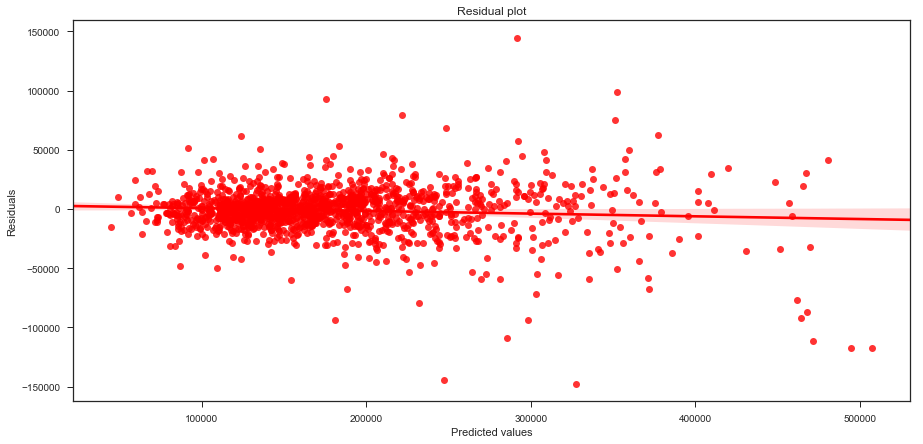

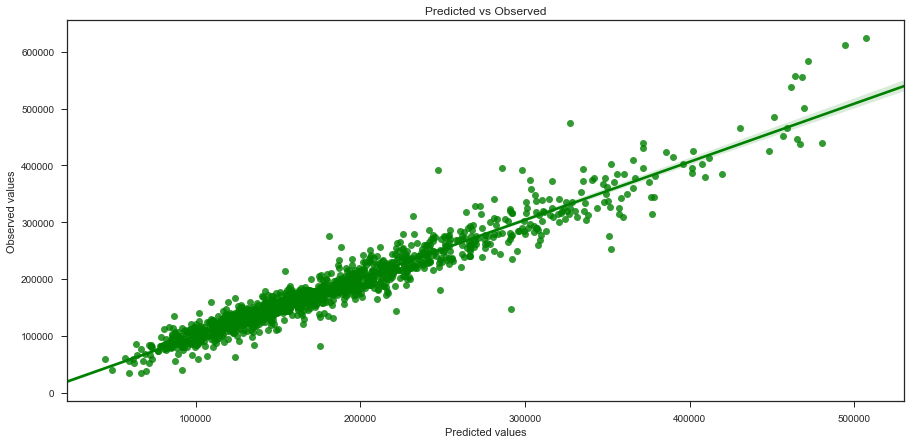

In [272]:
def plot_residuals_and_predictions(y, y_pred):
    # Plot residuals
    plt.figure(figsize=(15,7))
    sns.regplot(np.expm1(y_pred), np.expm1(y_pred) - np.expm1(y), color='red', fit_reg = True)
    
    plt.title("Residual plot")
    plt.xlabel("Predicted values")
    plt.ylabel("Residuals")
    plt.show()

    # Plot predictions
    plt.figure(figsize=(15,7))
    sns.regplot(np.expm1(y_pred), np.expm1(y), color='green', fit_reg = True)
    plt.title("Predicted vs Observed")
    plt.xlabel("Predicted values")
    plt.ylabel("Observed values")
    plt.show()

plot_residuals_and_predictions(y, y_pred)

<div class="alert alert-success">
<span class="label label-success">COMMENT</span><br><br>

We can say that the points in the residual plot are randomly dispersed around the horizontal axis $x=0$ which means that our linear regression model using regularization is appropriate for the data. On the other hand, by looking at the plot of the predicted value vs the observed one, the model is good, there is high correlation between the model predictions and its actual results.
</div>

<div class="alert alert-info">
<span class="label label-primary" style="font-size:15px;" id="submitting">Part 9: Submitting</span> <br><br>

We'll need to create a <i>csv</i> that contains the predicted <i>SalePrice</i> for each observation in the <i>test.csv</i> dataset.
</div>

In [273]:
# Construct a dataframe from the test data csv file
test_data = pd.read_csv(path_data + "test.csv")
test_data['SalePrice'] = test_data['Id'] * 0 # Add a sale price column to the test data

# Construct a dataframe for the submission
submission = pd.DataFrame()
submission['Id'] = test_data['Id'] # Save the ID for submission

# Construct a clean version of the test data ready to be used in our machine learning models
X_test, y_test = prepare_data(test_data)

<div class="alert alert-info">
Next, we generate our predictions.
</div>

In [274]:
predictions = ensembled(X_test)

<div class="alert alert-info">
Let's transform the predictions to the correct form by applying the function $x \mapsto \exp(x) - 1$ to our predictions as we have taken the function $x \mapsto \log(1+x)$ previously.
</div>

In [275]:
final_predictions = np.expm1(predictions)

<div class="alert alert-info">
Now we will assign these predictions and check that everything looks good.
</div>

In [276]:
submission['SalePrice'] = final_predictions
submission.head()

Id      SalePrice
0  1201   96246.513274
1  1202  176091.875575
2  1203  119138.345131
3  1204  200717.948441
4  1205  136568.374363

<div class="alert alert-info">
Now we are going to export our results as a <i>.csv</i> file:
</div>

In [277]:
# (index=False) so Pandas won't create a new index.
submission.to_csv('submission.csv', index=False)

<div class="alert alert-warning">
<span class="label label-warning" style="font-size:15px;" id="conclusion">Part 10: Conclusion</span> <br><br>

During this challenge, after analyzing, cleaning and pre-processing the data, we managed to go through the whole process of developing some machine learning models to predict the sale price of houses in Ames city. We learnt that it is important to put time and effort into preparing the dataset, generating new features and tuning the parameters of our models to get better scores.</div>